<a href="https://colab.research.google.com/github/pikey-msc/RiesgosFinancieros/blob/master/2025-1/Insumos/DeltaGamma_Integraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython
!rm -rf RiesgosFinancieros
!git clone "https://github.com/pikey-msc/RiesgosFinancieros/"

# !pip install rpy2==3.5.1

Cloning into 'RiesgosFinancieros'...
remote: Enumerating objects: 1170, done.
remote: Counting objects: 100% (402/402), done.
remote: Compressing objects: 100% (226/226), done.
remote: Total 1170 (delta 233), reused 278 (delta 158), pack-reused 768 (from 1)
Receiving objects: 100% (1170/1170), 64.18 MiB | 22.21 MiB/s, done.
Resolving deltas: 100% (738/738), done.
Updating files: 100% (448/448), done.


In [ ]:
%%R
#require(quantmod)
install.packages("quantmod")
library(quantmod)
#require(data.table)

install.packages("data.table")
library(data.table)
#require("PerformanceAnalytics")
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

install.packages("Deriv")
library(Deriv)


library(dplyr)
con = gzcon(url('https://github.com/systematicinvestor/SIT/raw/master/sit.gz', 'rb'))
source(con)
close(con)

(as ‘lib’ is unspecified)
























	‘/tmp/RtmpD9BCof/downloaded_packages’



Attaching package: ‘zoo’



    as.Date, as.Date.numeric



  method            from
  as.zoo.data.frame zoo 

(as ‘lib’ is unspecified)







	‘/tmp/RtmpD9BCof/downloaded_packages’


Attaching package: ‘data.table’



    first, last


(as ‘lib’ is unspecified)














	‘/tmp/RtmpD9BCof/downloaded_packages’

Attaching package: ‘PerformanceAnalytics’



    legend


(as ‘lib’ is unspecified)







	‘/tmp/RtmpD9BCof/downloaded_packages’

######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                          

In [ ]:
%%R
#FUNCIÓN DE INTERPOLACIÓN ALAMBRADA

talamb=function(nodos,curva,plazos) #función de interpolación de tasas por el método alamabrada
{
  n=max(ncol(plazos),1)
  m=max(ncol(nodos),1)
  TC=matrix(0,1,n)
  TL=matrix(0,1,n)
  TF=matrix(0,1,n)
  for (j in 1:n)
  {
    i=1
    repeat
    {
      if(nodos[i]<= plazos[j] && plazos[j] <=nodos[i+1])
      {
        TC[j]=curva[i]
        TL[j]=curva[i+1]
        TF[j]=((((1+TL[j]*nodos[i+1]/360)/(1+TC[j]*nodos[i]/360))^((plazos[j]-nodos[i])/(nodos[i+1]-nodos[i]))*(1+TC[j]*nodos[i]/360))-1)*360/plazos[j]
        break
      }
      else if (plazos[j]<nodos[1])
      {
        TC[j]=curva[1]
        TL[j]=curva[1]
        TF[j]=curva[1]
        break
      }
      else if (plazos[j]>nodos[m])
      {
        TC[j]=curva[m]
        TL[j]=curva[m]
        TF[j]=curva[m]
        break
      }
      else
      {i=i+1}
    }
  }
  as.matrix(t(as.numeric(rbind(TF))))
}


#funciones necesarias
diagv=function(x)			#función para diagonalizar un vector
{
  n01=nrow(as.matrix(x))
  m01=ncol(as.matrix(x))
  dimmax=max(n01,m01)
  res=matrix(0,dimmax,dimmax)
  for (i in 1:dimmax)
  {
    res[i,i]=x[i]
  }
  res
}

#interpolación
talamb=function(nodos,curva,plazos) #función de interpolación de tasas por el método alamabrada
{
  n=max(ncol(plazos),1)
  m=max(ncol(nodos),1)
  TC=matrix(0,1,n)
  TL=matrix(0,1,n)
  TF=matrix(0,1,n)
  for (j in 1:n)
  {
    i=1
    repeat
    {
      if(nodos[i]<= plazos[j] && plazos[j] <=nodos[i+1])
      {
        TC[j]=curva[i]
        TL[j]=curva[i+1]
        TF[j]=((((1+TL[j]*nodos[i+1]/360)/(1+TC[j]*nodos[i]/360))^((plazos[j]-nodos[i])/(nodos[i+1]-nodos[i]))*(1+TC[j]*nodos[i]/360))-1)*360/plazos[j]
        break
      }
      else if (plazos[j]<nodos[1])
      {
        TC[j]=curva[1]
        TL[j]=curva[1]
        TF[j]=curva[1]
        break
      }
      else if (plazos[j]>nodos[m])
      {
        TC[j]=curva[m]
        TL[j]=curva[m]
        TF[j]=curva[m]
        break
      }
      else
      {i=i+1}
    }
  }
  as.matrix(t(as.numeric(rbind(TF))))
}


In [7]:
def approx(x, y, new_x, rule=2):
    return np.interp(new_x, x, y)

#1 Definición de parámetros para valorar:
Acciones
Bonos
Bonos M
Bondes D
SWAPS
Futuros
Opciones

## Codigo R

Cargamos parámetros para valoración:

In [5]:
%%R
fval=as.Date("20200228",format="%Y%m%d") #Fecha de valoración
itpl=0 #poner 0 si se quiere interpolación lineal o 1 si se quiere tasa alambrada
alpha=0.98 #Nivel de confianza para obtener estimaciones de riesgo
#setwd(direc)

#ACCIONES Y DIVISAS
#Cargar los símbolos de yahoo finance para EQ
Symbols<-c  ("CEMEXCPO.MX", "GCARSOA1.MX", "WALMEX.MX" )#tienen que ir en orden alfabético
pos_eq=c(1000,2000,-600) #monto inicial invertido en acciones
#Cargar los símbolos de yahoo finance para FX
SymbolsFX<-c("EURUSD=X","GBPUSD=X","USDMXN=X" ) #tienen que ir en orden alfabético
pos_fx=c(1000,-500,200) #monto inicial invertido en divisas
nh=3660 #días de historia

#CETES
base="RiesgosFinancieros/2020-2/Insumos/tasa_guber.txt"
plazos_bcc=cbind( 5,	18,	72,	115,	153,	245,	850,	1500,	3000,	6400,	7500,	9958)
contratos_bcc=cbind(22000, -29000, 10000, -46000, 44000, -26000,-30000,7000,-18000,-31000,23000,-23000)
nominal_bcc=10 #CETE

#BONOS M
btasadesc_bm="RiesgosFinancieros/2020-2/Insumos/tasa_yield.txt"
tfcupon_bm=cbind( 0.065,	0.0675,	0.07,	0.075,	0.078) #Tasafija del cupón
plazos_bm=cbind( 378,	405,	550,	1200,	1800) #Vencimiento del bono
plazocupon_bm=cbind( 182,	182, 182, 182, 182) #plazos_bm fijos de cada cupón
contratos_bm=cbind(22000, -29000, 29000, -46000, 10000) #posición invertida
nominal_bm=100

#BONDES D
btasadescst="RiesgosFinancieros/2020-2/Insumos/tasa_guber_st.txt"
btasafondeo="RiesgosFinancieros/2020-2/Insumos/tfondeo.txt"
plazos_bdm=cbind( 358,	405,	550,	1200,	1800) #Vencimiento del bono
plazocupon_bdm=cbind( 28,	28, 28, 28, 28) #plazos_bdm fijos de cada cupón
contratos_bdm=cbind(220, -290, 290, -460, 100) #posición invertida
nominal_bdm=100

#FORWARDS TDC
bext="RiesgosFinancieros/2020-2/Insumos/tasa_libor.txt"
bdom="RiesgosFinancieros/2020-2/Insumos/tasa_fwd.txt"
SymbolsFX_ftdc<-c("USDMXN=X", "GBPUSD=X" ) #tienen que ir en orden alfabético
plazos_fwd=cbind( 360	, 650	)
contratos_fwd=cbind(500, -200 )
kst_fwd=cbind(20.5, 20.3 )
nominal_fwd=1
yext=1 #si se carga información de yahoo en la fecha definida por fval o SymbolsFX, en caso contrario se utiliza información que se tendrá que cargar de tasas_spot.txt
trlib=1 #1 si la curva libor viene a 182 0 si no.

#FORWARDS DE IPC
#Descontamos con gubernamental
SymbolsEQ_find<-c("^MXX", "GCARSOA1.MX" ) #tienen que ir en orden alfabético
plazos_fwd_ind=cbind( 360, 490)
contratos_fwd_ind=cbind(1, 1)
kst_fwd_ind=cbind(52000, 48500)
nominal_fwd_ind=1


#SWAP
btasadesc_sw="RiesgosFinancieros/2020-2/Insumos/tasa_TIIE_SW_OP.txt"
btasacupvar_sw="RiesgosFinancieros/2020-2/Insumos/tasa_DIRS_SW_OP.txt"
tasafija_sw=cbind(0.079,0.075) #se establece la tasa fija a pagar para cada swap
plazos_sw=cbind(588,360) #se establece el número de días que vivirá el swap
plazocupon_sw=cbind(28,28) #se establece el número de días que se pagará cada cupón
contratos_sw=cbind(-1600,1000) #se establece el número de contratos_sw de cada swap
nominal_sw=cbind(1,1) #se establece el nominal_sw de cada swap
por_sw=cbind(0,0) #se establece 0 si se paga tasa fija y 1 si se paga tasa variable


#OPCIONES
btasadesc_oir="RiesgosFinancieros/2020-2/Insumos/tasa_TIIE_SW_OP.txt"
btasaspot_oir="RiesgosFinancieros/2020-2/Insumos/tasa_DIRS_SW_OP.txt"
bvolspot_oir="RiesgosFinancieros/2020-2/Insumos/tvoltiie_opc.txt"
plazos_oir=cbind( 39,	115,	153,	245,	360) #T-t
pr_oir=28 #plazo de referencia
dct_oir=360 #d_base
cp_oir=cbind(1,0,0,0,0) #si es call (cap) o put (floor)
K_oir=cbind( 0.07, 0.085, 0.078, 0.085, 0.08)
contratos_oir=cbind(2200, -2900, 2900, -460, 5000)
nominal_oir=1
cs_oir=1 #1 si es continua la tasa 0 si es simple



UsageError: Cell magic `%%R` not found.


## Código Python

In [2]:
!pip install yfinance
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta

fval = datetime.strptime("20200228", "%Y%m%d") #Fecha de valoración
itpl = 0 #poner 0 si se quiere interpolación lineal o 1 si se quiere tasa alambrada
alpha = 0.98 #Nivel de confianza para obtener estimaciones de riesgo
#setwd(direc)

#Cargar los símbolos de yahoo finance para EQ
Symbols = ["CEMEXCPO.MX", "GCARSOA1.MX", "WALMEX.MX"] #tienen que ir en orden alfabético
pos_eq = [1000,2000,-600] #monto inicial invertido en acciones
#Cargar los símbolos de yahoo finance para FX
SymbolsFX = ["EURUSD=X","GBPUSD=X","USDMXN=X"] #tienen que ir en orden alfabético
pos_fx = [1000,-500,200] #monto inicial invertido en divisas
nh = 3660 #días de historia

#CETES
base="RiesgosFinancieros/2020-2/Insumos/tasa_guber.txt"
plazos_bcc=np.array([ 5,	18,	72,	115,	153,	245,	850,	1500,	3000,	6400,	7500,	9958])
contratos_bcc=np.array([22000, -29000, 10000, -46000, 44000, -26000,-30000,7000,-18000,-31000,23000,-23000])
nominal_bcc=10 #CETE

#BONOS M
btasadesc_bm="RiesgosFinancieros/2020-2/Insumos/tasa_yield.txt"
tfcupon_bm=np.array([ 0.065,	0.0675,	0.07,	0.075,	0.078]) #Tasafija del cupón
plazos_bm=np.array([ 378,	405,	550,	1200,	1800]) #Vencimiento del bono
plazocupon_bm=np.array([ 182,	182, 182, 182, 182]) #plazos_bm fijos de cada cupón
contratos_bm=np.array([22000, -29000, 29000, -46000, 10000]) #posición invertida
nominal_bm=100


# BONDES D
btasadescst="RiesgosFinancieros/2020-2/Insumos/tasa_guber_st.txt"
btasafondeo="RiesgosFinancieros/2020-2/Insumos/tfondeo.txt"
plazos_bdm=np.array([358, 405, 550, 1200, 1800])
plazocupon_bdm=np.array([28, 28, 28, 28, 28])
contratos_bdm=np.array([220, -290, 290, -460, 100])
nominal_bdm=100

# FORWARDS TDC
bext="RiesgosFinancieros/2020-2/Insumos/tasa_libor.txt"
bdom="RiesgosFinancieros/2020-2/Insumos/tasa_fwd.txt"
SymbolsFX_ftdc=['USDMXN=X']
plazos_fwd=np.array([360	, 650])
contratos_fwd=np.array([500, -200])
kst_fwd=[20.5, 20.3]
nominal_fwd=1
yext=1 #si se carga información de yahoo en la fecha definida por fval o SymbolsFX, en caso contrario se utiliza información que se tendrá que cargar de tasas_spot.txt
trlib=1 #1 si la curva libor viene a 182 0 si no.

# ORWARDS DE IPC
#Descontamos con gubernamental
base="RiesgosFinancieros/2020-2/Insumos/tasa_guber.txt"
SymbolsEQ_find=["^MXX"] #tienen que ir en orden alfabético
plazos_fwd_ind=np.array([360, 490])
contratos_fwd_ind=np.array([1, 1])
kst_fwd_ind=np.array([52000, 48500])
nominal_fwd_ind=1

#SWAP

btasadesc_sw="RiesgosFinancieros/2020-2/Insumos/tasa_TIIE_SW_OP.txt"
btasacupvar_sw="RiesgosFinancieros/2020-2/Insumos/tasa_DIRS_SW_OP.txt"
tasafija_sw=np.array([0.079,0.075]) #se establece la tasa fija a pagar para cada swap
plazos_sw=np.array([588,360]) #se establece el número de días que vivirá el swap
plazocupon_sw=np.array([28,28]) #se establece el número de días que se pagará cada cupón
contratos_sw=np.array([-1600,1000]) #se establece el número de contratos_sw de cada swap
nominal_sw=np.array([1,1]) #se establece el nominal_sw de cada swap
por_sw=np.array([0,0]) #se establece el porcentaje de cada swap




#OPCIONES
btasadesc_oir = "RiesgosFinancieros/2020-2/Insumos/tasa_TIIE_SW_OP.txt"
btasaspot_oir = "RiesgosFinancieros/2020-2/Insumos/tasa_DIRS_SW_OP.txt"
bvolspot_oir = "RiesgosFinancieros/2020-2/Insumos/tvoltiie_opc.txt"
plazos_oir = np.array([39, 115, 153, 245, 360])  # T-t
pr_oir = 28  # plazo de referencia
dct_oir = 360  # d_base
cp_oir = np.array([1, 0, 0, 0, 0])  # si es call (cap) o put (floor)
K_oir = np.array([0.07, 0.085, 0.078, 0.085, 0.08])
contratos_oir = np.array([2200, -2900, 2900, -460, 5000])
nominal_oir = 1
cs_oir = 1  # 1 si es continua la tasa 0 si es simple


#2 Carga de datos

## Código R

In [ ]:
%%R
#CARGA DE DATOS DE ACCIONES
pos=cbind(t(pos_fx),t(pos_eq))
start_date=Sys.Date()-nh #fecha inicial
#Creación del objeto para guardar los datos
dataEnv<-new.env()
dataEnvFX<-new.env()
#obtener los datos
getSymbols.yahoo(Symbols,env=dataEnv,from=start_date)
getSymbols.yahoo(SymbolsFX,env=dataEnvFX,from=start_date)
#muestra
#tail(dataEnvFX$`GBPUSD=X`)
#limpiarlos, alinearnos y quedarnos con el precio de cierre
bt.prep(dataEnv,align='remove.na',fill.gaps = T)
bt.prep(dataEnvFX,align='remove.na',fill.gaps=T)
#muestra de datos
#head(dataEnv$prices)
#head(dataEnvFX$prices)
#Nos quedamos con los precios
stock_prices = dataEnv$prices
#tail(stock_prices[,])
stock_pricesFX=dataEnvFX$prices
#tail(stock_pricesFX)
#cambiar todo a pesos mexicanos
stock_pricesFX=cbind(stock_pricesFX[,1,with=F]*stock_pricesFX[,3,with=F],stock_pricesFX[,2,with=F]*stock_pricesFX[,3,with=F],stock_pricesFX[,3,with=F])
#tail(stock_pricesFX)
stock_prices_EQFX=merge(stock_pricesFX,stock_prices,join = "inner")
#stock_prices_EQFX
#tail(stock_prices_EQFX)
#Preciso actuales
#x0=as.data.table(as.matrix(stock_prices_EQFX[nrow(stock_prices_EQFX),])) #valores actuales
x0=stock_prices_EQFX[nrow(stock_prices_EQFX),]
#x0

aux2=data.table(Date=as.Date(index(stock_prices_EQFX)),coredata(stock_prices_EQFX))



#LEER DATOS DE CETES #CARGA DE DATOS DE BONO CUPÓN CERO
data<-read.table(base)
n<-nrow(data)
m_gov=ncol(data)
#x_orig_gov=data.frame(data[2:n,1:m_gov])
x_orig_gov=as.data.table(mutate(data[2:n,1:m_gov],Date=as.Date(V1,format="%Y%m%d")))
x_orig_gov=x_orig_gov%>%select(-V1)
nodos_gov=data.frame(data[1,2:m_gov])

#LEER DATOS DE BONOS M
#carga de datos
#carga de tasas de descuento
data1<-read.table(btasadesc_bm)
n<-nrow(data1)
m_tybm=ncol(data1)
X_orig_tybm=as.data.table(mutate(data1[2:n,1:m_tybm],Date=as.Date(V1,format="%Y%m%d")))
X_orig_tybm=X_orig_tybm%>%select(-V1)
nodos_tybm=data.frame(data1[1,2:m_tybm])


##CARGA DE DATOS DE BONDE D
#carga de datos
#carga de tasas de descuento
data1<-read.table(base)
n<-nrow(data1)
m_bd=ncol(data1)
##X_orig_bd=as.data.table(mutate(data1[2:n,1:m_tybm],Date=as.Date(V1,format="%Y%m%d")))
#X_orig_bd%>%select(-V1)

X1_orig=mutate(data.frame(data1[2:n,1:m_bd]), V1=as.Date(V1,format="%Y%m%d"))
#nodos=data.frame(data1[1,2:m_bd])
n=n-1

data3<-read.table(btasadescst)
n3<-nrow(data3)
m3_bd=ncol(data3)
X3_orig_bd=as.data.table(mutate(data3[2:n,1:m3_bd],Date=as.Date(V1,format="%Y%m%d")))
X3_orig_bd=X3_orig_bd%>%select(-V1)

X3a_orig=mutate(data.frame(data1[2:n,1:m_bd]), V1=as.Date(V1,format="%Y%m%d"))
nodos3_bd=data.frame(data3[1,2:m3_bd])
n3=n3-1

data2<-read.table(btasafondeo)
n2<-nrow(data2)
X2_orig_bd=data.frame(data2[2:n2,1:2])
X2_orig_bd=mutate(X2_orig_bd, V1=as.Date(V1,format="%Y%m%d"), Date=as.Date(V1,format="%Y%m%d"), V2=as.numeric(as.character(V2)))
tfh=seq(min(X2_orig_bd$V1), max(X2_orig_bd$V1), "days") #sucesión de dias para tasa fondeo
tfhd=data.frame(ID=1:count(tfh),fecha=tfh)

#Cruzar la sucesión de todos los días versus el de tasa de fondeo
tfhd=setDT(tfhd)[, Date := tfh][order(-Date)]
X2_orig_bd=setDT(X2_orig_bd)[, Date := V1][order(-Date)]
# rolling join unión por rolling, rellena las fechas que faltaban con el último valor conocido "roll=Inf"
X2_orig_bd=X2_orig_bd[tfhd, on = .(Date), roll = Inf]
#buscar fecha de valuación en tfondeo
tf_act=X2_orig_bd[fecha==fval,]$V2/100
tf_int=X2_orig_bd[fecha<=fval & fecha>=(fval-plazocupon_bdm[1])]$V2/100

X1_orig=setDT(X1_orig)[, Date:= V1][order(-Date)] #Para alinear con valor presente y tasa de fondeo.


#CARGA DE DATOS DE  FORWARDS DE TDC
#datas
#data<-read.table("tasa_tiie.txt")
data1<-read.table(bext)
data2<-read.table(bdom)

########minimos para parametrizar
n1=nrow(data1)
n2=nrow(data2)
m1_ftdc=ncol(data1)
m2_ftdc=ncol(data2)
n=min(n1,n2)-1
###NODOS###
nodos1_ftdc=data.frame(data1[1,2:m1_ftdc])
nodos2_ftdc=data.frame(data2[1,2:m2_ftdc])
####MATRICES DEL MISMO TAMAÑO MENOS DOLAR

x1_ftdc=as.data.table(mutate(data1[2:n,1:m1_ftdc],Date=as.Date(V1,format="%Y%m%d")))
x1_ftdc=x1_ftdc%>%select(-V1)
x2_ftdc=as.data.table(mutate(data2[2:n,1:m2_ftdc],Date=as.Date(V1,format="%Y%m%d")))
x2_ftdc=x2_ftdc%>%select(-V1)

###Para Dolar

if (yext==1)
{
  #Cargar los símbolos de yahoo finance para FX
  start_date=fval-nh #fecha inicial

  #Creación del objeto para guardar los datos
  dataEnvFX<-new.env()

  #obtener los datos
  getSymbols.yahoo(SymbolsFX_ftdc,env=dataEnvFX,from=start_date, to=(fval+3))
  #limpiarlos, alinearnos y quedarnos con el precio de cierre
  bt.prep(dataEnvFX,align='remove.na',fill.gaps=T)

  #muestra de datos
  head(dataEnvFX$prices[,2])

  #Nos quedamos con los precios
  X3_ftdc=data.table(Date=as.Date(index(dataEnvFX$prices[,2])),coredata(dataEnvFX$prices[,2]))
  X3_ftdc=X3_ftdc[X3_ftdc$Date<=fval]
} else
{
data3<-read.table(btsp)
print(head(data3))
n3<-nrow(data3)
m3<-ncol(data3)
X3=data.table(as.matrix(as.double(as.matrix(data3[2:(n+1),m3]))))
X3_find=as.data.table(mutate(data3[2:(n+1),1:m3],Date=as.Date(V1,format="%Y%m%d")))
}


# CARGA DE DATOS DE  FORWARD DE IPC

data<-read.table(base)
n<-nrow(data)
m_gov=ncol(data)
#x_orig_gov=data.frame(data[2:n,1:m_gov])
x_orig_gov=as.data.table(mutate(data[2:n,1:m_gov],Date=as.Date(V1,format="%Y%m%d")))
x_orig_gov=x_orig_gov%>%select(-V1)
nodos_gov=data.frame(data[1,2:m_gov])

  #Cargar los símbolos de yahoo finance para EQ
  start_date=fval-nh #fecha inicial

  #Creación del objeto para guardar los datos
  dataEnvEQ<-new.env()

  #obtener los datos
  getSymbols.yahoo(SymbolsEQ_find,env=dataEnvEQ,from=start_date, to=(fval+5))
  #limpiarlos, alinearnos y quedarnos con el precio de cierre
  bt.prep(dataEnvEQ,align='remove.na',fill.gaps=T)

  #muestra de datos
#  head(dataEnvEQ$prices)

  #Nos quedamos con los precios
  X3_find=data.table(Date=as.Date(index(dataEnvEQ$prices[,2])),coredata(dataEnvEQ$prices[,2]))
  X3_find=X3_find[X3_find$Date<=fval]


  #CARGA DE DATOS PARA SWAP
  data1<-read.table(btasadesc_sw)
  n1<-nrow(data1)
  m1_orig_sw=ncol(data1)
  X1_orig_sw=data.table(mutate(data1[2:n1,1:m1_orig_sw],Date=as.Date(V1,format="%Y%m%d")))
  X1_orig_sw=X1_orig_sw%>%select(-V1)
  nodos1_sw=data.frame(data1[1,2:m1_orig_sw])

  data2<-read.table(btasacupvar_sw)
  n2<-nrow(data2)
  m2_orig_sw=ncol(data2)
  X2_orig_sw=data.table(mutate(data2[2:n1,1:m1_orig_sw],Date=as.Date(V1,format="%Y%m%d")))
  X2_orig_sw=X2_orig_sw%>%select(-V1)
  nodos2_sw=data.frame(data2[1,2:m2_orig_sw])


  #CARGA DE DATOS PARA OPCIONES DE TASA DE INTERÉS
  #carga de datos
  #carga de rho
  data1<-read.table(btasadesc_oir)
  n<-nrow(data1)
  m1_orig_oir=ncol(data1)
  x1_orig_oir=data.table(mutate(data1[2:n,1:m1_orig_oir],Date=as.Date(V1,format="%Y%m%d")))
  x1_orig_oir=x1_orig_oir%>%select(-V1)
  nodos1_oir=data.frame(data1[1,2:m1_orig_oir])

  #data1[1:3,]
  #carga de tasas spot
  data2<-read.table(btasaspot_oir)
  n<-nrow(data2)
  m2_orig_oir=ncol(data2)
  x2_orig_oir=data.table(mutate(data2[2:n,1:m2_orig_oir],Date=as.Date(V1,format="%Y%m%d")))
  x2_orig_oir=x2_orig_oir%>%select(-V1)
  nodos2_oir=data.frame(data2[1,2:m2_orig_oir])
  #carga de volatilidades de spot
  data3<-read.table(bvolspot_oir)
  n<-nrow(data3)
  m3_orig_oir=ncol(data3)
  x3_orig_oir=data.table(mutate(data3[2:n,1:m3_orig_oir],Date=as.Date(V1,format="%Y%m%d")))
  x3_orig_oir=x3_orig_oir%>%select(-V1)

  nodos3_oir=data.frame(data3[1,2:m3_orig_oir])



## Código Python

In [3]:
import pandas as pd
#acciones
pos=[len(pos_fx),len(pos_eq)]
start_date = datetime.now().date() - timedelta(days=nh)
# Symbols = ["AMXB.MX", "GCARSOA1.MX", "WALMEX.MX"] #tienen que ir en orden alfabético
# pos_eq = [-5000,1000,1200] #monto inicial invertido en acciones
#Cargar los símbolos de yahoo finance para FX
SymbolsFX = ["EURUSD=X","GBPUSD=X","USDMXN=X"] #tienen que ir en orden alfabético
symbol=Symbols+SymbolsFX
# symbol = ['AAPL','MSFT','SQ','AMZN','USDMXN=X']
stock_prices = yf.download(symbol,start_date)
stock_prices_EQFX=stock_prices.Close.dropna()
stock_prices_EQFX['EURUSD=X']=stock_prices_EQFX['EURUSD=X']*stock_prices_EQFX['USDMXN=X']
stock_prices_EQFX['GBPUSD=X']=stock_prices_EQFX['GBPUSD=X']*stock_prices_EQFX['USDMXN=X']
stock_prices_EQFX=stock_prices_EQFX[symbol]
stock_prices_EQFX=stock_prices_EQFX.reset_index()
stock_prices_EQFX['Date'] = stock_prices_EQFX['Date'].dt.tz_localize(None).astype('datetime64[ns]')
x0=stock_prices_EQFX.tail(1)
# aux2=pd.DataFrame(stock_prices_EQFX.index)

#LEER DATOS DE CETES #CARGA DE DATOS DE BONO CUPÓN CERO
data = pd.read_csv(base, sep="\t", header=None)

# Obtiene el número de filas y columnas de data1
n, m_gov= data.shape

# Crear un DataFrame con los datos sin la primera fila y la primera columna
x_orig = pd.DataFrame(data.values[1:, 1:len(data.values[0])], dtype=float)
x_orig['Date'] = pd.to_datetime(data.values[1:,0], format='%Y%m%d')

# Obtener nodos
nodos_gov = pd.DataFrame(data.values[0, 1:(len(data.values[0]))], dtype=int)

#LEER DATOS DE BONOS M
#carga de datos
#carga de tasas de descuento
data1 = pd.read_csv(btasadesc_bm, sep="\t", header=None)
n, m_tybm=data1.shape

X_orig_tybm=pd.DataFrame(data1.values[1:, 1:len(data1.values[0])], dtype=float)
X_orig_tybm['Date'] = pd.to_datetime(data1.values[1:,0], format='%Y%m%d')
nodos_tybm=pd.DataFrame(data1.values[0, 1:(len(data1.values[0]))], dtype=int)


# data<-read.table(base)
# n<-nrow(data)
# m_gov=ncol(data)
# #x_orig_gov=data.frame(data[2:n,1:m_gov])
# x_orig_gov=as.data.table(mutate(data[2:n,1:m_gov],Date=as.Date(V1,format="%Y%m%d")))
# x_orig_gov=x_orig_gov%>%select(-V1)
# nodos_gov=data.frame(data[1,2:m_gov])

#BONDE D
# Leer datos de tasa_guber.txt
data1 = pd.read_table(base, sep="\t", header=None)
n = data1.shape[0]
m_bd = data1.shape[1]
X_orig = data1.iloc[1:n, 0:m_bd]
X1_orig = pd.DataFrame(data1.iloc[1:n, 1:m_bd], dtype=float)
X1_orig['Date'] = pd.to_datetime(X_orig[0], format='%Y%m%d')
nodos = data1.iloc[0, 1:m_bd]
n -= 1

# Leer datos de tasa_guber_st.txt
data3 = pd.read_table(btasadescst, sep="\t", header=None)
n3 = data3.shape[0]
m3_bd = data3.shape[1]
X3a_orig_bd = data3.iloc[1:n3, 0:m3_bd]
X3_orig_bd = pd.DataFrame(data3.iloc[1:n3, 1:m3_bd], dtype=float)
X3_orig_bd['Date'] = pd.to_datetime(X3a_orig_bd[0], format='%Y%m%d')
nodos3_bd = data3.iloc[0, 1:m3_bd]
n3 -= 1

# # Leer datos de tfondeo.txt
data2 = pd.read_table(btasafondeo, sep="\t", header=None)
n2 = data2.shape[0]
X2_orig = data2.iloc[1:n2, 0:2]
X2_orig_bd = X2_orig.copy()
X2_orig_bd[0] = pd.to_datetime(X2_orig_bd[0], format='%Y%m%d')
X2_orig_bd[1] = X2_orig_bd[1].astype(float)

# # Sucesión de días para tasa fondeo
tfh = pd.date_range(start=min(X2_orig_bd[0]), end=max(X2_orig_bd[0]), freq='D')
tfhd = pd.DataFrame({'fecha': tfh})


# Asegúrate de que ambos DataFrames estén ordenados por la columna de fecha de manera descendente
tfhd = tfhd.sort_values(by='fecha', ascending=True)
X2_orig_bd = X2_orig_bd.sort_values(by=0, ascending=True)  # Asumiendo que la columna 'V1' es ahora la columna 0

# Renombrar columnas para preparar para merge_asof
# tfhd = tfhd.rename(columns={'fecha': 'join_date'})
X2_orig_bd = X2_orig_bd.rename(columns={0: 'fecha'})

# Realizar el rolling join con merge_asof
X2_orig_bd = pd.merge_asof(tfhd, X2_orig_bd, on='fecha', direction='backward')


# Si quieres que el resultado esté en el DataFrame original (tfhd), puedes hacer lo siguiente:
X2_orig_bd = pd.merge(tfhd, X2_orig_bd, on='fecha', how='outer')

X1_orig = X1_orig.rename(columns={0: "fecha"})
# Filtrar tasas de fondeo

tf_act = X2_orig_bd.loc[X2_orig_bd['fecha'] == fval, 1].values[0] / 100
tf_int = X2_orig_bd.loc[(X2_orig_bd['fecha'] <= fval) & (X2_orig_bd['fecha'] >= (fval -  timedelta(int(plazocupon_bdm[0])))), 1] / 100
tf_int=tf_int[::-1]  # se hace este cambio para ordenar de mayor a menor


# Ordenar el DataFrame por la columna de unión
X1_orig = X1_orig.sort_values('Date', ascending=True)

# Agregar la columna join_date al DataFrame X1_orig
X1_orig['join_date'] = X1_orig['Date']

# Ordenar el DataFrame X2a_orig por la columna de unión
X2_orig_bd = X2_orig_bd.sort_values('fecha', ascending=True)

# Hacer el merge (join) de los DataFrames
X2_pr = pd.merge_asof(X1_orig, X2_orig_bd, left_on='Date', right_on='fecha')



#CARGA DE DATOS DE  FORWARDS DE TDC
#datas
#data<-read.table("tasa_tiie.txt")
data1 = pd.read_table(bext,header=None)
data2 = pd.read_table(bdom,header=None)

########minimos para parametrizar
n1 = data1.shape[0]
n2 = data2.shape[0]
m1_ftdc = data1.shape[1]
m2_ftdc = data2.shape[1]
n = min(n1, n2) - 1
###NODOS###
nodos1_ftdc = data1.iloc[0,1:m1_ftdc]
nodos2_ftdc = data2.iloc[0,1:m2_ftdc]
####MATRICES DEL MISMO TAMAÑO MENOS DOLAR

x1_ftdc = pd.DataFrame(data1.iloc[1:n1,1:m1_ftdc], dtype=float)
x1_ftdc['Date'] = pd.to_datetime(data1.iloc[1:n1,0], format="%Y%m%d")
x2_ftdc = data2.iloc[1:n1,1:m2_ftdc]
x2_ftdc['Date'] = pd.to_datetime(data2.iloc[1:n1, 0], format="%Y%m%d")

if yext==1:
  start_date=fval- timedelta(days=nh)
  # start_date = datetime.now().date() - timedelta(days=nh)
  X3_ftdc = yf.download(SymbolsFX_ftdc,start_date,fval+timedelta(days=1))
  X3_ftdc=X3_ftdc.Close.dropna()
  X3_ftdc=X3_ftdc.reset_index()
  X3_ftdc['Date'] =X3_ftdc['Date'].dt.tz_localize(None).astype('datetime64[ns]')
else:
  data3=pd.read_table(bext,header=None)
  n3 = data3.shape[0]
  m3 = data3.shape[1]
  x3_ftdc = pd.DataFrame(data3.iloc[1:n3,1:m3], dtype=float)
  x3_ftdc['Date'] = pd.to_datetime(data3.iloc[1:n3, 0], format="%Y%m%d")



# CARGA DE DATOS DE  FORWARD DE IPC
data = pd.read_table(base,header=None)
n = data.shape[0]
m_gov=data.shape[1]
#x_orig_gov=data.frame(data[2:n,1:m_gov])
x_orig_gov= pd.DataFrame(data.iloc[1:n,1:m_gov], dtype=float)
x_orig_gov['Date'] = pd.to_datetime(data.iloc[1:n,0], format="%Y%m%d")
nodos_gov=data.iloc[0,1:m_gov]

X3_find = yf.download(SymbolsEQ_find,start_date)
X3_find = X3_find.Close.dropna()
X3_find=X3_find.reset_index()
X3_find['Date'] =X3_find['Date'].dt.tz_localize(None).astype('datetime64[ns]')



  #CARGA DE DATOS PARA SWAP
data1 = pd.read_table(btasadesc_sw,header=None)
n1 = data1.shape[0]
m1_orig_sw = data1.shape[1]
X1_orig_sw = pd.DataFrame(data1.iloc[1:n1, 1:m1_orig_sw], dtype=float)
X1_orig_sw['Date'] = pd.to_datetime(data1.iloc[1:n1, 0], format = '%Y%m%d')
nodos1_sw = data1.iloc[0, 1:m1_orig_sw]

data2 = pd.read_table(btasacupvar_sw,header=None)
n2 = data2.shape[0]
m2_orig_sw = data2.shape[1]
X2_orig_sw = pd.DataFrame(data2.iloc[1:n2, 1:m2_orig_sw], dtype=float)
X2_orig_sw['Date'] = pd.to_datetime(data2.iloc[1:n1, 0], format = '%Y%m%d')
nodos2_sw = data2.iloc[0, 1:m2_orig_sw]


#carga de opciones de tasa de interés
data1 = pd.read_table(btasadesc_oir,header=None)
n =data1.shape[0]
m1_orig_oir = len(data1.columns)
x1_orig_oir = pd.DataFrame(data1.iloc[1:n, 1:m1_orig_oir], dtype=float)
x1_orig_oir['Date'] = pd.to_datetime(data1.iloc[1:n, 0], format = '%Y%m%d')
nodos1_oir =  data1.iloc[0, 1:m1_orig_oir]

# carga de tasas spot
data2 = pd.read_table(btasaspot_oir,header=None)
n = len(data2)
m2_orig_oir = len(data2.columns)
x2_orig_oir = pd.DataFrame(data2.iloc[1:n, 1:m2_orig_oir], dtype=float)
x2_orig_oir['Date'] = pd.to_datetime(data2.iloc[1:n, 0], format="%Y%m%d")
nodos2_oir = data2.iloc[0, 1:m2_orig_oir]

# carga de volatilidades de spot
data3 = pd.read_table(bvolspot_oir,header=None)
n = len(data3)
m3_orig_oir = len(data3.columns)
x3_orig_oir = pd.DataFrame(data3.iloc[1:n, 1:m3_orig_oir], dtype=float)
x3_orig_oir['Date'] = pd.to_datetime(data3.iloc[1:n, 0], format="%Y%m%d")
nodos3_oir = data3.iloc[0, 1:m3_orig_oir]

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#3 Integración de Insumos

Aseguramiento de que todos los factores de riesgo estén alineados en sus fechas, nos quedamos con la intersección. Posteriormente, filtramos cada histórico factor de riesgo hacia esta intersección de todos.

## Código R

In [ ]:
%%R
#INTERSECCIÓN DE FECHAS DE TODOS LOS INSUMOS

lin_gub=data.table(Date=as.Date(aux2[x_orig_gov,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity y guber
lin_gub=unique(lin_gub)
# print(lin_gub)
lin_gub_bmy=data.table(Date=as.Date(lin_gub[X_orig_tybm,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity y guber, con bonos M
lin_gub_bmy=unique(lin_gub_bmy)
# print(lin_gub_bmy)
lin_gub_bmybdst=data.table(Date=as.Date(lin_gub_bmy[X3_orig_bd,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber y st (bonde)
lin_gub_bmybdst=unique(lin_gub_bmybdst)
lin_gub_bmybdst_flib=data.table(Date=as.Date(lin_gub_bmybdst[x1_ftdc,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor
lin_gub_bmybdst_flib=unique(lin_gub_bmybdst_flib)
lin_gub_bmybdst_flibfwd=data.table(Date=as.Date(lin_gub_bmybdst_flib[x2_ftdc,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor, fwd
lin_gub_bmybdst_flibfwd=unique(lin_gub_bmybdst_flibfwd)
lin_gub_bmybdst_flibfwdsp=data.table(Date=as.Date(lin_gub_bmybdst_flibfwd[X3_ftdc,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor, fwd, spot
lin_gub_bmybdst_flibfwdsp=unique(lin_gub_bmybdst_flibfwdsp)
# print(lin_gub_bmybdst_flibfwdsp)
lin_gub_bmybdst_flibfwdspind=data.table(Date=as.Date(lin_gub_bmybdst_flibfwdsp[X3_find,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor, fwd, spot, equity or index
lin_gub_bmybdst_flibfwdspind=unique(lin_gub_bmybdst_flibfwdspind)
print(lin_gub_bmybdst_flibfwdspind)
lin_gub_bmybdst_flibfwdspind_swcup=data.table(Date=as.Date(lin_gub_bmybdst_flibfwdspind[X1_orig_sw,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor, fwd, spot, equity or index, swap cupón
lin_gub_bmybdst_flibfwdspind_swcup=unique(lin_gub_bmybdst_flibfwdspind_swcup)
lin_gub_bmybdst_flibfwdspind_swcupvp=data.table(Date=as.Date(lin_gub_bmybdst_flibfwdspind_swcup[X2_orig_sw,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor, fwd, spot, equity or index, swap cupón
lin_gub_bmybdst_flibfwdspind_swcupvp=unique(lin_gub_bmybdst_flibfwdspind_swcupvp)
lin_gub_bmybdst_flibfwdspind_swcupvp_oirs=data.table(Date=as.Date(lin_gub_bmybdst_flibfwdspind_swcupvp[x1_orig_oir,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor, fwd, spot, equity or index, swap cupón, opciones ir spot
lin_gub_bmybdst_flibfwdspind_swcupvp_oirs=unique(lin_gub_bmybdst_flibfwdspind_swcupvp_oirs)
lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvp=data.table(Date=as.Date(lin_gub_bmybdst_flibfwdspind_swcupvp_oirs[x2_orig_oir,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor, fwd, spot, equity or index, swap cupón, opciones ir spot, opc ir vp
lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvp=unique(lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvp)
lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol=data.table(Date=as.Date(lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvp[x3_orig_oir,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor, fwd, spot, equity or index, swap cupón, opciones ir spot, opc ir vp, opc ir vol
lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol=unique(lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol)

n=nrow(lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol) #Historia de todos
print(n)

#historia de acciones y divisas
stock_prices_EQFX=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[aux2,on=.(Date),nomatch=0][order(-Date)]
stock_prices_EQFX=stock_prices_EQFX%>%select(-Date)

#historia de curva gubernamental
x_orig_gov=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[x_orig_gov,on=.(Date),nomatch=0][order(-Date)]
x_orig_gov=x_orig_gov%>%select(-Date)

#historia de curva yield
X_orig_tybm=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[X_orig_tybm,on=.(Date),nomatch=0][order(-Date)]
X_orig_tybm=X_orig_tybm%>%select(-Date)


#Historia de curvas de bonde
#CONSIDERAR LA CURVA GUBERNAMENTAL X1_ORIG_GOV
X3_orig_bd=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[X3_orig_bd,on=.(Date),nomatch=0][order(-Date)]
X3_orig_bd=X3_orig_bd%>%select(-Date)


#historia de curvas de forward tdc
x1_ftdc=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[x1_ftdc,on=.(Date),nomatch=0][order(-Date)]
x1_ftdc=x1_ftdc%>%select(-Date)/100
x2_ftdc=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[x2_ftdc,on=.(Date),nomatch=0][order(-Date)]
x2_ftdc=x2_ftdc%>%select(-Date)/100
X3_ftdc=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[X3_ftdc,on=.(Date),nomatch=0][order(-Date)]
X3_ftdc=X3_ftdc%>%select(-Date)

#historia de curvas de forward ind
#CONSIDERAR LA CURVA GUBERNAMENTAL X1_ORIG_GOV
X3_find=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[X3_find,on=.(Date),nomatch=0][order(-Date)]
X3_find=X3_find%>%select(-Date)

#historia de swaps
X1_orig_sw=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[X1_orig_sw,on=.(Date),nomatch=0][order(-Date)]
X1_orig_sw=X1_orig_sw%>%select(-Date)/100
X2_orig_sw=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[X2_orig_sw,on=.(Date),nomatch=0][order(-Date)]
X2_orig_sw=X2_orig_sw%>%select(-Date)/100

#historia de opciones
x1_orig_oir=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[x1_orig_oir,on=.(Date),nomatch=0][order(-Date)]
x1_orig_oir=x1_orig_oir%>%select(-Date)/100
x2_orig_oir=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[x2_orig_oir,on=.(Date),nomatch=0][order(-Date)]
x2_orig_oir=x2_orig_oir%>%select(-Date)/100
x3_orig_oir=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[x3_orig_oir,on=.(Date),nomatch=0][order(-Date)]
x3_orig_oir=x3_orig_oir%>%select(-Date)



           Date
  1: 2019-03-14
  2: 2019-03-19
  3: 2019-03-20
  4: 2019-03-21
  5: 2019-03-25
 ---           
202: 2020-02-24
203: 2020-02-25
204: 2020-02-26
205: 2020-02-27
206: 2020-02-28
[1] 205


In [6]:
stock_prices_EQFX.dtypes
x_orig_gov.dtypes

,0
1,float64
2,float64
3,float64
4,float64
5,float64
6,float64
7,float64
8,float64
9,float64
10,float64


## Código Python

In [4]:
from numpy.core.fromnumeric import sort
from numpy.core.fromnumeric import sort
import pandas as pd

def filter_on_date(base_df, join_df, description):
    # Asegurarse de que ambos objetos sean DataFrames con una columna 'Date'
    if not isinstance(base_df, pd.DataFrame):
        base_df = pd.DataFrame({'Date': base_df})
    if not isinstance(join_df, pd.DataFrame):
        join_df = pd.DataFrame({'Date': join_df})

    result = pd.merge(base_df, join_df, on='Date', how='inner')[['Date']].drop_duplicates()
    print(f"Number of rows in {description}: {len(result)}")
    return result

# Inicializar DataFrame con la Fecha desde aux2 y x_orig_gov
# current_df = filter_on_date(aux2, x_orig_gov, "lin_gub")

# Lista de DataFrames para hacer join y sus descripciones
dataframes_to_join = [
    (x_orig_gov, "lin_gub"),
    (X_orig_tybm, "lin_gub_bmy"),
    (X3_orig_bd, "lin_gub_bmybdst"),
    (X3_ftdc, "lin_gub_bmybdst"),
    (x1_ftdc, "lin_gub_bmybdst_flib"),
    (x2_ftdc, "lin_gub_bmybdst_flibfwd"),
    (X3_find, "lin_gub_bmybdst_flibfwdspind"),
    (X1_orig_sw, "lin_gub_bmybdst_flibfwdspind_swcup"),
    (X2_orig_sw, "lin_gub_bmybdst_flibfwdspind_swcupvp"),
    (x1_orig_oir, "lin_gub_bmybdst_flibfwdspind_swcupvp_oirs"),
    (x2_orig_oir, "lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvp"),
    (x3_orig_oir, "lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol")
]

# Realizar los joins y actualizar el DataFrame actual
current_df = stock_prices_EQFX
for join_df, description in dataframes_to_join:
    current_df = filter_on_date(current_df, join_df, description)

# Mostrar el DataFrame final
print(current_df.drop_duplicates())

import pandas as pd

# Suponemos que lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol y otras DataFrames ya están definidas

# Calcula el número de filas
n = len(current_df)

current_df=current_df.sort_values(by="Date", ascending=False)

def join_and_drop_date(base_df, join_df, divide_by_100=False):
    result = pd.merge(base_df, join_df, on='Date', how='inner').sort_values('Date', ascending=False)
    result.drop(columns=['Date'], inplace=True)
    if divide_by_100:
        result = result / 100
    return result

# Historia de acciones y divisas
stock_prices_EQFX = join_and_drop_date(current_df, stock_prices_EQFX)

# Historia de curva gubernamental
x_orig_gov = join_and_drop_date(current_df, x_orig_gov)

X_orig_tybm = join_and_drop_date(current_df, X_orig_tybm)

# Historia de curvas de bonde
X1_orig = join_and_drop_date(current_df, X1_orig)
X3_orig_bd = join_and_drop_date(current_df, X3_orig_bd)

# Historia de curvas de forward tdc
x1_ftdc = join_and_drop_date(current_df, x1_ftdc, True)
x2_ftdc = join_and_drop_date(current_df, x2_ftdc, True)
X3_ftdc = join_and_drop_date(current_df, X3_ftdc)

# Historia de curvas de forward ind
X3_find = join_and_drop_date(current_df, X3_find)

# Historia de swaps
X1_orig_sw = join_and_drop_date(current_df, X1_orig_sw, True)
X2_orig_sw = join_and_drop_date(current_df, X2_orig_sw, True)

# Historia de opciones
x1_orig_oir = join_and_drop_date(current_df, x1_orig_oir, True)
x2_orig_oir = join_and_drop_date(current_df, x2_orig_oir, True)
x3_orig_oir = join_and_drop_date(current_df, x3_orig_oir)


Number of rows in lin_gub: 221
Number of rows in lin_gub_bmy: 221
Number of rows in lin_gub_bmybdst: 221
Number of rows in lin_gub_bmybdst: 216
Number of rows in lin_gub_bmybdst_flib: 216
Number of rows in lin_gub_bmybdst_flibfwd: 216
Number of rows in lin_gub_bmybdst_flibfwdspind: 216
Number of rows in lin_gub_bmybdst_flibfwdspind_swcup: 216
Number of rows in lin_gub_bmybdst_flibfwdspind_swcupvp: 214
Number of rows in lin_gub_bmybdst_flibfwdspind_swcupvp_oirs: 214
Number of rows in lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvp: 214
Number of rows in lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol: 214
          Date
0   2019-03-19
1   2019-03-20
2   2019-03-21
3   2019-03-25
4   2019-03-26
..         ...
212 2020-02-24
213 2020-02-25
214 2020-02-26
215 2020-02-27
216 2020-02-28

[214 rows x 1 columns]


# 4 Pasos para medir el riesgo por el método de Delta-Gamma

Para todos los instrumentos hay que definir y calcular los siguientes elementos:
1.Historico de factores de riesgo\
2.Vector de precios actual\
3.Derivada con respecto al tiempo evaluada en el precio actual\
4.Primera derivada con respecto a factores de riesgo evaluada y multiplicada con su precio actual\
5.Segunda derivada con respecto a factores de riesgo evaluada y multiplicada con sus precios actuales (al cuadrado)\

## Acciones y Divisas



### Código R

In [ ]:
%%R
#divisas y acciones CÁLCULO

x0_acc_div=stock_prices_EQFX[1,]
DeltaX_acc_div=as.matrix(log(as.matrix(stock_prices_EQFX[1:(n-1)])/as.matrix(stock_prices_EQFX[2:(n)])))
V0_acc_div=cbind(t(pos_fx),t(pos_eq))*x0_acc_div
mu_acc_div=0
g_acc_div=cbind(t(pos_fx),t(pos_eq))
g_acc_divt=cbind(t(pos_fx),t(pos_eq))*x0_acc_div
gamma_acc_divt=matrix(0,ncol(x0_acc_div),ncol(x0_acc_div))


m_fx=length(pos_fx)
m_acc=length(pos_eq)
print(x0_acc_div)
print(V0_acc_div)
print(cbind(t(pos_fx),t(pos_eq)))

   EURUSD.X GBPUSD.X USDMXN.X CEMEXCPO.MX GCARSOA1.MX WALMEX.MX
1: 21.39947 25.08051 19.45897        6.34       54.03      55.2
   EURUSD.X  GBPUSD.X USDMXN.X CEMEXCPO.MX GCARSOA1.MX WALMEX.MX
1: 21399.47 -12540.26 3891.794        6340      108060    -33120
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,] 1000 -500  200 1000 2000 -600


### Código Python

In [8]:
m_fx=len(pos_fx)
m_acc=len(pos_eq)
M_acc_div=pos_eq+pos_fx
x0_acc_div=stock_prices_EQFX.iloc[0,:]
V0_acc_div=x0_acc_div*M_acc_div
g_acc_divt=V0_acc_div
print(m_fx+m_acc)
gamma_acc_divt=np.zeros((m_fx+m_acc,m_fx+m_acc))
print(x0_acc_div)
print(V0_acc_div)
M_acc_div
print(gamma_acc_divt)
x_acc_div_fr_tdc=np.hstack((np.zeros(m_acc),np.ones(m_fx)))
print(x_acc_div_fr_tdc)
x_acc_div_fr_acc=np.hstack((np.ones(m_acc),np.zeros(m_fx)))
print(x_acc_div_fr_acc)

6
CEMEXCPO.MX     6.340000
GCARSOA1.MX    54.029999
WALMEX.MX      55.200001
EURUSD=X       21.399473
GBPUSD=X       25.080515
USDMXN=X       19.458969
Name: 0, dtype: float64
CEMEXCPO.MX      6340.000153
GCARSOA1.MX    108059.997559
WALMEX.MX      -33120.000458
EURUSD=X        21399.473213
GBPUSD=X       -12540.257430
USDMXN=X         3891.793823
Name: 0, dtype: float64
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 1. 1. 1.]
[1. 1. 1. 0. 0. 0.]


## CETES

### Código R

In [ ]:
%%R

#CETE CÁLCULO
#paso para interpolar las tasas
m=ncol(plazos_bcc)
x_bcc=matrix(0,n,m)
for (i in 1:(n))
{
  #x[i,]=approx(nodos_gov,x_orig_gov[i,],plazos_bcc)$y
  x_bcc[i,]=if(itpl==0){approx(nodos_gov,x_orig_gov[i,],plazos_bcc,rule=2)$y}else{talamb(nodos_gov,x_orig_gov[i,],plazos_bcc)}
}

x0_bcc=x_bcc[1,]

#función
bonocupcero = function(i,t)
{
  1/(1+i*t/360)
}

#funcion primera derivada con tiempo
bcc_dt = function(i,t)
{
  -(i/360)/(1+i*t/360)^2
}

#funcion primera derivada con tasa interés
bcc_di = function(i,t)
{
  -(t/360)/(1+i*t/360)^2
}

#funcion segunda derivada con tasa de interés
bcc_di2 = function(i,t)
{
  2*(t/360)^2/(1+i*t/360)^3
}

V0_bcc=as.matrix(bonocupcero(x0_bcc,plazos_bcc))*contratos_bcc*nominal_bcc #Valor actual de cada bono

VT0_bcc=sum(V0_bcc) #Valor total del portafolio al tiempo 0

mu_bcc=bcc_dt(x0_bcc,plazos_bcc)*contratos_bcc*nominal_bcc
g_bcc=bcc_di(x0_bcc,plazos_bcc)*contratos_bcc*nominal_bcc
g_bcct=g_bcc*x0_bcc
gamma_bcc=bcc_di2(x0_bcc,plazos_bcc)*contratos_bcc*nominal_bcc
gamma_bcct2=diagv(gamma_bcc*(x0_bcc)^2)

V0_bcc

         [,1]    [,2]     [,3]      [,4]   [,5]      [,6]      [,7]     [,8]
[1,] 219762.7 -288877 98444.18 -448544.4 425473 -246337.4 -250671.9 50796.22
          [,9]     [,10]    [,11]     [,12]
[1,] -95906.57 -82074.68 48703.59 -30322.86


### Código Python

In [9]:
# Interpolación de tasas
x_bcc = np.zeros((n, len(plazos_bcc)))
for i in range(n):
    if itpl == 0:
        x_bcc[i, :] = approx(nodos_gov, x_orig_gov.iloc[i, :], plazos_bcc)
    else:
        x_bcc[i, :] = talamb(nodos_gov, x_orig_gov.iloc[i, :], plazos_bcc)

x0_bcc = x_bcc[0, :]

# Funciones para CETE
def bonocupcero(i, t):
    return 1 / (1 + i * t / 360)

def bcc_dt(i, t):
    return -(i / 360) / (1 + i * t / 360)**2

def bcc_di(i, t):
    return -(t / 360) / (1 + i * t / 360)**2

def bcc_di2(i, t):
    return 2 * (t / 360)**2 / (1 + i * t / 360)**3

# Cálculos para CETE
V0_bcc = bonocupcero(x0_bcc, plazos_bcc) * contratos_bcc * nominal_bcc
VT0_bcc = np.sum(V0_bcc)

mu_bcc = bcc_dt(x0_bcc, plazos_bcc) * contratos_bcc * nominal_bcc
g_bcc = bcc_di(x0_bcc, plazos_bcc) * contratos_bcc * nominal_bcc
g_bcct = g_bcc * x0_bcc
gamma_bcc = bcc_di2(x0_bcc, plazos_bcc) * contratos_bcc * nominal_bcc
gamma_bcct2 = np.diag(gamma_bcc * x0_bcc**2)
V0_bcc
gamma_bcct2


array([[ 5.11475680e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -8.66302303e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  4.76581538e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.56354891e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.0000000

## Bonos M

### Código R

In [ ]:
%%R
#BONO M  CÁLCULO
#Posición inicial
#interpolación de tasas y volatilidades
m=ncol(plazos_bm)
X_bm=matrix(0,n,m)
for (i in 1:(n))
{
  X_bm[i,]=if(itpl==0){approx(nodos_tybm,X_orig_tybm[i,],plazos_bm,rule=2)$y}else{talamb(nodos_tybm,X_orig_tybm[i,],plazos_bm)}
}


#Función de valoración por tasa yield
bonoMyield=function(x, plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm) #valoración bono tasa fija
{
  N=as.integer(plazos_bm/plazocupon_bm)+1
  p1=plazos_bm-plazocupon_bm*(N-1)
  a=(1-(1+x*plazocupon_bm/360)^(-N))/(plazocupon_bm*x/360)
  ((contratos_bm*nominal_bm*tfcupon_bm*plazocupon_bm/360)*a+(contratos_bm*nominal_bm)/((1+x*plazocupon_bm/360)^N))*(1+x*plazocupon_bm/360)^(1-p1/plazocupon_bm)
}

x0_bm=t(as.matrix(X_bm[1,])) #tasas de descuento valor actual
V0_bm=bonoMyield(x0_bm,plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm)

#función para derivar con respecto al tiempo a la función de Bono General
bonoMyieldm=function(x, plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm) #valoración bono tasa fija
{
  N=plazos_bm/plazocupon_bm+1
  p1=plazos_bm-plazocupon_bm*(N-1)
  a=(1-(1+x*plazocupon_bm/360)^(-N))/(plazocupon_bm*x/360)
  ((contratos_bm*nominal_bm*tfcupon_bm*plazocupon_bm/360)*a+(contratos_bm*nominal_bm)/((1+x*plazocupon_bm/360)^N))*(1+x*plazocupon_bm/360)^(1-p1/plazocupon_bm)
}


mu_bm=eval(Deriv(bonoMyieldm(x0_bm,plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm), "plazos_bm"))
print(mu_bm)
print(V0_bm)
g_bm=eval(Deriv(bonoMyield(x0_bm,plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm), "x0_bm"))
g_bmt=g_bm*x0_bm
gamma_bm=eval(Deriv(bonoMyield(x0_bm,plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm), "x0_bm",nderiv=2))
gamma_bmt2=diagv(gamma_bm*(x0_bm)^2)
print(g_bm)
print(g_bmt)
print(gamma_bmt2)




          [,1]     [,2]      [,3]   [,4]      [,5]
[1,] -84.88713 91.48445 -62.33108 32.933 -1.321358
        [,1]     [,2]    [,3]     [,4]    [,5]
[1,] 2233178 -2937586 2963939 -4625055 1001356
         [,1]    [,2]     [,3]     [,4]     [,5]
[1,] -2149583 3034973 -4063050 13195067 -4061446
          [,1]     [,2]      [,3]    [,4]      [,5]
[1,] -172812.4 243271.2 -320496.4 1034438 -319690.9
         [,1]      [,2]     [,3]    [,4]   [,5]
[1,] 20636.58      0.00     0.00       0      0
[2,]     0.00 -30314.79     0.00       0      0
[3,]     0.00      0.00 48845.03       0      0
[4,]     0.00      0.00     0.00 -288826      0
[5,]     0.00      0.00     0.00       0 125586


### Código Python

In [10]:
# Interpolación de tasas
from scipy.interpolate import interp1d
X_bm = np.zeros((n, len(plazos_bm)))
for i in range(n):
    if itpl == 0:
        X_bm[i, :] = approx(nodos_tybm[0], X_orig_tybm.iloc[i, :], plazos_bm)
    else:
        X_bm[i, :] = talamb(nodos_tybm, X_orig_tybm.iloc[i, :], plazos_bm)

x0_bm = X_bm[0, :]

# Función para calcular el valor actual del bono
def bonoMyield(x, plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm):
    N = np.array([int(j) +1 for j in plazos_bm / plazocupon_bm])
    p1 = plazos_bm - plazocupon_bm * (N - 1)
    a = (1 - (1 + x * plazocupon_bm / 360)**(-N)) / (plazocupon_bm * x / 360)
    return (((contratos_bm * nominal_bm * tfcupon_bm * plazocupon_bm / 360) * a +
             (contratos_bm * nominal_bm) / ((1 + x * plazocupon_bm / 360)**N)) *
            (1 + x * plazocupon_bm / 360)**(1 - p1 / plazocupon_bm))

# Calcula el valor actual del bono
V0_bm = bonoMyield(x0_bm, plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm)

# Imprime el resultado para verificar
print("V0_bm:", V0_bm)


from sympy import symbols, diff, lambdify, Matrix

# Definir las variables
x_s, plazos_bm_s, plazocupon_bm_s, tfcupon_bm_s, nominal_bm_s, contratos_bm_s = symbols('x plazos_bm plazocupon_bm tfcupon_bm nominal_bm contratos_bm')

# Función bonoMyield
N = plazos_bm_s/plazocupon_bm_s + 1
p1 = plazos_bm_s - plazocupon_bm_s*(N - 1)
a = (1 - (1 + x_s*plazocupon_bm_s/360)**(-N)) / (plazocupon_bm_s*x_s/360)
bonoMyield_expr = ((contratos_bm_s*nominal_bm_s*tfcupon_bm_s*plazocupon_bm_s/360)*a + (contratos_bm_s*nominal_bm_s)/((1 + x_s*plazocupon_bm_s/360)**N)) * (1 + x_s*plazocupon_bm_s/360)**(1 - p1/plazocupon_bm_s)

# Primera derivada con respecto al tiempo (mu_bm)
mu_bm_expr = diff(bonoMyield_expr, plazos_bm_s)

# Segunda y primera derivada con respecto a la tasa yield (gamma_bm, g_bm)
g_bm_expr = diff(bonoMyield_expr, x_s)
gamma_bm_expr = diff(g_bm_expr, x_s)

mu_bm_func =lambdify((x_s, plazos_bm_s, plazocupon_bm_s, tfcupon_bm_s, nominal_bm_s, contratos_bm_s), mu_bm_expr, 'numpy')
g_bm_func = lambdify((x_s, plazos_bm_s, plazocupon_bm_s, tfcupon_bm_s, nominal_bm_s, contratos_bm_s), g_bm_expr, 'numpy')
gamma_bm_func = lambdify((x_s, plazos_bm_s, plazocupon_bm_s, tfcupon_bm_s, nominal_bm_s, contratos_bm_s), gamma_bm_expr, 'numpy')

# Evaluar las derivadas
mu_bm = mu_bm_func(x0_bm, plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm)
g_bm = g_bm_func(x0_bm, plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm)
gamma_bm = gamma_bm_func(x0_bm, plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm)

# Calcular g_bmt y gamma_bmt2
g_bmt = g_bm * x0_bm
gamma_bmt2 = np.diag(gamma_bm * (x0_bm ** 2))

# Imprimir los resultados para verificar
print("mu_bm:", mu_bm)
print("g_bm:", g_bm)
print("g_bmt:", g_bmt)
print("gamma_bmt2:", gamma_bmt2)

V0_bm: [ 2233178.28827618 -2937586.32941492  2963938.94296585 -4625054.55353917
  1001355.83536656]
mu_bm: [-84.88713151  91.48445185 -62.33108359  32.93299665  -1.32135823]
g_bm: [-2148322.05782185  3030746.56066995 -4062507.3433186  13184860.71832637
 -4060517.81700181]
g_bmt: [-172711.03268101  242932.50464795 -320453.60039227 1033637.65555728
 -319617.84530378]
gamma_bmt2: [[  20633.71498679       0.               0.               0.
        0.        ]
 [      0.          -30303.95162593       0.               0.
        0.        ]
 [      0.               0.           48843.89965276       0.
        0.        ]
 [      0.               0.               0.         -288793.42641775
        0.        ]
 [      0.               0.               0.               0.
   125582.5097309 ]]


## Bondes D

### Código R

In [ ]:
%%R
#BONDE D CÁLCULO

X2_pr=lin_gub_bmybdst_flibfwdspind_swcupvp_oirsvpvol[X2_orig_bd, on = .(Date),nomatch=0][order(-Date)] #Se alinea la tasa de fondeo por fecha con la tasa de valor presente.
m=ncol(plazos_bdm)


N_bd=as.integer(plazos_bdm/plazocupon_bdm)+1 #número de cupones a pagar
VTplazos_bdm=matrix(0,1,sum(N_bd)) #vector de todos los plazos_bdm de todos los contratos_bdm
contratos_bdmT=matrix(0,1,sum(N_bd)) #vector de todos los contratos_bdm de todos los flujos de todos los contratos_bdm
nominal_bdmT=matrix(0,1,sum(N_bd)) #vector de todos los nominal_bdmes de todos los flujos de todos los contratos_bdm
plazocupon_bdmT=matrix(0,1,sum(N_bd)) #vector de todos los plazos_bdmcupon de todos los flujos de todos los contratos_bdm
tasafijaT_bd=matrix(0,1,sum(N_bd)) #vector de tasas fijas de todos los flujos de todos los contratos_bdm
ulNomT_bd=matrix(0,1,sum(N_bd)) #vector de contratos_bdm a final de flujo


plazini_bd=plazos_bdm-plazocupon_bdm*(N_bd-1) #vector de plazos_bdm iniciales
ddv=plazocupon_bdm-plazini_bd #dias trasncurridos del cupón vigente
tfcupon=matrix(0,1,m)  #El primero cupón de cada bono
tfcupondev=matrix(0,1,m) #cupón de los días devengados
tfcupgen=((1+tf_act/360)^(plazocupon_bdm[1])-1)*360/plazocupon_bdm[1] #el segundo al último cupón de todos los bonos
#calcula cupones de bonos
for (j in (1:m))
{
  tfcupondev[j]=(prod(1+tf_int[(1:ddv[j])]/360)-1)*360/ddv[j]
  tfcupon[j]=((1+tfcupondev[j]*ddv[j]/360)*(1+tf_act/360)^(plazocupon_bdm[1]-ddv[j])-1)*360/plazocupon_bdm[1]
}


for (j in (1:m))
{
  if (j==1)
  {
    VTplazos_bdm[,1:sum(N_bd[1:j])]=seq(plazini_bd[j],plazos_bdm[j], by=plazocupon_bdm[j])
    contratos_bdmT[,1:sum(N_bd[1:j])]=seq(contratos_bdm[j],contratos_bdm[j])
    plazocupon_bdmT[,1:sum(N_bd[1:j])]=seq(plazocupon_bdm[j],plazocupon_bdm[j])
    ulNomT_bd[,sum(N_bd[1:j])]=contratos_bdm[j]
    tasafijaT_bd[,1]=tfcupon[j]
    tasafijaT_bd[,2:sum(N_bd[1:j])]=seq(tfcupgen,tfcupgen)
  }
  else
  {
    VTplazos_bdm[,(sum(N_bd[1:j-1])+1):sum(N_bd[1:j])]=seq(plazini_bd[j],plazos_bdm[j], by=plazocupon_bdm[j])
    contratos_bdmT[,(sum(N_bd[1:j-1])+1):sum(N_bd[1:j])]=seq(contratos_bdm[j],contratos_bdm[j])
    plazocupon_bdmT[,(sum(N_bd[1:j-1])+1):sum(N_bd[1:j])]=seq(plazocupon_bdm[j],plazocupon_bdm[j])
    tasafijaT_bd[,(sum(N_bd[1:j-1])+1)]=tfcupon[j]
    tasafijaT_bd[,(sum(N_bd[1:j-1])+2):sum(N_bd[1:j])]=seq(tfcupgen,tfcupgen)
    ulNomT_bd[,sum(N_bd[1:j])]=contratos_bdm[j]
  }
}

Xvp_bd=matrix(0,n,ncol(VTplazos_bdm))
Xst_bd=matrix(0,n,ncol(VTplazos_bdm))

for (i in (1:n))
{
  Xvp_bd[i,]=if(itpl==0){approx(nodos_gov,x_orig_gov[i,],VTplazos_bdm,rule=2)$y}else{talamb(nodos_gov,x_orig_gov[i,],VTplazos_bdm)}
  Xst_bd[i,]=if(itpl==0){approx(nodos3_bd,X3_orig_bd[i,],VTplazos_bdm,rule=2)$y}else{talamb(nodos3_bd,X3_orig_bd[i,],VTplazos_bdm)}

}


bondeD=function(contratos_bdmT,  nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp, Xst, N,ddv)
{
  tfcupon=matrix(0,1,m)  #El primero cupón de cada bono
  tfcupondev=matrix(0,1,m) #cupón de los días devengados
  tfcupgen=((1+tf_act/360)^(plazocupon_bdm[1])-1)*360/plazocupon_bdm[1] #el segundo al último cupón de todos los bonos
  tasafijaT=matrix(0,1,sum(N))
  #calcula cupones de bonos
  for (j in (1:m))
  {
    tfcupondev[j]=(prod(1+tf_int[(1:ddv[j])]/360)-1)*360/ddv[j]
    tfcupon[j]=((1+tfcupondev[j]*ddv[j]/360)*(1+tf_act/360)^(plazocupon_bdm[1]-ddv[j])-1)*360/plazocupon_bdm[1]
  }


  for (j in (1:m))
  {
    if (j==1)
    {
      tasafijaT[,1]=tfcupon[j]
      tasafijaT[,2:sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
    else
    {
      tasafijaT[,(sum(N[1:j-1])+1)]=tfcupon[j]
      tasafijaT[,(sum(N[1:j-1])+2):sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
  }


  V0=matrix(0,1,count(N))
  V0f=((((contratos_bdmT*(tasafijaT)*(plazocupon_bdmT/360))+ulNomT_bd)/(1+(Xvp+Xst)*VTplazos_bdm/360)))*nominal_bdm
  for (j in (1:count(N)))
  {
    if(j==1)
    {
      V0[j]=sum(V0f[j:N[j]])
    }
    else
    {
      V0[j]=sum(V0f[(sum(N[1:j-1])+1):(sum(N[1:j]))])
    }
  }
  V0
}


V0_bdm=bondeD(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[1,], Xst_bd[1,], N_bd,ddv)



d_bondeD_t=function(contratos_bdmT,  nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp, Xst, N,ddv)
{
  tasafijaT=matrix(0,1,sum(N))
  tfcupon=matrix(0,1,m)  #El primero cupón de cada bono
  tfcupondev=matrix(0,1,m) #cupón de los días devengados
  tfcupgen=((1+tf_act/360)^(plazocupon_bdm[1])-1)*360/plazocupon_bdm[1] #el segundo al último cupón de todos los bonos
  #calcula cupones de bonos
  for (j in (1:m))
  {
    tfcupondev[j]=(prod(1+tf_int[(1:ddv[j])]/360)-1)*360/ddv[j]
    tfcupon[j]=((1+tfcupondev[j]*ddv[j]/360)*(1+tf_act/360)^(plazocupon_bdm[1]-ddv[j])-1)*360/plazocupon_bdm[1]
  }


  for (j in (1:m))
  {
    if (j==1)
    {
      tasafijaT[,1]=tfcupon[j]
      tasafijaT[,2:sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
    else
    {
      tasafijaT[,(sum(N[1:j-1])+1)]=tfcupon[j]
      tasafijaT[,(sum(N[1:j-1])+2):sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
  }


  V0=matrix(0,1,count(N))
  V0f=-((((contratos_bdmT*(tasafijaT)*(plazocupon_bdmT/360))+ulNomT_bd)/(1+(Xvp+Xst)*VTplazos_bdm/360)^2))*nominal_bdm*((Xvp+Xst)/360)
  for (j in (1:count(N)))
  {
    if(j==1)
    {
      V0[j]=sum(V0f[j:N[j]])
    }
    else
    {
      V0[j]=sum(V0f[(sum(N[1:j-1])+1):(sum(N[1:j]))])
    }
  }
  V0
}


#la derivada con respecto al valor presente y a la sobretasa es igual
d_bondeD_x=function(contratos_bdmT,  nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp, Xst, N,ddv)
{
  tasafijaT=matrix(0,1,sum(N))
  tfcupon=matrix(0,1,m)  #El primero cupón de cada bono
  tfcupondev=matrix(0,1,m) #cupón de los días devengados
  tfcupgen=((1+tf_act/360)^(plazocupon_bdm[1])-1)*360/plazocupon_bdm[1] #el segundo al último cupón de todos los bonos
  #calcula cupones de bonos
  for (j in (1:m))
  {
    tfcupondev[j]=(prod(1+tf_int[(1:ddv[j])]/360)-1)*360/ddv[j]
    tfcupon[j]=((1+tfcupondev[j]*ddv[j]/360)*(1+tf_act/360)^(plazocupon_bdm[1]-ddv[j])-1)*360/plazocupon_bdm[1]
  }


  for (j in (1:m))
  {
    if (j==1)
    {
      tasafijaT[,1]=tfcupon[j]
      tasafijaT[,2:sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
    else
    {
      tasafijaT[,(sum(N[1:j-1])+1)]=tfcupon[j]
      tasafijaT[,(sum(N[1:j-1])+2):sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
  }
  V0f=-((((contratos_bdmT*(tasafijaT)*(plazocupon_bdmT/360))+ulNomT_bd)/(1+(Xvp+Xst)*VTplazos_bdm/360)^2))*nominal_bdm*((VTplazos_bdm)/360)
  V0f
}


d_bondeD_tc=function(contratos_bdmT,  nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp, Xst, N,ddv)
{
  tasafijaT=matrix(0,1,sum(N))
  tfcupon=matrix(0,1,m)  #El primero cupón de cada bono
  tfcupondev=matrix(0,1,m) #cupón de los días devengados
  tfcupgen=((1+tf_act/360)^(plazocupon_bdm[1])-1)*360/plazocupon_bdm[1] #el segundo al último cupón de todos los bonos
  #calcula cupones de bonos
  for (j in (1:m))
  {
    tfcupondev[j]=(prod(1+tf_int[(1:ddv[j])]/360)-1)*360/ddv[j]
    tfcupon[j]=((1+tfcupondev[j]*ddv[j]/360)*(1+tf_act/360)^(plazocupon_bdm[1]-ddv[j])-1)*360/plazocupon_bdm[1]
  }


  for (j in (1:m))
  {
    if (j==1)
    {
      tasafijaT[,1]=tfcupon[j]
      tasafijaT[,2:sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
    else
    {
      tasafijaT[,(sum(N[1:j-1])+1)]=tfcupon[j]
      tasafijaT[,(sum(N[1:j-1])+2):sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
  }

  V0f=-((((contratos_bdmT*(plazocupon_bdmT/360)))/(1+(Xvp+Xst)*VTplazos_bdm/360)))*nominal_bdm
  V0f
}



mgamma_bondeD=function(contratos_bdmT,  nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp, Xst, N,ddv)	#matriz de segundas derivadas parciales de la tasa valor presente y pago de flujos
{
  tasafijaT=matrix(0,1,sum(N))
  tfcupon=matrix(0,1,m)  #El primero cupón de cada bono
  tfcupondev=matrix(0,1,m) #cupón de los días devengados
  tfcupgen=((1+tf_act/360)^(plazocupon_bdm[1])-1)*360/plazocupon_bdm[1] #el segundo al último cupón de todos los bonos
  #calcula cupones de bonos
  for (j in (1:m))
  {
    tfcupondev[j]=(prod(1+tf_int[(1:ddv[j])]/360)-1)*360/ddv[j]
    tfcupon[j]=((1+tfcupondev[j]*ddv[j]/360)*(1+tf_act/360)^(plazocupon_bdm[1]-ddv[j])-1)*360/plazocupon_bdm[1]
  }


  for (j in (1:m))
  {
    if (j==1)
    {
      tasafijaT[,1]=tfcupon[j]
      tasafijaT[,2:sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
    else
    {
      tasafijaT[,(sum(N[1:j-1])+1)]=tfcupon[j]
      tasafijaT[,(sum(N[1:j-1])+2):sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
  }

  c11=matrix(0,1,length(contratos_bdmT)) #segunda derivada del cupón
  c12=-((((contratos_bdmT*(plazocupon_bdmT/360)))/(1+(Xvp+Xst)*VTplazos_bdm/360)^2))*nominal_bdm*((VTplazos_bdm)/360) #primera del cupón y primera del vp
  c13=c12 #primera del cupón y primera del st
  c21=-((((contratos_bdmT*(plazocupon_bdmT/360)))/(1+(Xvp+Xst)*VTplazos_bdm/360)^2))*nominal_bdm*((VTplazos_bdm)/360) #primera del vp y primera del cupon
  c22=2*((((contratos_bdmT*(tasafijaT)*(plazocupon_bdmT/360))+ulNomT_bd)/(1+(Xvp+Xst)*VTplazos_bdm/360)^3))*nominal_bdm*((VTplazos_bdm)/360)^2 #segunda del vp
  c23=c22 #primera del vp y primera del st
  c31=c12 #primera del st y primera del cupon
  c32=c22 #primera del vp y primera del st
  c33=c22 #segunda del st
  rbind(cbind(diagv(c11),diagv(c12), diagv(c13)),cbind(diagv(c21),diagv(c22), diagv(c23)),cbind(diagv(c31),diagv(c32), diagv(c33)))
}


#mgamma_bondeD(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[1,], Xst_bd[1,], N_bd,ddv)

X_bd_tc=matrix(1,n,ncol(contratos_bdmT))*X2_pr$V2/100
X_bd_ext=cbind(X_bd_tc,as.matrix(Xvp_bd),as.matrix(Xst_bd))

mu_bd=d_bondeD_t(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[1,], Xst_bd[1,], N_bd,ddv)
g_bd=cbind(d_bondeD_tc(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[1,], Xst_bd[1,], N_bd,ddv),d_bondeD_x(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[1,], Xst_bd[1,], N_bd,ddv),d_bondeD_x(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[1,], Xst_bd[1,], N_bd,ddv))
x0_bd_ext=cbind(matrix(tf_act,1,ncol(contratos_bdmT)),t(as.matrix(Xvp_bd[1,])),t(as.matrix(Xst_bd[1,])))
g_bdt=g_bd*x0_bd_ext
gamma_bd=mgamma_bondeD(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[1,], Xst_bd[1,], N_bd,ddv)
gamma_bdt2=gamma_bd*(t(x0_bd_ext)%*%x0_bd_ext)

print(X_bd_tc[1,1:10])
print(Xvp_bd[1,1:10])
print(Xst_bd[1,1:10])
print(V0_bdm)
print(mu_bd)
print(g_bd[1:10])
print(g_bdt[1:10])
print(gamma_bd[158:165,158:165])
print(gamma_bdt2[158:165,158:165])


 [1] 0.0712 0.0712 0.0712 0.0712 0.0712 0.0712 0.0712 0.0712 0.0712 0.0712
 [1] 0.07764638 0.07819622 0.07924501 0.07985764 0.08014313 0.08042863
 [7] 0.08074823 0.08112921 0.08151019 0.08184916
 [1] 0.02420248 0.02450086 0.02483545 0.02510616 0.02532896 0.02555175
 [7] 0.02580457 0.02611144 0.02641832 0.02671319
         [,1]      [,2]    [,3]      [,4]     [,5]
[1,] 21343.49 -28087.08 27781.3 -42152.51 8929.055
          [,1]     [,2]      [,3]     [,4]      [,5]
[1,] -5.862269 7.639208 -7.336254 10.25517 -2.038251
 [1] -1700.527 -1687.048 -1673.375 -1659.813 -1646.472 -1633.221 -1620.008
 [8] -1606.767 -1593.583 -1580.516
 [1] -121.0775 -120.1178 -119.1443 -118.1787 -117.2288 -116.2853 -115.3446
 [8] -114.4018 -113.4631 -112.5328
       [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
[1,] 4.5168  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
[2,] 0.0000 10.72699  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
[3,] 0.0000  0.00000 19.33293  0

### Código Python

In [11]:
m = len(plazos_bdm)
N_bd = (plazos_bdm // plazocupon_bdm) + 1  # número de cupones a pagar

# Inicialización de matrices/vectores
VTplazos_bdm = np.zeros(np.sum(N_bd))
contratos_bdmT = np.zeros(np.sum(N_bd))
plazocupon_bdmT = np.zeros(np.sum(N_bd))
tasafijaT_bd = np.zeros(np.sum(N_bd))
ulNomT_bd = np.zeros(np.sum(N_bd))
Xvp_bd = np.zeros((n, len(VTplazos_bdm)))
Xst_bd = np.zeros((n, len(VTplazos_bdm)))

# Cálculos adicionales
plazini_bd = plazos_bdm - plazocupon_bdm * (N_bd - 1)
ddv = plazocupon_bdm - plazini_bd
tfcupon = np.zeros(m)
tfcupondev = np.zeros(m)
tfcupgen = ((1 + tf_act / 360)**(plazocupon_bdm[0]) - 1) * 360 / plazocupon_bdm[0]

# Bucle para calcular tasas de cupón
for j in range(m):  # en Python los índices comienzan en 0
    tfcupondev[j] = ((np.prod(1 + tf_int[0:ddv[j]] / 360) - 1) * 360) / ddv[j]
    tfcupon[j] = (((1 + tfcupondev[j] * ddv[j] / 360) * (1 + tf_act / 360)**(plazocupon_bdm[0] - ddv[j]) - 1) * 360) / plazocupon_bdm[0]


from scipy.interpolate import interp1d

for j in range(m):
    sum_N_bd = np.sum(N_bd[:j+1])
    sum_N_bd_prev = np.sum(N_bd[:j]) if j > 0 else 0

    if j == 0:
        VTplazos_bdm[:sum_N_bd] = np.arange(plazini_bd[j], plazos_bdm[j] + 1, plazocupon_bdm[j])
        contratos_bdmT[:sum_N_bd] = contratos_bdm[j]
        plazocupon_bdmT[:sum_N_bd] = plazocupon_bdm[j]
        ulNomT_bd[sum_N_bd - 1] = contratos_bdm[j]
        tasafijaT_bd[0] = tfcupon[j]
        tasafijaT_bd[1:sum_N_bd] = tfcupgen
    else:
        VTplazos_bdm[sum_N_bd_prev:sum_N_bd] = np.arange(plazini_bd[j], plazos_bdm[j] + 1, plazocupon_bdm[j])
        contratos_bdmT[sum_N_bd_prev:sum_N_bd] = contratos_bdm[j]
        plazocupon_bdmT[sum_N_bd_prev:sum_N_bd] = plazocupon_bdm[j]
        tasafijaT_bd[sum_N_bd_prev] = tfcupon[j]
        tasafijaT_bd[sum_N_bd_prev + 1:sum_N_bd] = tfcupgen
        ulNomT_bd[sum_N_bd - 1] = contratos_bdm[j]

for i in range(n):
    if itpl == 0:
        Xvp_bd[i, :] = np.interp(VTplazos_bdm, nodos_gov, x_orig_gov.iloc[i, :])
        Xst_bd[i, :] = np.interp(VTplazos_bdm, nodos3_bd, X3_orig_bd.iloc[i, :])
    else:
        # Código para interpolación 'talamb' (no definido en el ejemplo de R original)
        pass

X2_pr=pd.merge(X2_orig_bd, current_df, left_on='fecha', right_on="Date", how='inner').sort_values('Date', ascending=False)
X_bd_tc = (np.ones((n, len(contratos_bdmT))) * tasafijaT_bd)
X_bd_ext = np.hstack((X_bd_tc, Xvp_bd, Xst_bd))


def bondeD(contratosT, nominal, tasafijaT, plazocuponT, VTplazos, Xvp, Xst, N, ulNomT):
    V0 = np.zeros(len(N))  # Inicializa V0, equivalente a matrix(0, 1, nrow(as.matrix(N))) en R
    V0f = (((contratosT * tasafijaT * (plazocuponT / 360)) + ulNomT) / (1 + (Xvp + Xst) * VTplazos / 360)) * nominal

    for j in range(len(N)):  # Cambia índices de 1:nrow(as.matrix(N)) a 0:(len(N)-1)
        if j == 0:  # Cambia de j==1 a j==0
            V0[j] = np.sum(V0f[:N[j]])
        else:
            V0[j] = np.sum(V0f[np.sum(N[:j]):np.sum(N[:j+1])])

    return V0

# Suponiendo que contratosT, nominal, tasafijaT, plazocuponT, VTplazos, Xvp, Xst, y N ya están definidos
V0_bdm = bondeD(contratos_bdmT, nominal_bdm, tasafijaT_bd, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[0,], Xst_bd[0,], N_bd, ulNomT_bd)  # Cambia de Xvp[1, ] y Xst[1, ] a Xvp[0, :] y Xst[0, :]


def d_bondeD_t(contratos_bdmT, nominal_bdm, tasafijaT, plazocupon_bdmT, VTplazos_bdm, Xvp, Xst, N, ddv):

    # Calcula V0
    V0f = -((((contratos_bdmT * tasafijaT * (plazocupon_bdmT / 360)) + +ulNomT_bd) / (1 + (Xvp + Xst) * VTplazos_bdm / 360)**2)) * nominal_bdm * ((Xvp + Xst) / 360)

    V0 = np.zeros(len(N))

    for j in range(len(N)):
        if j == 0:
            V0[j] = np.sum(V0f[:N[j]])
        else:
            V0[j] = np.sum(V0f[np.sum(N[:j]):np.sum(N[:j+1])])

    return V0

def d_bondeD_x(contratos_bdmT, nominal_bdm,tasafijaT, plazocupon_bdmT, VTplazos_bdm, Xvp, Xst, N, ddv):

    # Calcula V0f
    V0f = -((((contratos_bdmT * tasafijaT * (plazocupon_bdmT / 360)) + 1) / (1 + (Xvp + Xst) * VTplazos_bdm / 360)**2)) * nominal_bdm * (VTplazos_bdm / 360)

    return V0f


def d_bondeD_tc(contratos_bdmT, nominal_bdm, tasafijaT, plazocupon_bdmT, VTplazos_bdm, Xvp, Xst, N, ddv):
    # Calcula V0f
    V0f = -((((contratos_bdmT * (plazocupon_bdmT / 360)))/(1 + (Xvp + Xst) * VTplazos_bdm / 360))) * nominal_bdm

    return V0f


def mgamma_bondeD(contratos_bdmT, nominal_bdm, tasafijaT, plazocupon_bdmT, VTplazos_bdm, Xvp, Xst, N, ddv):
    # Calcula las segundas derivadas parciales
    c11 = np.zeros(len(contratos_bdmT))
    c12 = -((contratos_bdmT * (plazocupon_bdmT / 360)) / (1 + (Xvp + Xst) * VTplazos_bdm / 360) ** 2) * nominal_bdm * (VTplazos_bdm / 360)
    c13 = c12
    c21 = c12
    c22 = 2 * (((contratos_bdmT * tasafijaT * (plazocupon_bdmT / 360)) / (1 + (Xvp + Xst) * VTplazos_bdm / 360) ** 3)) * nominal_bdm * (VTplazos_bdm / 360) ** 2
    c23 = c22
    c31 = c12
    c32 = c22
    c33 = c22

    try:
      out=np.block([
          [np.diag(c11), np.diag(c12), np.diag(c13)],
          [np.diag(c21), np.diag(c22), np.diag(c23)],
          [np.diag(c31), np.diag(c32), np.diag(c33)]
      ])
    except:
      out=np.block([
          [c11, c12, c13],
          [c21, c22, c23],
          [c31, c32, c33]
      ])

    # Creating the matrix using numpy's block function to stack arrays
    return out

# Código traducido
n = Xvp_bd.shape[0]  # Asumiendo que Xvp_bd es una matriz 2D
ncol_contratos = len(contratos_bdmT)  # Asumiendo que contratos_bdmT es una matriz 2D

mu_bd = d_bondeD_t(contratos_bdmT, nominal_bdm, tasafijaT_bd, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[0], Xst_bd[0], N_bd, ddv)
g_bd = np.hstack([
    d_bondeD_tc(contratos_bdmT, nominal_bdm, tasafijaT_bd, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[0], Xst_bd[0], N_bd, ddv),
    d_bondeD_x(contratos_bdmT, nominal_bdm, tasafijaT_bd, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[0], Xst_bd[0], N_bd, ddv),
    d_bondeD_x(contratos_bdmT, nominal_bdm, tasafijaT_bd, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[0], Xst_bd[0], N_bd, ddv)
])

x0_bd_ext = np.hstack([
    np.full((1, ncol_contratos), tf_act),
    Xvp_bd[0][:, np.newaxis].T,
    Xst_bd[0][:, np.newaxis].T
])

g_bdt = g_bd * x0_bd_ext

gamma_bd = mgamma_bondeD(contratos_bdmT, nominal_bdm, tasafijaT_bd, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[0], Xst_bd[0], N_bd, ddv)
gamma_bdt2 = gamma_bd *np.outer (x0_bd_ext, x0_bd_ext)


# print(x_orig_gov.iloc[1, 1:10])
# Xst_bd[i, :] = np.interp(VTplazos_bdm, nodos3_bd, X3_orig_bd.iloc[i, :])
print(X_bd_tc[0,0:10])
print(Xvp_bd[0,0:10])
print(Xst_bd[0,0:10])
print(V0_bdm)
print(mu_bd)
print(g_bd[0:10])
print(g_bdt[0][0:10])
print(gamma_bd[157:165,157:165])
print(gamma_bdt2[157:165,157:165])
print(gamma_bdt2.shape)
print(g_bdt.shape)

[0.07119654 0.07139043 0.07139043 0.07139043 0.07139043 0.07139043
 0.07139043 0.07139043 0.07139043 0.07139043]
[0.07764638 0.07819622 0.07924501 0.07985764 0.08014313 0.08042863
 0.08074823 0.08112921 0.08151019 0.08184916]
[0.02420248 0.02450086 0.02483545 0.02510616 0.02532896 0.02555175
 0.02580457 0.02611144 0.02641832 0.02671319]
[ 21343.48890945 -28087.08068745  27781.30177165 -42152.51285239
   8929.0554624 ]
[-5.86226905  7.63920773 -7.33625425 10.25516825 -2.03825121]
[-1700.52686684 -1687.0479296  -1673.37521497 -1659.81292164
 -1646.47217011 -1633.22089571 -1620.0080172  -1606.76735862
 -1593.58256551 -1580.51620516]
[-121.07751292 -120.11781259 -119.14431531 -118.17868002 -117.22881851
 -116.28532777 -115.34457082 -114.40183593 -113.46307866 -112.53275381]
[[ 4.51679982  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         10.72698745  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         19.3329

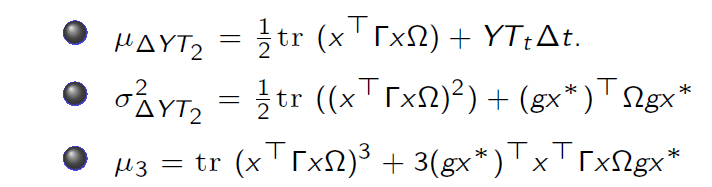

## Forwards Tipo de Cambio

### Código R

In [ ]:
%%R
#FORWARDS Y/O FUTUROS DE TIPO DE CAMBIO CÁLCULO

################MATRICES DE INTERPOLACION LINEAL ####################
#FORWARDS Y/O FUTUROS DE TIPO DE CAMBIO CÁLCULO

################MATRICES DE INTERPOLACION LINEAL ####################

m=ncol(plazos_fwd)
X1_fwtdc=matrix(0,n,m)
X2_fwtdc=matrix(0,n,m)

for (j in 1:n)
{
  X1_fwtdc[j,]=if(itpl==0){approx(nodos1_ftdc,x1_ftdc[j,],plazos_fwd,rule=2)$y}else{talamb(nodos1_ftdc,x1_ftdc[j,],plazos_fwd)}
  X2_fwtdc[j,]=if(itpl==0){approx(nodos2_ftdc,x2_ftdc[j,],plazos_fwd,rule=2)$y}else{talamb(nodos2_ftdc,x2_ftdc[j,],plazos_fwd)}
  if(trlib==1){X1_fwtdc[j,]=((1+X1_fwtdc[j,])^(plazos_fwd/180)-1)*360/plazos_fwd} #transformación de act 180 a 360
}


futuroTC = function(t,tl,tn,s,k) #t=dias por vencer, tn=tasa nacional para tipo de cambio forward, tl= tasa extranjera pra tipo de cambio forward, S=spot
{
  f=s*((1+tn*t/360)/(1+tl*t/360)) #Se obtiene el tipo de cambio forward
  t(as.numeric((f-k)/(1+t*tn/360))) #Se obtiene el valor del payoff a valor presente con el valor z que define si es largo o corto
}

X3_ftdc=as.matrix(X3_ftdc)

V0_fwtdc=futuroTC(plazos_fwd,X1_fwtdc[1,],X2_fwtdc[1,],X3_ftdc[1,],kst_fwd)*contratos_fwd*nominal_fwd
print(V0_fwtdc)

dfuturoTC_tl = function(t,tl,tn,s,k) #t=dias por vencer, tn=tasa nacional para tipo de cambio forward, tl= tasa extranjera pra tipo de cambio forward, S=spot
{
  f=-s*((1+tn*t/360)/(1+tl*t/360)^2)*(t/360) #Se obtiene el tipo de cambio forward
  t(as.numeric((f)/(1+t*tn/360))) #Se obtiene el valor del payoff a valor presente con el valor z que define si es largo o corto
}

dfuturoTC_tn = function(t,tl,tn,s,k) #t=dias por vencer, tn=tasa nacional para tipo de cambio forward, tl= tasa extranjera pra tipo de cambio forward, S=spot
{
  f=s*((t/360)/(1+tl*t/360)) #Se obtiene el tipo de cambio forward
  f1=s*((1+tn*t/360)/(1+tl*t/360)) #Se obtiene el tipo de cambio forward
  t(as.numeric((f)/(1+t*tn/360)-(f1-k)/(1+t*tn/360)^2*(t/360))) #Se obtiene el valor del payoff a valor presente con el valor z que define si es largo o corto
}

dfuturoTC_s = function(t,tl,tn,s,k) #t=dias por vencer, tn=tasa nacional para tipo de cambio forward, tl= tasa extranjera pra tipo de cambio forward, S=spot
{
  1/(1+t*tl/360) #Se obtiene el valor del payoff a valor presente con el valor z que define si es largo o corto
}

dfuturoTC_t = function(t,tl,tn,s,k) #t=dias por vencer, tn=tasa nacional para tipo de cambio forward, tl= tasa extranjera pra tipo de cambio forward, S=spot
{
  f=s*((1+tn/360)/(1+tl*t/360))-s*((1+tn*t/360)/(1+tl*t/360)^2)*(tl/360) #Se obtiene el tipo de cambio forward
  #t(as.numeric((f)/(1+t*tn/360)-(f-k)/(1+t*tn/360)^2*(tn/360))) #Se obtiene el valor del payoff a valor presente con el valor z que define si es largo o corto
  -(f-k)/(1+t*tn/360)^2*(tn/360)
}

mgamma_futTC= function(t,tl,tn,s,k,contratos_fwd,nominal_fwd)
{
c11= matrix(0,1,length(k))#spot spot
# c12= -(((1+tn*t/360)/(1+tl*t/360)^2)*(t/360))/(1+t*tn/360)*contratos_fwd*nominal_fwd#spot tl
c12= -(t/360)/(1+t*tl/360)^2*contratos_fwd*nominal_fwd#spot tl
c13=  matrix(0,1,length(k))  #spot tn
c21=  -(t/360)/(1+t*tl/360)^2*contratos_fwd*nominal_fwd #tl spot
c22= (2*s*((1+tn*t/360)/(1+tl*t/360)^3)*(t/360)^3)/(1+t*tn/360)*contratos_fwd*nominal_fwd #tl tl
c23= matrix(0,1,length(k)) #tl tn
c31=(((t/360)/(1+tl*t/360))/(1+t*tn/360)-(((1+tn*t/360)/(1+tl*t/360)))/(1+t*tn/360)^2*(t/360))*contratos_fwd*nominal_fwd #tn spot
c32=   (-s*((t/360)^2/(1+tl*t/360)^2)/(1+t*tn/360)-(s*((t/360)/(1+tl*t/360)))/(1+t*tn/360)^2*(t/360))*contratos_fwd*nominal_fwd #tn tl
c33=  (s*((t/360)/(1+tl*t/360))/(1+t*tn/360)^2*(t/360)+2*(s*((1+tn*t/360)/(1+tl*t/360))-k)/(1+t*tn/360)^3*(t/360)^2-(s*((t/360)^2/(1+tl*t/360)))/(1+t*tn/360)^2)*contratos_fwd*nominal_fwd #tn tn
m=length(t)
rbind(cbind(diagv(c11),diagv(c12),diagv(c13)),cbind(diagv(c21),diagv(c22),diagv(c23)),cbind(diagv(c31),diagv(c32),diagv(c33)))
}


X_ftdc=cbind(matrix(X3_ftdc,n,ncol(X1_fwtdc)),X1_fwtdc,X2_fwtdc) #Hist facto riesgo
xp_ftdc=t(as.matrix(X_ftdc[1,])) #Valores actuales X0
mu_ftdc=dfuturoTC_t(plazos_fwd,X1_fwtdc[1,],X2_fwtdc[1,],X3_ftdc[1,],kst_fwd)*contratos_fwd*nominal_fwd #primera derivada con respecto al tiempo evaluada en x0
g_ftdc=cbind(dfuturoTC_s(plazos_fwd,X1_fwtdc[1,],X2_fwtdc[1,],X3_ftdc[1,],kst_fwd)*contratos_fwd*nominal_fwd,dfuturoTC_tl(plazos_fwd,X1_fwtdc[1,],X2_fwtdc[1,],X3_ftdc[1,],kst_fwd)*contratos_fwd*nominal_fwd,dfuturoTC_tn(plazos_fwd,X1_fwtdc[1,],X2_fwtdc[1,],X3_ftdc[1,],kst_fwd)*contratos_fwd*nominal_fwd) #gradiente evaluado en x0
g_ftdctT=xp_ftdc*g_ftdc #gradienete evaluado en x0 por x0
gamma_ftdc=mgamma_futTC(plazos_fwd,X1_fwtdc[1,],X2_fwtdc[1,],X3_ftdc[1,],kst_fwd,contratos_fwd,nominal_fwd) #evaluación de gamma
gamma_ftdctT2=gamma_ftdc*(t(xp_ftdc)%*%xp_ftdc) #evaluación de gamma multiplicado por x^{2}

print(m)

print(mu_ftdc)
print(g_ftdc)
print(g_ftdctT)

print(gamma_ftdc)
print(gamma_ftdctT2)

print(X_ftdc[1,])
print(xp_ftdc)

dfuturoTC_s(plazos_fwd,X1_fwtdc[1,],X2_fwtdc[1,],X3_ftdc[1,],kst_fwd)*contratos_fwd*nominal_fwd

print(X_ftdc[1:10,])

          [,1]    [,2]
[1,] -200.9581 -13.137
[1] 2
          [,1]        [,2]
[1,] 0.1995195 -0.09474664
         [,1]      [,2]      [,3]     [,4]     [,5]      [,6]
[1,] 475.3571 -181.3593 -8794.069 5778.035 8714.132 -5497.492
        [,1]      [,2]     [,3]     [,4]     [,5]      [,6]
[1,] 9249.96 -3529.064 -455.891 328.9217 736.7862 -471.1625
              [,1]          [,2]        [,3]        [,4]      [,5]      [,6]
[1,]  0.000000e+00  0.000000e+00   -451.9288      0.0000    0.0000   0.00000
[2,]  0.000000e+00  0.000000e+00      0.0000    296.9343    0.0000   0.00000
[3,] -4.519288e+02  0.000000e+00  16721.2937      0.0000    0.0000   0.00000
[4,]  0.000000e+00  2.969343e+02      0.0000 -34161.8729    0.0000   0.00000
[5,] -5.551115e-14  0.000000e+00 -15972.4285      0.0000 -341.6927   0.00000
[6,]  0.000000e+00 -4.440892e-14      0.0000  17662.4949    0.0000 -64.23556
              [,1]          [,2]       [,3]       [,4]      [,5]       [,6]
[1,]  0.000000e+00  0.000000e+00 -4

Una perspectiva para valuación de dos forwards
$$g=\frac{dF}{dx}=(\frac{dF_1(x_0)}{dx_1},\frac{dF_2(x_0)}{dx_1},\frac{dF_1(x_0)}{dx_2},\frac{dF_2(x_0)}{dx_2},\frac{dF_1(x_0)}{dx_3},\frac{dF_2(x_0)}{dx_3})$$

Para $k$ forwards se vería así:

$$g=\frac{dF}{dx}=(\color{red}{\frac{dF_1(x_0)}{dx_1},\frac{dF_2(x_0)}{dx_1},\cdots, \frac{dF_k(x_0)}{dx_1}},\color{green}{ \frac{dF_1(x_0)}{dx_2},\frac{dF_2(x_0)}{dx_2}, \cdots, \frac{dF_k(x_0)}{dx_2}},\color{blue}{\frac{dF_1(x_0)}{dx_3},\frac{dF_2(x_0)}{dx_3},\cdots, \frac{dF_k(x_0)}{dx_3}})$$

Otra arreglo, podría ser este:
$$g=\frac{dF}{dx}=(\frac{dF_1(x_0)}{dx_1},\frac{dF_1(x_0)}{dx_2},\frac{dF_1(x_0)}{dx_3},\frac{dF_2(x_0)}{dx_1},\frac{dF_2(x_0)}{dx_2},\frac{dF_2(x_0)}{dx_3})$$


La gamma por su lado sería así para dos fwds:


$$ \Gamma=\frac{d^2F}{dx^2}=\left(
  \begin{array}{cccccc}
 \color{red}{\frac{d^2F_1(x_0)}{dx^{2}_1} }&  \frac{dF_1dF_2(x_0)}{dx^2_1} & \color{yellow}{ \frac{d^2F_1(x_0)}{dx_1dx_2}} & \frac{dF_1dF_2(x_0)}{dx_1dx_2} & \color{purple}{ \frac{d^2F_1(x_0)}{dx_1dx_3}} & \frac{dF_1dF_2(x_0)}{dx_1dx_3} \\  \frac{dF_1F_2(x_0)}{dx^2_1} &\color{red}{ \frac{d^2F_2(x_0)}{dx^2_1}} & \frac{dF_1dF_2(x_0)}{dx_1dx_2} & \color{yellow}{ \frac{d^2F_2(x_0)}{dx_1dx_2}} & \frac{dF_1dF_2(x_0)}{dx_1dx_3} &\color{purple}{ \frac{d^2F_2(x_0)}{dx_1dx_3}} \\  \color{yellow}{\frac{d^2F_1(x_0)}{dx_2dx_1}} &  \frac{dF_1dF_2(x_0)}{dx_2dx_1} & \color{green}{ \frac{d^2F_1(x_0)}{dx^2_2}} & \frac{dF_1dF_2(x_0)}{dx^2_2} & \color{cyan}{\frac{d^2F_1(x_0)}{dx_2dx_3}} & \frac{dF_1dF_2(x_0)}{dx_2dx_3} \\ \frac{dF_1F_2(x_0)}{dx_2dx_1} & \color{yellow}{\frac{d^2F_2(x_0)}{dx_2dx_1}} & \frac{dF_1dF_2(x_0)}{dx^2_2} & \color{green}{\frac{d^2F_2(x_0)}{dx^2_2}} & \frac{dF_1dF_2(x_0)}{dx_2dx_3} & \color{cyan}{\frac{d^2F_2(x_0)}{dx_2dx_3}} \\  \color{purple}{\frac{d^2F_1(x_0)}{dx_3dx_1} } & \frac{dF_1dF_2(x_0)}{dx_3dx_1} & \color{cyan}{ \frac{d^2F_1(x_0)}{dx_3dx_2}} & \frac{dF_1dF_2(x_0)}{dx_3dx_2} & \color{blue}{\frac{d^2F_1(x_0)}{dx^3}} & \frac{dF_1dF_2(x_0)}{dx^2_3} \\ \frac{dF_1F_2(x_0)}{dx_3dx_1} & \color{purple}{ \frac{d^2F_2(x_0)}{dx_3dx_1}} & \frac{dF_1dF_2(x_0)}{dx_3dx_2} & \color{cyan}{ \frac{d^2F_2(x_0)}{dx_3dx_2}} & \frac{dF_1dF_2(x_0)}{dx^2_3} & \color{blue}{ \frac{d^2F_2(x_0)}{dx^2_3}}
 \end{array} \right)  $$

$$ \Gamma=\frac{d^2f(x_0)}{dx^2}=\left(
  \begin{array}{cccccc}
\color{red}{\frac{d^2f(x_{0})}{dx^{2}_{1,1}} }&  \frac{d^2f(x_{0})}{dx_{1,1}dx_{1,2}} & \color{yellow}{ \frac{d^2f(x_{0})}{dx_{1,1}dx_{2,1}}} & \frac{d^2f(x_{0})}{dx_{1,1}dx_{2,2}} & \color{purple}{ \frac{d^2f(x_{0})}{dx_{1,1}dx_{3,1}}} & \frac{d^2f(x_{0})}{dx_{1,1}dx_{3,2}}
\\  
 \frac{d^2f(x_{0})}{dx_{1,2}dx_{1,1}} &\color{red}{ \frac{d^2f(x_{0})}{dx^2_{1,2}}} & \frac{d^2f(x_{0})}{dx_{1,2}dx_{2,1}} & \color{yellow}{ \frac{d^2f(x_{0})}{dx_{1,2}dx_{2,2}}} & \frac{d^2f(x_{0})}{dx_{1,2}dx_{3,1}} &\color{purple}{ \frac{d^2f(x_{0})}{dx_{1,2}dx_{3,2}}}
 \\  
 \color{yellow}{\frac{d^2f(x_{0})}{dx_{2,1}dx_{1,1}}} &  \frac{d^2f(x_{0})}{dx_{2,1}dx_{1,2}} & \color{green}{ \frac{d^2f(x_{0})}{dx^2_{2,1}}} & \frac{d^2f(x_{0})}{dx_{2,1}dx_{2,2}} & \color{cyan}{\frac{d^2f(x_{0})}{dx_{2,1}dx_{3,1}}} & \frac{d^2f(x_{0})}{dx_{2,1}dx_{3,2}}
  \\
 \frac{d^2f(x_{0})}{dx_{2,2}dx_{1,1}} & \color{yellow}{\frac{d^2f(x_{0})}{dx_{2,2}dx_{1,2}}} & \frac{d^2f(x_{0})}{dx_{2,2}dx_{2,1}} & \color{green}{\frac{d^2f(x_{0})}{dx^2_{2,2}}} & \frac{d^2f(x_{0})}{dx_{2,2}dx_{3,1}} & \color{cyan}{\frac{d^2f(x_{0})}{dx_{2,2}dx_{3,2}}}
  \\  
 \color{purple}{\frac{d^2f(x_{0})}{dx_{3,1}dx_{1,1}} } & \frac{d^2f(x_{0})}{dx_{3,1}dx_{1,2}} & \color{cyan}{ \frac{d^2f(x_{0})}{dx_{3,1}dx_{2,1}}} & \frac{d^2f(x_{0})}{dx_{3,1}dx_{2,2}} & \color{blue}{\frac{d^2f(x_{0})}{dx^2_{3,1}}} & \frac{d^2f(x_{0})}{dx_{3,1}dx_{3,2}}
 \\
 \frac{d^2f(x_{0})}{dx_{3,2}dx_{1,1}} & \color{purple}{ \frac{d^2f(x_{0})}{dx_{3,2}dx_{1,2}}} & \frac{d^2f(x_{0})}{dx_{3,2}dx_{2,1}} & \color{cyan}{ \frac{d^2f(x_{0})}{dx_{3,2}dx_{2,2}}} & \frac{d^2f(x_{0})}{dx_{3,2}dx_{3,1}} & \color{blue}{ \frac{d^2f(x_{0})}{dx^2_{3,2}}}
 \end{array} \right)  $$

 donde $x_{i,j}$, $i:\{1,2,3\}$ y $j:\{1,2\}$

$$ \Gamma=\frac{d^2f(x_0)}{dx^2}=\left(
  \begin{array}{cccccccccccc}
\color{red}{\frac{d^2f(x_{0})}{dx^{2}_{1,1}} }&  \frac{d^2f(x_{0})}{dx_{1,1}dx_{1,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{1,1}dx_{1,k}} & \color{yellow}{ \frac{d^2f(x_{0})}{dx_{1,1}dx_{2,1}}} & \frac{d^2f(x_{0})}{dx_{1,1}dx_{2,1}} & \cdots & \frac{d^2f(x_{0})}{dx_{1,1}dx_{2,k}} & \color{purple}{ \frac{d^2f(x_{0})}{dx_{1,1}dx_{3,1}}} & \frac{d^2f(x_{0})}{dx_{1,1}dx_{3,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{1,1}dx_{3,k}}
\\  
 \frac{d^2f(x_{0})}{dx_{1,2}dx_{1,1}} &\color{red}{ \frac{d^2f(x_{0})}{dx^2_{1,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{1,2}dx_{1,k}} & \frac{d^2f(x_{0})}{dx_{1,2}dx_{2,1}} & \color{yellow}{ \frac{d^2f(x_{0})}{dx_{1,2}dx_{2,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{1,2}dx_{2,k}} & \frac{d^2f(x_{0})}{dx_{1,2}dx_{3,1}} &\color{purple}{ \frac{d^2f(x_{0})}{dx_{1,2}dx_{3,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{1,2}dx_{3,k}}
 \\  
 \color{yellow}{\frac{d^2f(x_{0})}{dx_{2,1}dx_{1,1}}} &  \frac{d^2f(x_{0})}{dx_{2,1}dx_{1,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,1}dx_{1,k}} & \color{green}{ \frac{d^2f(x_{0})}{dx^2_{2,1}}} & \frac{d^2f(x_{0})}{dx_{2,1}dx_{2,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,1}dx_{2,k}} & \color{cyan}{\frac{d^2f(x_{0})}{dx_{2,1}dx_{3,1}}} & \frac{d^2f(x_{0})}{dx_{2,1}dx_{3,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,1}dx_{3,k}}
  \\
 \frac{d^2f(x_{0})}{dx_{2,2}dx_{1,1}} & \color{yellow}{\frac{d^2f(x_{0})}{dx_{2,2}dx_{1,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,2}dx_{1,k}} &\frac{d^2f(x_{0})}{dx_{2,2}dx_{2,1}} & \color{green}{\frac{d^2f(x_{0})}{dx^2_{2,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,2}dx_{2,k}} & \frac{d^2f(x_{0})}{dx_{2,2}dx_{3,1}} & \color{cyan}{\frac{d^2f(x_{0})}{dx_{2,2}dx_{3,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,2}dx_{3,k}}
  \\  
 \color{purple}{\frac{d^2f(x_{0})}{dx_{3,1}dx_{1,1}} } & \frac{d^2f(x_{0})}{dx_{3,1}dx_{1,2}} &  \cdots &\frac{d^2f(x_{0})}{dx_{3,1}dx_{1,k}} & \color{cyan}{ \frac{d^2f(x_{0})}{dx_{3,1}dx_{2,1}}} & \frac{d^2f(x_{0})}{dx_{3,1}dx_{2,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{3,1}dx_{2,k}} & \color{blue}{\frac{d^2f(x_{0})}{dx^2_{3,1}}} & \frac{d^2f(x_{0})}{dx_{3,1}dx_{3,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{3,1}dx_{3,k}}
 \\
 \frac{d^2f(x_{0})}{dx_{3,2}dx_{1,1}} & \color{purple}{ \frac{d^2f(x_{0})}{dx_{3,2}dx_{1,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{3,2}dx_{1,k}} & \frac{d^2f(x_{0})}{dx_{3,2}dx_{2,1}} & \color{cyan}{ \frac{d^2f(x_{0})}{dx_{3,2}dx_{2,2}}}& \cdots &\frac{d^2f(x_{0})}{dx_{3,2}dx_{2,k}} & \frac{d^2f(x_{0})}{dx_{3,2}dx_{3,1}} & \color{blue}{ \frac{d^2f(x_{0})}{dx^2_{3,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{3,2}dx_{3,k}}
 \end{array} \right)  $$

 donde $x_{i,j}$, $i:\{1,2,3\}$ y $j:\{1,2\}$

$$ \Gamma=\frac{d^2f(x_0)}{dx^2}=\left(
  \begin{array}{cccccccccccc}
\color{red}{\frac{d^2f(x_{0})}{dx^{2}_{1,1}} } & \color{yellow}{ \frac{d^2f(x_{0})}{dx_{1,1}dx_{2,1}}}  & \color{purple}{ \frac{d^2f(x_{0})}{dx_{1,1}dx_{3,1}}} &  \cdots & \cdots & \cdots & \frac{d^2f(x_{0})}{dx_{1,1}dx_{1,k}}  &  \frac{d^2f(x_{0})}{dx_{1,1}dx_{2,k}}  &  \frac{d^2f(x_{0})}{dx_{1,1}dx_{3,k}}  &  hs & fs & bs
\\  
 \color{yellow}{ \frac{d^2f(x_{0})}{dx_{2,1}dx_{1,2}}} & \color{green}{ \frac{d^2f(x_{0})}{dx^2_{2,1}}} & \color{cyan}{\frac{d^2f(x_{0})}{dx_{2,2}dx_{3,2}}} & \cdots & \cdots & cdots &  \frac{d^2f(x_{0})}{dx_{2,1}dx_{1,k}} &  \frac{d^2f(x_{0})}{dx_{2,1}dx_{2,k}} & \frac{d^2f(x_{0})}{dx_{2,2}dx_{3,k}} & bs & \cdots & hs
 \\  
 \color{purple}{\frac{d^2f(x_{0})}{dx_{3,1}dx_{1,1}} } &  \color{cyan}{\frac{d^2f(x_{0})}{dx_{3,2}dx_{2,3}}} & \color{blue}{\frac{d^2f(x_{0})}{dx^2_{3,1}}} &\frac{d^2f(x_{0})}{dx_{2,1}dx_{1,k}} & \color{green}{ \frac{d^2f(x_{0})}{dx^2_{2,1}}} & \frac{d^2f(x_{0})}{dx_{2,1}dx_{2,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,1}dx_{2,k}} & \color{cyan}{\frac{d^2f(x_{0})}{dx_{2,1}dx_{3,1}}} & \frac{d^2f(x_{0})}{dx_{2,1}dx_{3,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,1}dx_{3,k}}
  \\
 \frac{d^2f(x_{0})}{dx_{2,2}dx_{1,1}} & \color{yellow}{\frac{d^2f(x_{0})}{dx_{2,2}dx_{1,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,2}dx_{1,k}} &\frac{d^2f(x_{0})}{dx_{2,2}dx_{2,1}} & \color{green}{\frac{d^2f(x_{0})}{dx^2_{2,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,2}dx_{2,k}} & \frac{d^2f(x_{0})}{dx_{2,2}dx_{3,1}} & \color{cyan}{\frac{d^2f(x_{0})}{dx_{2,2}dx_{3,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{2,2}dx_{3,k}}
  \\  
 \color{purple}{\frac{d^2f(x_{0})}{dx_{3,1}dx_{1,1}} } & \frac{d^2f(x_{0})}{dx_{3,1}dx_{1,2}} &  \cdots &\frac{d^2f(x_{0})}{dx_{3,1}dx_{1,k}} & \color{cyan}{ \frac{d^2f(x_{0})}{dx_{3,1}dx_{2,1}}} & \frac{d^2f(x_{0})}{dx_{3,1}dx_{2,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{3,1}dx_{2,k}} & \color{blue}{\frac{d^2f(x_{0})}{dx^2_{3,1}}} & \frac{d^2f(x_{0})}{dx_{3,1}dx_{3,2}} & \cdots &\frac{d^2f(x_{0})}{dx_{3,1}dx_{3,k}}
 \\
 \frac{d^2f(x_{0})}{dx_{3,2}dx_{1,1}} & \color{purple}{ \frac{d^2f(x_{0})}{dx_{3,2}dx_{1,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{3,2}dx_{1,k}} & \frac{d^2f(x_{0})}{dx_{3,2}dx_{2,1}} & \color{cyan}{ \frac{d^2f(x_{0})}{dx_{3,2}dx_{2,2}}}& \cdots &\frac{d^2f(x_{0})}{dx_{3,2}dx_{2,k}} & \frac{d^2f(x_{0})}{dx_{3,2}dx_{3,1}} & \color{blue}{ \frac{d^2f(x_{0})}{dx^2_{3,2}}} & \cdots &\frac{d^2f(x_{0})}{dx_{3,2}dx_{3,k}}
 \end{array} \right)  $$

 donde $x_{i,j}$, $i:\{1,2,3\}$ y $j:\{1,2\}$

### Código Python

In [12]:
import numpy as np

# Suponemos que plazos_fwd, n, itpl, nodos1_ftdc, nodos2_ftdc, x1_ftdc, x2_ftdc, trlib,
# X3_ftdc, kst_fwd, contratos_fwd, y nominal_fwd ya están definidos

m = len(plazos_fwd)

X1_fwtdc = np.zeros((n, m))
X2_fwtdc = np.zeros((n, m))

def approx(x, y, new_x, rule=1):
    return np.interp(new_x, x, y)


for j in range(n):
    if itpl == 0:
        X1_fwtdc[j, :] = approx(nodos1_ftdc, x1_ftdc.iloc[j, :], plazos_fwd)
        X2_fwtdc[j, :] = approx(nodos2_ftdc, x2_ftdc.iloc[j, :], plazos_fwd)
    else:
        X1_fwtdc[j, :] = talamb(nodos1_ftdc, x1_ftdc.iloc[j, :], plazos_fwd)
        X2_fwtdc[j, :] = talamb(nodos2_ftdc, x2_ftdc.iloc[j, :], plazos_fwd)

    if trlib == 1:
        X1_fwtdc[j, :] = ((1 + X1_fwtdc[j, :]) ** (plazos_fwd / 180) - 1) * 360 / plazos_fwd

def futuroTC(t, tl, tn, s, k):
    f = s * ((1 + tn * t / 360) / (1 + tl * t / 360))
    return (f - k) / (1 + t * tn / 360)

X3_ftdc = np.array(X3_ftdc)  # Aseguramos que sea una matriz de NumPy
X_futtdc = np.hstack([np.tile(X3_ftdc, (1, m)), X1_fwtdc, X2_fwtdc])

V0_fwtdc = futuroTC(plazos_fwd, X1_fwtdc[0, :], X2_fwtdc[0, :], X3_ftdc[0, :], kst_fwd) * contratos_fwd * nominal_fwd
print(V0_fwtdc)


def dfuturoTC_tl(t, tl, tn, s, k):
    f = -s * ((1 + tn * t / 360) / (1 + tl * t / 360)**2) * (t / 360)
    return np.asarray(f / (1 + t * tn / 360))

def dfuturoTC_tn(t, tl, tn, s, k):
    f = s * ((t / 360) / (1 + tl * t / 360))
    f1 = s * ((1 + tn * t / 360) / (1 + tl * t / 360))
    return np.asarray((f / (1 + t * tn / 360)) - (f1 - k) / (1 + t * tn / 360)**2 * (t / 360))

def dfuturoTC_s(t, tl, tn, s, k):
    return 1 / (1 + t * tl / 360)

def dfuturoTC_t(t, tl, tn, s, k):
    f=s*((1+tn/360)/(1+tl*t/360))-s*((1+tn*t/360)/(1+tl*t/360)**2)*(tl/360) #Se obtiene el tipo de cambio forward
    #t(as.numeric((f)/(1+t*tn/360)-(f-k)/(1+t*tn/360)^2*(tn/360))) #Se obtiene el valor del payoff a valor presente con el valor z que define si es largo o corto
    return -(f-k)/(1+t*tn/360)**2*(tn/360)




def mgamma_futTC(t, tl, tn, s, k, contratos_fwd, nominal_fwd):
    try:
      m = len(t)
    except:
      m=1

    c11 = np.zeros(m)  # spot spot
    c12 = -(t / 360) / (1 + t * tl / 360)**2 * contratos_fwd * nominal_fwd  # spot tl
    c13 = np.zeros(m)  # spot tn

    c21 = -(t / 360) / (1 + t * tl / 360)**2 * contratos_fwd * nominal_fwd  # tl spot
    c22 = (2 * s * ((1 + tn * t / 360) / (1 + tl * t / 360)**3) * (t / 360)**2) / (1 + t * tn / 360) * contratos_fwd * nominal_fwd  # tl tl
    c23 = np.zeros(m)  # tl tn

    c31 = ((t / 360) / (1 + tl * t / 360) / (1 + t * tn / 360) - ((1 + tn * t / 360) / (1 + tl * t / 360)) / (1 + t * tn / 360)**2 * (t / 360)) * contratos_fwd * nominal_fwd  # tn spot
    c32 = (-s * ((t / 360)**2 / (1 + tl * t / 360)**2) / (1 + t * tn / 360) - (s * (t / 360) / (1 + tl * t / 360)) / (1 + t * tn / 360)**2 * (t / 360)) * contratos_fwd * nominal_fwd  # tn tl
    c33 = (s * (t / 360) / (1 + tl * t / 360) / (1 + t * tn / 360)**2 * (t / 360) + 2 * (s * (1 + tn * t / 360) / (1 + tl * t / 360) - k) / (1 + t * tn / 360)**3 * (t / 360)**2 - (s * (t / 360)**2 / (1 + tl * t / 360)) / (1 + t * tn / 360)**2) * contratos_fwd * nominal_fwd  # tn tn

    try:
      out=np.block([
          [np.diag(c11), np.diag(c12), np.diag(c13)],
          [np.diag(c21), np.diag(c22), np.diag(c23)],
          [np.diag(c31), np.diag(c32), np.diag(c33)]
      ])
    except:
      out=np.block([
          [c11, c12, c13],
          [c21, c22, c23],
          [c31, c32, c33]
      ])

    # Creating the matrix using numpy's block function to stack arrays
    return out

X_ftdc = np.hstack([np.tile(X3_ftdc, (1, m)), X1_fwtdc, X2_fwtdc])

x_ftdc_fr_tdc = np.hstack((np.ones(m),np.zeros(2*m)))
x_ftdc_fr_ir = np.hstack((np.zeros(m),np.ones(2*m)))
# print(x_ftdc_fr_tdc)
# Get the first row of the matrix X_ftdc
xp_ftdc = X_ftdc[0, :]
# print(xp_ftdc)

# Calculate mu_ftdc
mu_ftdc = dfuturoTC_t(plazos_fwd, X1_fwtdc[0, :], X2_fwtdc[0, :], X3_ftdc[0, :], kst_fwd) * contratos_fwd * nominal_fwd

# Calculate g_ftdc
g_ftdc = np.hstack([
    dfuturoTC_s(plazos_fwd, X1_fwtdc[0, :], X2_fwtdc[0, :], X3_ftdc[0, :], kst_fwd) * contratos_fwd * nominal_fwd,
    dfuturoTC_tl(plazos_fwd, X1_fwtdc[0, :], X2_fwtdc[0, :], X3_ftdc[0, :], kst_fwd) * contratos_fwd * nominal_fwd,
    dfuturoTC_tn(plazos_fwd, X1_fwtdc[0, :], X2_fwtdc[0, :], X3_ftdc[0, :], kst_fwd) * contratos_fwd * nominal_fwd
])

# Calculate g_ftdctT
g_ftdctT = xp_ftdc * g_ftdc

# Calculate gamma_ftdc
gamma_ftdc = mgamma_futTC(plazos_fwd, X1_fwtdc[0, :], X2_fwtdc[0, :], X3_ftdc[0, :], kst_fwd, contratos_fwd, nominal_fwd)

# Calculate gamma_ftdctT2
gamma_ftdctT2 = gamma_ftdc * (xp_ftdc.reshape(-1, 1) @ xp_ftdc.reshape(1, -1))


print(mu_ftdc)
print(g_ftdc)
print(g_ftdctT)

print(gamma_ftdc)
print(gamma_ftdctT2)
print(gamma_ftdctT2.shape)

print(X_ftdc[1,])
print(xp_ftdc)

np.set_printoptions(precision=2)

# Imprimir la matriz
print(gamma_ftdc)


[-200.95808216  -13.13699565]
[ 0.19951953 -0.09474664]
[  475.3571382   -181.3592693  -8794.06890584  5778.03547149
  8714.13172339 -5497.49225186]
[ 9249.95987139 -3529.06442015  -455.89096555   328.92169748
   736.78623016  -471.16248501]
[[ 0.00000000e+00  0.00000000e+00 -4.51928818e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.96934305e+02
   0.00000000e+00  0.00000000e+00]
 [-4.51928818e+02  0.00000000e+00  1.67212937e+04  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.96934305e+02  0.00000000e+00 -1.89204219e+04
   0.00000000e+00  0.00000000e+00]
 [-5.55111512e-14  0.00000000e+00 -1.59724285e+04  0.00000000e+00
  -3.41692722e+02  0.00000000e+00]
 [ 0.00000000e+00 -4.44089210e-14  0.00000000e+00  1.76624949e+04
   0.00000000e+00 -6.42355579e+01]]
[[ 0.00000000e+00  0.00000000e+00 -4.55890966e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 

## Forwards Acciones o Índices

### Código R

In [ ]:
%%R
#FORWARDS Y/O FUTUROS DE ÍNDICES CÁLCULO

################MATRICES DE INTERPOLACION LINEAL ####################

m=ncol(plazos_fwd_ind)
X1_fwind=matrix(0,n,m) #DIVIDENDOS
X2_fwind=matrix(0,n,m)

for (j in 1:n)
{
  #X1_fwind[j,]=if(itpl==0){approx(nodos1_,x1_ftdc[j,],plazos_fwd)$y}else{talamb(nodos1_ftdc,x1_ftdc[j,],plazos_fwd)}
  X2_fwind[j,]=if(itpl==0){approx(nodos_gov,x_orig_gov[j,],plazos_fwd_ind,rule=2)$y}else{talamb(nodos_gov,x_orig_gov[j,],plazos_fwd_ind)}
  #if(trlib==1){X1_fwtdc[j,]=((1+X1_fwtdc[j,])^(plazos_fwd/180)-1)*360/plazos_fwd} #transformación de act 180 a 360
}

X3_find=as.matrix(X3_find)

V0_fwind=futuroTC(plazos_fwd_ind,X1_fwind[1,],X2_fwind[1,],X3_find[1,],kst_fwd_ind)*contratos_fwd_ind*nominal_fwd_ind

X_find=cbind(matrix(X3_find,n,ncol(X1_fwind)),X1_fwind,X2_fwind)
xp_find=t(as.matrix(X_find[1,]))
mu_find=dfuturoTC_t(plazos_fwd_ind,X1_fwind[1,],X2_fwind[1,],X3_find[1,],kst_fwd_ind)*contratos_fwd_ind*nominal_fwd_ind
g_find=cbind(dfuturoTC_s(plazos_fwd_ind,X1_fwind[1,],X2_fwind[1,],X3_find[1,],kst_fwd_ind)*contratos_fwd_ind*nominal_fwd_ind,dfuturoTC_tl(plazos_fwd_ind,X1_fwind[1,],X2_fwind[1,],X3_find[1,],kst_fwd_ind)*contratos_fwd_ind*nominal_fwd_ind,dfuturoTC_tn(plazos_fwd_ind,X1_fwind[1,],X2_fwind[1,],X3_find[1,],kst_fwd_ind)*contratos_fwd_ind*nominal_fwd_ind)
g_findtT=xp_find*g_find
gamma_find=mgamma_futTC(plazos_fwd_ind,X1_fwind[1,],X2_fwind[1,],X3_find[1,],kst_fwd_ind,contratos_fwd_ind,nominal_fwd_ind)
gamma_findtT2=gamma_find*(t(xp_find)%*%xp_find)


print(V0_fwind)
print(gamma_find)




          [,1]      [,2]
[1,] -6729.696 -2305.811
     [,1]      [,2]      [,3]          [,4]      [,5]      [,6]
[1,]    0  0.000000     -1.00  0.000000e+00      0.00     0.000
[2,]    0  0.000000      0.00 -1.361111e+00      0.00     0.000
[3,]   -1  0.000000  82648.62  0.000000e+00      0.00     0.000
[4,]    0 -1.361111      0.00  2.084089e+05      0.00     0.000
[5,]    0  0.000000 -73478.96  0.000000e+00 -11494.18     0.000
[6,]    0  0.000000      0.00 -1.308270e+05      0.00 -6914.012


### Código **Python**

In [13]:
m_ind = len(plazos_fwd_ind)

X1_fwind = np.zeros((n, m_ind))  # Matriz para DIVIDENDOS
X2_fwind = np.zeros((n, m_ind))

def approx(x, y, new_x, rule=2):
    return np.interp(new_x, x, y)


for j in range(n):
    if itpl == 0:
        X2_fwind[j, :] = approx(nodos_gov, x_orig_gov.iloc[j, :], plazos_fwd_ind)
    else:
        X2_fwind[j, :] = talamb(nodos_gov, x_orig_gov.iloc[j, :], plazos_fwd_ind)
X3_find = np.array(X3_find)

X_futind = np.hstack((X1_fwind, X2_fwind, X3_find))


V0_fwind = futuroTC(plazos_fwd_ind, X1_fwind[0, :], X2_fwind[0, :], X3_find[0, :], kst_fwd_ind) * contratos_fwd_ind * nominal_fwd_ind

print(V0_fwind)

X_find = np.hstack([np.tile(X3_find, (1, m_ind)), X1_fwind, X2_fwind])

x_find_fr_acc = np.hstack((np.ones(m),np.zeros(2*m)))
x_find_fr_ir = np.hstack((np.zeros(m),np.ones(2*m)))

# Get the first row of the matrix X_ftdc
xp_find = X_find[0, :]

# Calculate mu_ftdc
mu_find = dfuturoTC_tn(plazos_fwd_ind, X1_fwind[0, :], X2_fwind[0, :], X3_find[0, :], kst_fwd_ind) * contratos_fwd_ind * nominal_fwd_ind

# Calculate g_ftdc
g_find = np.hstack([
    dfuturoTC_s(plazos_fwd_ind, X1_fwind[0, :], X2_fwind[0, :], X3_find[0, :], kst_fwd_ind) * contratos_fwd_ind * nominal_fwd_ind,
    dfuturoTC_tl(plazos_fwd_ind, X1_fwind[0, :], X2_fwind[0, :], X3_find[0, :], kst_fwd_ind) * contratos_fwd_ind * nominal_fwd_ind,
    dfuturoTC_tn(plazos_fwd_ind, X1_fwind[0, :], X2_fwind[0, :], X3_find[0, :], kst_fwd_ind) * contratos_fwd_ind * nominal_fwd_ind
])

# Calculate g_ftdctT
g_findtT = xp_find * g_find

# Calculate gamma_ftdc
gamma_find = mgamma_futTC(plazos_fwd_ind, X1_fwind[0, :], X2_fwind[0, :], X3_find[0, :], kst_fwd_ind,contratos_fwd_ind,nominal_fwd_ind)

# Calculate gamma_ftdctT2
gamma_findT2 = gamma_find * (xp_find.reshape(-1, 1) @ xp_find.reshape(1, -1))

print(gamma_findT2.shape)
print(X_find.shape)
print(gamma_findT2)

[-6729.7  -2305.81]
(6, 6)
(214, 6)
[[  0.     0.    -0.     0.     0.     0.  ]
 [  0.     0.     0.    -0.     0.     0.  ]
 [ -0.     0.     0.     0.     0.     0.  ]
 [  0.    -0.     0.     0.     0.     0.  ]
 [  0.     0.    -0.     0.   -77.51   0.  ]
 [  0.     0.     0.    -0.     0.   -46.5 ]]


## SWAPS

### Código R

In [ ]:
%%R

##SWAP TASA FIJA VS TASA VARIABLE CÁLCULO

##Interpolamos

nodosvp=nodos1_sw
nodostc=nodos2_sw
curvavp=as.matrix(X1_orig_sw)
curvatc=X2_orig_sw
n1=nrow(curvavp)
n2=nrow(curvatc)


m=max(ncol(plazos_sw),1) #número de contratos_sw swap a valorar
N=matrix(0,1,m) #es un vector de m valores donde se cargarán los m número de cupones a pagar para cada contrato
for (j in (1:m))
{
  N[j]=as.integer(plazos_sw[j]/plazocupon_sw[j])+1 #número de cupones a pagar
}
VTplazos_sw=matrix(0,1,sum(N)) #vector de todos los plazos_sw de todos los contratos_sw
contratos_swT=matrix(0,1,sum(N)) #vector de todos los contratos_sw de todos los flujos de todos los contratos_sw
nominal_swT=matrix(0,1,sum(N)) #vector de todos los nominal_swes de todos los flujos de todos los contratos_sw
por_swT=matrix(0,1,sum(N)) #vector de todos los dummy si paga o recibe de todos los flujos de todos los contratos_sw
plazocupon_swT=matrix(0,1,sum(N)) #vector de todos los plazos_swcupon de todos los flujos de todos los contratos_sw
tasafija_swT=matrix(0,1,sum(N)) #vector de tasas fijas de todos los flujos de todos los contratos_sw
VTplazos_swc=matrix(0,1,sum(N)) #vector de todos los plazos_sw cortos de todos los contratos_sw


plazini=plazos_sw-plazocupon_sw*(N-1) #vector de plazos_sw iniciales

for (j in (1:m))
{
  if (j==1)
  {
    VTplazos_sw[,1:sum(N[1:j])]=seq(plazini[j],plazos_sw[j], by=plazocupon_sw[j])
    VTplazos_swc[,1:sum(N[1:j])]=c(0,VTplazos_sw[,1:(sum(N[1:j])-1)])
    contratos_swT[,1:sum(N[1:j])]=seq(contratos_sw[j],contratos_sw[j])
    nominal_swT[,1:sum(N[1:j])]=seq(nominal_sw[j],nominal_sw[j])
    por_swT[,1:sum(N[1:j])]=seq(por_sw[j],por_sw[j])
    plazocupon_swT[,1:sum(N[1:j])]=seq(plazocupon_sw[j],plazocupon_sw[j])
    tasafija_swT[,1:sum(N[1:j])]=seq(tasafija_sw[j],tasafija_sw[j])
  }
  else
  {
    VTplazos_sw[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(plazini[j],plazos_sw[j], by=plazocupon_sw[j])
    VTplazos_swc[,(sum(N[1:j-1])+1):sum(N[1:j])]=c(0,VTplazos_sw[,(sum(N[1:j-1])+1):(sum(N[1:j])-1)])
    contratos_swT[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(contratos_sw[j],contratos_sw[j])
    nominal_swT[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(nominal_sw[j],nominal_sw[j])
    por_swT[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(por_sw[j],por_sw[j])
    plazocupon_swT[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(plazocupon_sw[j],plazocupon_sw[j])
    tasafija_swT[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(tasafija_sw[j],tasafija_sw[j])
  }
}


Xvp=matrix(0,n,ncol(VTplazos_sw))
Xtc=matrix(0,n,ncol(VTplazos_sw))
Xtcc=matrix(0,n,ncol(VTplazos_sw))
XtfwdT=matrix(0,n,ncol(VTplazos_sw))

for (i in (1:n))
{
  Xvp[i,]=if(itpl==0){approx(nodosvp,curvavp[i,],VTplazos_sw,rule=2)$y}else{talamb(nodosvp,curvavp[i,],VTplazos_sw)}
  Xtc[i,]=if(itpl==0){approx(nodostc,curvatc[i,],VTplazos_sw,rule=2)$y}else{talamb(nodostc,curvatc[i,],VTplazos_sw)}
  Xtcc[i,]=if(itpl==0){approx(nodostc,curvatc[i,],VTplazos_swc, rule=2)$y}else{talamb(nodostc,curvatc[i,],VTplazos_swc)}

  XtfwdT[i,]=((1+Xtc[i,]*VTplazos_sw/360)/(1+Xtcc[i,]*VTplazos_swc/360)-1)*360/plazocupon_swT
  for (j in (1:ncol(VTplazos_sw)))
  {
    if (VTplazos_sw[j]<= plazocupon_swT[j])
    {
      XtfwdT[i,j]=Xtc[i,j]
    }
    else
    {
      j=sum(N[1:j])
    }
  }
}


swap=function(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp, N)
{
  V0=matrix(0,1,ncol(N))
  V0f=(((contratos_swT*(XtfwdT-tasafija_swT)*(plazocupon_swT/360)))/(1+Xvp*VTplazos_sw/360))*nominal_swT*(-1)^por_swT
  for (j in (1:ncol(N)))
  {
    if(j==1)
    {
      V0[j]=sum(V0f[j:N[j]])
    }
    else
    {
      V0[j]=sum(V0f[(sum(N[1:j-1])+1):(sum(N[1:j]))])
    }
  }
  V0
}

V0_sw=swap(por_swT, contratos_swT, nominal_swT, XtfwdT[1,], tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp[1,], N)


#derivada del swap con respecto aL tiempo
dswap_dtt=function(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp)
{
  -1*(((contratos_swT*(XtfwdT-tasafija_swT)*(plazocupon_swT*Xvp/360^2)))/(1+Xvp*VTplazos_sw/360)^(2))*nominal_swT*(-1)^por_swT
}

#derivada del swap con respecto a la tasa cupón variable
dswap_dtc=function(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp)
{
  (((contratos_swT*plazocupon_swT)/360)/(1+Xvp*VTplazos_sw/360))*nominal_swT*(-1)^por_swT
}

#derivada del swap con respecto al valor presente
dswap_dvp=function(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp)
{
  -1*(((contratos_swT*(XtfwdT-tasafija_swT)*(plazocupon_swT*VTplazos_sw/360^2)))/(1+Xvp*VTplazos_sw/360)^(2))*nominal_swT*(-1)^por_swT
}

mgamma_swap=function(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp)	#matriz de segundas derivadas parciales de la tasa valor presente y pago de flujos
{
  c11=matrix(0,1,ncol(contratos_swT))
  c21=-1*(((contratos_swT*(plazocupon_swT*VTplazos_sw/360^2)))/(1+Xvp*VTplazos_sw/360)^(2))*nominal_swT*(-1)^por_swT
  c12=-1*(((contratos_swT*plazocupon_swT*VTplazos_sw)/360^2)/(1+Xvp*VTplazos_sw/360)^2)*nominal_swT*(-1)^por_swT
  c22=2*(((contratos_swT*(XtfwdT-tasafija_swT)*(plazocupon_swT*VTplazos_sw^2/360^3)))/(1+Xvp*VTplazos_sw/360)^(3))*nominal_swT*(-1)^por_swT
  rbind(cbind(diagv(c11),diagv(c12)),cbind(diagv(c21),diagv(c22)))
}

X_sw=cbind( XtfwdT,Xvp)

mu_sw=dswap_dtt(por_swT, contratos_swT, nominal_swT, XtfwdT[1,], tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp[1,])
g_sw=cbind(dswap_dtc(por_swT, contratos_swT, nominal_swT, XtfwdT[1,], tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp[1,]),dswap_dvp(por_swT, contratos_swT, nominal_swT, XtfwdT[1,], tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp[1,]))

#Multiplicación de la derivada por el punto x0
gt_sw=c( XtfwdT[1,],Xvp[1,])*g_sw

gammat_sw=mgamma_swap(por_swT, contratos_swT, nominal_swT, XtfwdT[1,], tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp[1,])
tgammat_sw=c( XtfwdT[1,],Xvp[1,])%*%t(c( XtfwdT[1,],Xvp[1,]))*gammat_sw

# print(plazocupon_swT)
# print(Xvp[1,])
# print(Xtc[1,])
# print(Xtcc[1,])
# print(VTplazos_sw)
# print(VTplazos_swc)
# print(tasafija_swT[1,])
# print(XtfwdT[1,])

print(V0_sw)
print(mu_sw[1,1:9])
print(g_sw[1,1:9])
print(gt_sw[1,1:9])
print(gammat_sw[37:45,37:45])
print(tgammat_sw[37:45,37:45])

       [,1]     [,2]
[1,] 6.0578 4.848224
[1] -9.683030e-06  4.359549e-05  4.937237e-05  4.939184e-05  4.741550e-05
[6]  4.598047e-05  4.522935e-05  3.591951e-05  2.562625e-05
[1] -124.4444 -123.6660 -122.8867 -122.1072 -121.3279 -120.5491 -119.7708
[8] -119.0010 -118.2407
[1] -9.787611 -9.964765 -9.928930 -9.867369 -9.796960 -9.729031 -9.664215
[8] -9.562027 -9.456167
              [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
 [1,] -0.002331611  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [2,]  0.000000000 -0.01042355  0.00000000  0.00000000  0.00000000  0.00000000
 [3,]  0.000000000  0.00000000 -0.02315874  0.00000000  0.00000000  0.00000000
 [4,]  0.000000000  0.00000000  0.00000000 -0.03901907  0.00000000  0.00000000
 [5,]  0.000000000  0.00000000  0.00000000  0.00000000 -0.05837007  0.00000000
 [6,]  0.000000000  0.00000000  0.00000000  0.00000000  0.00000000 -0.08162834
 [7,]  0.000000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000

### Código **Python**

In [14]:
nodosvp=nodos1_sw
nodostc=nodos2_sw
curvavp=X1_orig_sw
curvatc=X2_orig_sw
n1=len(curvavp)
n2=len(curvatc)


m = len(plazos_sw)
N = (plazos_sw // plazocupon_sw) + 1  # número de cupones a pagar

# Inicialización de matrices/vectores
VTplazos_sw = np.zeros(np.sum(N))
VTplazos_swc = np.zeros(np.sum(N))
contratos_swT = np.zeros(np.sum(N))
por_swT=np.zeros(sum(N)) #vector de todos los dummy si paga o recibe de todos los flujos de todos los contratos_sw
plazocupon_swT = np.zeros(np.sum(N))
tasafija_swT = np.zeros(np.sum(N))
nominal_swT = np.zeros(np.sum(N))
Xvp = np.zeros((n, len(VTplazos_sw)))
Xtc = np.zeros((n, len(VTplazos_sw)))
Xtcc = np.zeros((n, len(VTplazos_sw)))
XtfwdT = np.zeros((n, len(VTplazos_sw)))

# Cálculos adicionales
plazini_sw = plazos_sw - plazocupon_sw * (N - 1)

from scipy.interpolate import interp1d

for j in range(m):
    sum_N = np.sum(N[:j+1])
    sum_N_prev = np.sum(N[:j]) if j > 0 else 0
    VTplazos_sw[sum_N_prev:sum_N] = np.arange(plazini_sw[j], plazos_sw[j] + 1, plazocupon_sw[j])
    VTplazos_swc[sum_N_prev:sum_N] = np.concatenate(([0], VTplazos_sw[sum_N_prev:(sum_N - 1)]))
    contratos_swT[sum_N_prev:sum_N] = contratos_sw[j]
    plazocupon_swT[sum_N_prev:sum_N] = plazocupon_sw[j]
    nominal_swT[sum_N_prev:sum_N] = nominal_sw[j]
    por_swT[sum_N_prev:sum_N] = por_sw[j]
    tasafija_swT[sum_N_prev:sum_N] = tasafija_sw[j]


for i in range(n):
    if itpl == 0:
        Xvp[i, :] = approx(nodosvp, curvavp.iloc[i, :], VTplazos_sw)
        Xtc[i, :] = approx(nodostc, curvatc.iloc[i, :], VTplazos_sw)
        Xtcc[i, :] = approx(nodostc, curvatc.iloc[i, :], VTplazos_swc)
    else:
        Xvp[i, :] = talamb(nodosvp, curvavp.iloc[i, :], VTplazos_sw)
        Xtc[i, :] = talamb(nodostc, curvatc.iloc[i, :], VTplazos_sw)
        Xtcc[i, :] = talamb(nodostc, curvatc.iloc[i, :], VTplazos_swc)

    XtfwdT[i, :] = ((1 + Xtc[i, :] * VTplazos_sw / 360) / (1 + Xtcc[i, :] * VTplazos_swc / 360) - 1) * 360 / plazocupon_swT

    j = 0
    for j in range(len(VTplazos_sw)):
        if VTplazos_sw[j] <= plazocupon_swT[j]:
            XtfwdT[i, j] = Xtc[i, j]
        else:
            j = np.sum(N[0:(j)])
        # j += 1

X_sw = np.hstack((XtfwdT, Xvp))

def swap(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp, N):
    V0 = np.zeros(len(N))
    V0f = (((contratos_swT * (XtfwdT - tasafija_swT) * (plazocupon_swT / 360)) / (1 + Xvp * VTplazos_sw / 360)) * nominal_swT) * ((-1) ** por_swT)

    for j in range(len(N)):
        sum_N = np.sum(N[:j+1])
        sum_N_prev = np.sum(N[:j]) if j > 0 else 0
        V0[j] = np.sum(V0f[sum_N_prev:sum_N])

    return V0

V0_sw = swap(por_swT, contratos_swT, nominal_swT, XtfwdT[0, :], tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp[0, :], N)

def dswap_dtt(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp):
    return -1 * (((contratos_swT * (XtfwdT - tasafija_swT) * (plazocupon_swT * Xvp / 360 ** 2)) /
                  (1 + Xvp * VTplazos_sw / 360) ** 2)) * nominal_swT * (-1) ** por_swT

def dswap_dtc(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp):
    return (((contratos_swT * plazocupon_swT) / 360) / (1 + Xvp * VTplazos_sw / 360)) * nominal_swT * (-1) ** por_swT

def dswap_dvp(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp):
    return -1 * (((contratos_swT * (XtfwdT - tasafija_swT) * (plazocupon_swT * VTplazos_sw / 360 ** 2)) /
                  (1 + Xvp * VTplazos_sw / 360) ** 2)) * nominal_swT * (-1) ** por_swT

def mgamma_swap(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp):
    c11 = np.zeros( len(contratos_swT))
    c21 = -1 * (((contratos_swT * (plazocupon_swT * VTplazos_sw / 360 ** 2)) /
                (1 + Xvp * VTplazos_sw / 360) ** 2)) * nominal_swT * (-1) ** por_swT
    c12 = -1 * (((contratos_swT * plazocupon_swT * VTplazos_sw) / 360 ** 2) /
                (1 + Xvp * VTplazos_sw / 360) ** 2) * nominal_swT * (-1) ** por_swT
    c22 = 2 * (((contratos_swT * (XtfwdT - tasafija_swT) * (plazocupon_swT * VTplazos_sw ** 2 / 360 ** 3)) /
               (1 + Xvp * VTplazos_sw / 360) ** 3)) * nominal_swT * (-1) ** por_swT
    try:
      out=np.block([
          [np.diag(c11), np.diag(c12)],
          [np.diag(c21), np.diag(c22)]
      ])
    except:
      out=np.block([
          [c11, c12],
          [c21, c22]
      ])

    # Creating the matrix using numpy's block function to stack arrays
    return out

X_sw = np.hstack((XtfwdT, Xvp))

# Calcular mu_sw y g_sw
mu_sw = dswap_dtt(por_swT, contratos_swT, nominal_swT, XtfwdT[0, :], tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp[0, :])
g_sw_t1 = dswap_dtc(por_swT, contratos_swT, nominal_swT, XtfwdT[0, :], tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp[0, :])
g_sw_t2 = dswap_dvp(por_swT, contratos_swT, nominal_swT, XtfwdT[0, :], tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp[0, :])
g_sw = np.hstack((g_sw_t1, g_sw_t2))

gt_sw = np.concatenate((XtfwdT[0, :], Xvp[0, :])) * g_sw

# Calcular gammat_sw y tgammat_sw
gammat_sw = mgamma_swap(por_swT, contratos_swT, nominal_swT, XtfwdT[0, :], tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp[0, :])

# Preparar la matriz para la multiplicación
concatenated_x = np.concatenate((XtfwdT[0, :], Xvp[0, :]))

# Calcular tgammat_sw
tgammat_sw = np.outer(concatenated_x, concatenated_x.T) * gammat_sw

# print(plazocupon_swT)
# print(Xvp[0,])
# print(Xtc[0,])
# print(Xtcc[0,])
# print(VTplazos_swc)
# print(tasafija_swT[1,])
# print(XtfwdT[1,])
# print(VTplazos_sw)
# print(tasafija_swT)
# print(XtfwdT[0,])
# print(Xvp[0,0:10])
print(V0_sw)

print(mu_sw[0:9])
print(g_sw[0:9])
print(gt_sw[0:9])
print(gammat_sw[36:45,36:45])
print(tgammat_sw[36:45,36:45])
print(gammat_sw.shape)

[6.06 4.85]
[-9.68e-06  4.36e-05  4.94e-05  4.94e-05  4.74e-05  4.60e-05  4.52e-05
  3.59e-05  2.56e-05]
[-124.44 -123.67 -122.89 -122.11 -121.33 -120.55 -119.77 -119.   -118.24]
[-9.79 -9.96 -9.93 -9.87 -9.8  -9.73 -9.66 -9.56 -9.46]
[[-0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.01  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -0.02  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.04  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.06  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.08  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.09  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.08  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.   -0.08]]
[[-1.53e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00 -6.92e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00 -1.56e-04  0.00e+00  0.00e+00  0.00e+00

##Opciones de Tasa de Interés

### Código R

In [28]:
%%R


##opciones de tasa de interés, con inicio el día de la valuación CÁLCULO
#Posición inicial

#interpolación de tasas y volatilidades
m=ncol(plazos_oir)
x1=matrix(0,n,m)
x2tc=matrix(0,n,m)
x2tl=matrix(0,n,m)
x2=matrix(0,n,m)
x3=matrix(0,n,m)
for (i in 1:(n))
{
  x1[i,]=if(itpl==0){approx(nodos1_oir,x1_orig_oir[i,],plazos_oir,rule=2)$y}else{talamb(nodos1_oir,x1_orig_oir[i,],plazos_oir)}
  x2tc[i,]=if(itpl==0){approx(nodos2_oir,x2_orig_oir[i,],plazos_oir,rule=2)$y}else{talamb(nodos2_oir,x2_orig_oir[i,],plazos_oir)}
  x2tl[i,]=if(itpl==0){approx(nodos2_oir,x2_orig_oir[i,],(plazos_oir+pr_oir),rule=2)$y}else{talamb(nodos2_oir,x2_orig_oir[i,],(plazos_oir+pr_oir))}
  x3[i,]=if(itpl==0){approx(nodos3_oir,x3_orig_oir[i,],plazos_oir,rule=2)$y}else{talamb(nodos3_oir,x3_orig_oir[i,],plazos_oir)}
  x2[i,]=((1+x2tl[i,]*(plazos_oir+pr_oir)/360)/(1+x2tc[i,]*(plazos_oir)/360)-1)*360/pr_oir
}


x01=x1[1,] #tasas de descuento
x02=x2[1,] #tasas spot
x03=x3[1,] #volatilidades



opctint = function(d,S,K_oir,vol,t,cp_oir,cs_oir,pr_oir,dct_oir)	#función de una opción europea
{
  d1=if(cs_oir==1){(log(S/K_oir)+vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)+vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  d2=if(cs_oir==1){(log(S/K_oir)-vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)-vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  vp=if(cs_oir==1){log(1+d*t/360)*365/t}else{d}
  (if(cs_oir==1){(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(exp(-vp*t/365))*(-1)^cp_oir}else{(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(1/(1+vp*t/360))*(-1)^cp_oir})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir)
}


V0_oir=opctint(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir)*contratos_oir*nominal_oir #Valor del portafolio


#pr_oirIMERA DERIVADA

dopctintt = function(d,S,K_oir,vol,t,cp_oir,cs_oir,pr_oir,dct_oir)	#derivada parcial europea y TIEMPO
{
  d1=if(cs_oir==1){(log(S/K_oir)+vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)+vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  d2=if(cs_oir==1){(log(S/K_oir)-vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)-vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  vp=if(cs_oir==1){log(1+d*t/360)*365/t}else{d}
  (if(cs_oir==1){(( -(S*dnorm(d1)*vol)/(2*sqrt(t/365))+(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(t/365)*(-1)^cp_oir)*(exp(-vp*t/365)))}else{(( -(S*dnorm(d1)*vol)/(2*sqrt(t/360))+(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(t/360)*(-1)^cp_oir)*(1/(1+vp*t/360)^2))})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir)
}

#dopctintt(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir)


dopctintS = function(d,S,K_oir,vol,t,cp_oir,cs_oir,pr_oir,dct_oir)	#derivada parcial call europea y spot
{
  d1=if(cs_oir==1){(log(S/K_oir)+vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)+vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  d2=if(cs_oir==1){(log(S/K_oir)-vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)-vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  vp=if(cs_oir==1){log(1+d*t/360)*365/t}else{d}
  (if(cs_oir==1){((pnorm(d1*(-1)^cp_oir))*(exp(-vp*t/365)))}else{(pnorm(d1*(-1)^cp_oir)*(1/(1+vp*t/360)))})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir)- (if(cs_oir==1){(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(exp(-vp*t/365))*(-1)^cp_oir}else{(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(1/(1+vp*t/360))*(-1)^cp_oir})*(pr_oir/dct_oir)^2/(1+S*pr_oir/dct_oir)^2
}

#dopctintS(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir)

dopctintvol = function(d,S,K_oir,vol,t,cp_oir,cs_oir,pr_oir,dct_oir)	#derivada parcial call europea y spot
{
  d1=if(cs_oir==1){(log(S/K_oir)+vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)+vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  d2=if(cs_oir==1){(log(S/K_oir)-vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)-vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  vp=if(cs_oir==1){log(1+d*t/360)*365/t}else{d}
  (if(cs_oir==1){(S*dnorm(d1)*(sqrt(t/365)))*(exp(-vp*t/365))}else{(S*dnorm(d1)*(sqrt(t/360)))*(1/(1+vp*t/360))})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir)
}

#dopctintvol(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir)

dopctintrho = function(d,S,K_oir,vol,t,cp_oir,cs_oir,pr_oir,dct_oir)	#derivada parcial call europea y rho
{
  d1=if(cs_oir==1){(log(S/K_oir)+vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)+vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  d2=if(cs_oir==1){(log(S/K_oir)-vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)-vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  vp=if(cs_oir==1){log(1+d*t/360)*365/t}else{d}
  (if(cs_oir==1){-(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(exp(-vp*t/365))*(-1)^cp_oir*(t/365)}else{-(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(1/(1+vp*t/360)^2)*(-1)^cp_oir*(t/360)})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir)
}

#dopctintrho(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir)


mgammaopc=function(d,S,K_oir,vol,t,cp_oir,cs_oir,pr_oir,dct_oir,contratos_oir,nominal_oir)	#matriz de segundas derivadas parciales de la call: rho, spot y vol de spot
{
  d1=if(cs_oir==1){(log(S/K_oir)+vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)+vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  d2=if(cs_oir==1){(log(S/K_oir)-vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K_oir)-vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  vp=if(cs_oir==1){log(1+d*t/360)*365/t}else{d}
  c11=(if(cs_oir==1){(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(exp(-vp*t/365))*(-1)^cp_oir*(t/365)^2}else{2*(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(1/(1+vp*t/360)^3)*(-1)^cp_oir*(t/360)^2})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir)*contratos_oir*nominal_oir #rho con respecto a rho
  c21=(if(cs_oir==1){((pnorm(d1*(-1)^cp_oir))*(exp(-vp*t/365)))*(-t/365)}else{(pnorm(d1*(-1)^cp_oir)*(1/(1+vp*t/360)^2))*(-t/360)})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir)- (if(cs_oir==1){(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(exp(-vp*t/365))*(-1)^cp_oir*(-t/365)}else{(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(1/(1+vp*t/360)^2)*(-1)^cp_oir*(-t/360)})*(pr_oir/dct_oir)^2/(1+S*pr_oir/dct_oir)^2*contratos_oir*nominal_oir #spot con respecto a rho
  c31=(if(cs_oir==1){(S*dnorm(d1)*(sqrt(t/365)))*(exp(-vp*t/365))*(-t/365)}else{(S*dnorm(d1)*(sqrt(t/360)))*(1/(1+vp*t/360)^2)*(-t/360)})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir)*contratos_oir*nominal_oir #vol con respecto a rho
  c12=c21 #rho con respecto a spot
  c22=(if(cs_oir==1){(dnorm(d1)/(S*vol*sqrt(t/365)))*(exp(-vp*t/365))}else{(dnorm(d1)/(S*vol*sqrt(t/360)))*(1/(1+vp*t/360))})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir) -2*((if(cs_oir==1){(((pnorm(d1*(-1)^cp_oir))+( S*dnorm(d1*(-1)^cp_oir)-K_oir*dnorm(d2*(-1)^cp_oir)))*(exp(-vp*t/365)))*(-1)^cp_oir*(1/(S*vol*sqrt(t/365)))}else{(((pnorm(d1*(-1)^cp_oir))+( S*dnorm(d1*(-1)^cp_oir)-K_oir*dnorm(d2*(-1)^cp_oir)))*(1/(1+vp*t/360)))*(1/(S*vol*sqrt(t/360)))*(-1)^cp_oir})*(pr_oir/dct_oir)^2/(1+S*pr_oir/dct_oir)^2) +2*(if(cs_oir==1){(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(exp(-vp*t/365))*(-1)^cp_oir}else{(S*pnorm(d1*(-1)^cp_oir)-K_oir*pnorm(d2*(-1)^cp_oir))*(1/(1+vp*t/360))*(-1)^cp_oir})*(pr_oir/dct_oir)^3/(1+S*pr_oir/dct_oir)^3*contratos_oir*nominal_oir #spot spot
  c32=(if(cs_oir==1){dnorm(d1)*d2/vol*(exp(-vp*t/365))}else{dnorm(d1)*d2/vol*(1/(1+vp*t/360))})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir) +   (if(cs_oir==1){(S*dnorm(d1)*(sqrt(t/365)))*(exp(-vp*t/365))}else{(S*dnorm(d1)*(sqrt(t/360)))*(1/(1+vp*t/360))})*(pr_oir/dct_oir)^2/(1+S*pr_oir/dct_oir)^2*contratos_oir*nominal_oir # vol spot
  c13=(if(cs_oir==1){(S*dnorm(d1)*(sqrt(t/365)))*(exp(-vp*t/365))*(-t/365)}else{(S*dnorm(d1)*(sqrt(t/360)))*(1/(1+vp*t/360)^2)*(-t/360)})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir)*contratos_oir*nominal_oir #rho vol
  c23=c32 #spot vol
  c33=(if(cs_oir==1){(dnorm(d1)*(S*sqrt(t/365)))*((d1*d2)/vol)*exp(-vp*t/365)}else{(dnorm(d1)*(S*sqrt(t/360)))*((d1*d2)/vol)*(1/(1+vp*t/360))})*(pr_oir/dct_oir)/(1+S*pr_oir/dct_oir)*contratos_oir*nominal_oir #vol vol
  # outm=matrix(0,3,length(plazos_oir)*3)
  m=length(t)
 rbind(cbind(diagv(c11),diagv(c12),diagv(c13)),cbind(diagv(c21),diagv(c22),diagv(c23)),cbind(diagv(c31),diagv(c32),diagv(c33)))
}

#mgammaopc(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir,contratos_oir,nominal_oir)
X_oir=cbind(x1,x2,x3)
xp_oir=cbind(t(x01),t(x02),t(x03))
mu_oir=dopctintt(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir)*contratos_oir*nominal_oir
delta_oir_T=cbind(dopctintrho(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir)*contratos_oir*nominal_oir, dopctintS(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir)*contratos_oir*nominal_oir,dopctintvol(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir)*contratos_oir*nominal_oir)
deltaT_oir_T=xp_oir*delta_oir_T
gammaT_oir=mgammaopc(x01,x02,K_oir,x03,plazos_oir,cp_oir,cs_oir,pr_oir,dct_oir,contratos_oir,nominal_oir)
gammaT_oirT2=gammaT_oir*(t(xp_oir)%*%xp_oir)


# print( x1_orig_oir[1,])
# print( x2_orig_oir[1,])
# print(plazos_oir)

# print(x01)
# print(x02)
# print(x03)

print(V0_oir)
print(mu_oir)
print(delta_oir_T)
print(deltaT_oir_T)
print(gammaT_oir)
print(gammaT_oirT2)



UsageError: Cell magic `%%R` not found.


### Código Python

In [15]:
#from numpy.core.multiarray import array
#x1[i, :] = np.interp(plazos_oir, nodos1_oir.index, x1_orig_oir.iloc[i, :-1].astype("float64")/100)
# print( x1_orig_oir.iloc[i, :-1].astype("float64"))
# print(nodos1_oir.index)

from scipy.stats import norm
import numpy as np
import scipy.stats as stats

# Opciones de tasa de interés, cálculo con inicio el día de la valuación

# Posición inicial

# Interpolación de tasas y volatilidades
m = len(plazos_oir)
x1 = np.zeros((n, m))
x2tc = np.zeros((n, m))
x2tl = np.zeros((n, m))
x2 = np.zeros((n, m))
x3 = np.zeros((n, m))
for i in range(n):
    x1[i, :] = np.interp(plazos_oir, nodos1_oir, x1_orig_oir.iloc[i, :])
    x2tc[i, :] = np.interp(plazos_oir, nodos2_oir, x2_orig_oir.iloc[i, :])
    x2tl[i, :] = np.interp(plazos_oir + pr_oir, nodos2_oir, x2_orig_oir.iloc[i, :])
    x3[i, :] = np.interp(plazos_oir, nodos3_oir, x3_orig_oir.iloc[i, :])
    x2[i, :] = (((1 + x2tl[i, :] * ((plazos_oir + pr_oir) / 360)) / (1 + x2tc[i, :] * (plazos_oir / 360))) - 1) * 360 / pr_oir

x01 = x1[0, :]  # Tasas de descuento
x02 = x2[0, :]  # Tasas spot
x03 = x3[0, :]  # Volatilidades


X_oir = np.column_stack((x1, x2, x3))
def opctint(d, S, K_oir, vol, t, cp_oir, cs_oir, pr_oir, dct_oir):
    d1 = ((np.log(S / K_oir) + (vol ** 2) * t / (365 * 2)) * (1 / (vol * np.sqrt(t / 365)))) if cs_oir == 1 else ((np.log(S / K_oir) + (vol ** 2) * t / (360 * 2)) * (1 / (vol * np.sqrt(t / 360))))
    d2 = ((np.log(S / K_oir) - (vol ** 2) * t / (365 * 2)) * (1 / (vol * np.sqrt(t / 365)))) if cs_oir == 1 else ((np.log(S / K_oir) - (vol ** 2) * t / (360 * 2)) * (1 / (vol * np.sqrt(t / 360))))
    vp = (np.log(1 + d * t / 360) * 365 / t) if cs_oir == 1 else d
    f=((S * stats.norm.cdf(d1 * (-1) ** cp_oir) - K_oir * stats.norm.cdf(d2 * (-1) ** cp_oir)) * (np.exp(-vp * t / 365)) * (-1) ** cp_oir)* (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir) if cs_oir == 1 else ((S * stats.norm.cdf(d1 * (-1) ** cp_oir) - K_oir * stats.norm.cdf(d2 * (-1) ** cp_oir)) * (1 / (1 + vp * t / 360)) * (-1) ** cp_oir) * (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir)
    return f

V0_oir = opctint(x01, x02, K_oir, x03, plazos_oir, cp_oir, cs_oir, pr_oir, dct_oir) * contratos_oir * nominal_oir  # Valor del portafolio



def dopctintS(d, S, K_oir, vol, t, cp_oir, cs_oir, pr_oir, dct_oir):
    if cs_oir == 1:
        d1 = (np.log(S / K_oir) + vol ** 2 * t / (365 * 2)) / (vol * np.sqrt(t / 365))
        d2 = (np.log(S / K_oir) - vol ** 2 * t / (365 * 2)) / (vol * np.sqrt(t / 365))
        vp = np.log(1 + d * t / 360) * 365 / t
    else:
        d1 = (np.log(S / K_oir) + vol ** 2 * t / (360 * 2)) / (vol * np.sqrt(t / 360))
        d2 = (np.log(S / K_oir) - vol ** 2 * t / (360 * 2)) / (vol * np.sqrt(t / 360))
        vp = d

    term1 = norm.cdf(d1 * (-1) ** cp_oir)
    term2 = S * norm.cdf(d1 * (-1) ** cp_oir) - K_oir * norm.cdf(d2 * (-1) ** cp_oir)

    if cs_oir == 1:
        return (term1 * np.exp(-vp * t / 365) - term2 * np.exp(-vp * t / 365) * (-1) ** cp_oir) * (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir)
    else:
        return (term1 / (1 + vp * t / 360) - term2 / (1 + vp * t / 360) * (-1) ** cp_oir) * (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir)


def dopctintvol(d, S, K_oir, vol, t, cp_oir, cs_oir, pr_oir, dct_oir):
    if cs_oir == 1:
        d1 = (np.log(S / K_oir) + vol ** 2 * t / (365 * 2)) / (vol * np.sqrt(t / 365))
        vp = np.log(1 + d * t / 360) * 365 / t
        return (S * norm.pdf(d1) * np.sqrt(t / 365) * np.exp(-vp * t / 365)) * (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir)
    else:
        d1 = (np.log(S / K_oir) + vol ** 2 * t / (360 * 2)) / (vol * np.sqrt(t / 360))
        vp = d
        return (S * norm.pdf(d1) * np.sqrt(t / 360) / (1 + vp * t / 360)) * (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir)

def dopctintt(d, S, K_oir, vol, t, cp_oir, cs_oir, pr_oir, dct_oir):
    if cs_oir == 1:
        d1 = (np.log(S / K_oir) + vol ** 2 * t / (365 * 2)) / (vol * np.sqrt(t / 365))
        d2 = (np.log(S / K_oir) - vol ** 2 * t / (365 * 2)) / (vol * np.sqrt(t / 365))
        vp = np.log(1 + d * t / 360) * 365 / t
        return ((- (S * norm.pdf(d1) * vol) / (2 * np.sqrt(t / 365)) + (S * norm.cdf(d1 * (-1) ** cp_oir) - K_oir * norm.cdf(d2 * (-1) ** cp_oir)) * (t / 365) * (-1) ** cp_oir) *
                np.exp(-vp * t / 365)) * (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir)

# Continuar con la otra función dopctintS

def dopctintrho(d, S, K_oir, vol, t, cp_oir, cs_oir, pr_oir, dct_oir):
    if cs_oir == 1:
        d1 = (np.log(S / K_oir) + vol ** 2 * t / (365 * 2)) / (vol *np.sqrt(t / 365))
        d2 = (np.log(S / K_oir) - vol ** 2 * t / (365 * 2)) / (vol * np.sqrt(t / 365))
        vp = np.log(1 + d * t / 360) * 365 / t
    else:
        d1 = (np.log(S / K_oir) + vol ** 2 * t / (360 * 2)) / (vol * np.sqrt(t / 360))
        d2 = (np.log(S / K_oir) - vol ** 2 * t / (360 * 2)) / (vol * np.sqrt(t / 360))
        vp = d

    if cs_oir == 1:
        return -(S * norm.cdf(d1 * (-1) ** cp_oir) - K_oir * norm.cdf(d2 * (-1) ** cp_oir)) * np.exp(-vp * t / 365) * (-1) ** cp_oir * (t / 365) * (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir)
    else:
        return -(S * norm.cdf(d1 * (-1) ** cp_oir) - K_oir * norm.cdf(d2 * (-1) ** cp_oir)) * 1 / (1 + vp * t / 360) ** 2 * (-1) ** cp_oir * (t / 360) * (pr_oir / dct) / (1 + S * pr_oir / dct_oir)

def mgammaopc(d, S, K_oir, vol, t, cp_oir, cs_oir, pr_oir, dct_oir, contratos_oir, nominal_oir):
    if cs_oir == 1:
        d1 = (np.log(S / K_oir) + vol ** 2 * t / 730) / (vol * np.sqrt(t / 365))
        d2 = (np.log(S / K_oir) - vol ** 2 * t / 730) / (vol * np.sqrt(t / 365))
        vp = np.log(1 + d * t / 360) * 365 / t
    else:
        d1 = (np.log(S / K_oir) + vol ** 2 * t / 720) / (vol * np.sqrt(t / 360))
        d2 = (np.log(S / K_oir) - vol ** 2 * t / 720) / (vol * np.sqrt(t / 360))
        vp = d

    c11 = (norm.cdf(d1 * (-1) ** cp_oir) * S - norm.cdf(d2 * (-1) ** cp_oir) * K_oir) * np.exp(-vp * t / 365) * (-1) ** cp_oir * (t / 365) ** 2 * (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir) * contratos_oir * nominal_oir
    c21 = norm.cdf(d1 * (-1) ** cp_oir) * np.exp(-vp * t / 365) * (-t / 365)* (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir) * contratos_oir * nominal_oir
    c31 = norm.pdf(d1) * S * np.sqrt(t / 365) * np.exp(-vp * t / 365) * (-t / 365)* (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir) * contratos_oir * nominal_oir

    c12 = c21* (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir) * contratos_oir * nominal_oir  # rho con respecto a spot

    c22 = norm.pdf(d1) / (S * vol * np.sqrt(t / 365)) * np.exp(-vp * t / 365)* (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir) * contratos_oir * nominal_oir
    c32 = norm.pdf(d1) * d2 / vol * np.exp(-vp * t / 365)* (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir) * contratos_oir * nominal_oir

    c13 = norm.pdf(d1) * S * np.sqrt(t / 365) * np.exp(-vp * t / 365) * (-t / 365)* (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir) * contratos_oir * nominal_oir
    c23 = c32* (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir) * contratos_oir * nominal_oir  # spot vol

    c33 = norm.pdf(d1) * (S * np.sqrt(t / 365)) * ((d1 * d2) / vol) * np.exp(-vp * t / 365)* (pr_oir / dct_oir) / (1 + S * pr_oir / dct_oir) * contratos_oir * nominal_oir

    # Combine all the values into a 3x3 matrix
    m = len(t)

    try:
      out=np.block([
        [np.diag(c11), np.diag(c12), np.diag(c13)],
        [np.diag(c21), np.diag(c22), np.diag(c23)],
        [np.diag(c31), np.diag(c32), np.diag(c33)]
      ])
    except:
      out=np.block([
        [c11, c12, c13],
        [c21, c22, c23],
        [c31, c32, c33]
      ])
    return out


X_oir = np.column_stack((x1, x2, x3))

# Create xp_oir by transposing x01, x02, x03 and combining them
xp_oir = np.column_stack((x01.T, x02.T, x03.T))

x_foir_ir=np.hstack((np.ones(2*m),np.zeros(m)))
x_foir_vol=np.hstack((np.zeros(2*m),np.ones(m)))

# Calculate mu_oir
mu_oir = dopctintt(x01, x02, K_oir, x03, plazos_oir, cp_oir, cs_oir, pr_oir, dct_oir) * contratos_oir * nominal_oir

# Calculate delta_oir_T
delta_oir_T = np.column_stack((
    dopctintrho(x01, x02, K_oir, x03, plazos_oir, cp_oir, cs_oir, pr_oir, dct_oir) * contratos_oir * nominal_oir,
    dopctintS(x01, x02, K_oir, x03, plazos_oir, cp_oir, cs_oir, pr_oir, dct_oir) * contratos_oir * nominal_oir,
    dopctintvol(x01, x02, K_oir, x03, plazos_oir, cp_oir, cs_oir, pr_oir, dct_oir) * contratos_oir * nominal_oir
))

# Calculate deltaT_oir_T
deltaT_oir_T = xp_oir*delta_oir_T

# Calculate gammaT_oir
gammaT_oir = mgammaopc(x01, x02, K_oir, x03, plazos_oir, cp_oir, cs_oir, pr_oir, dct_oir, contratos_oir, nominal_oir)


# Calculate gammaT_oirT2
gammaT_oirT2 = gammaT_oir @ np.outer(xp_oir,xp_oir.T)

# print(nodos1_oir)
# print(plazos_oir)
# print(plazos_oir + pr_oir)
# print( x1_orig_oir.iloc[0,:])
# print( x2_orig_oir.iloc[0,:])
# print(x01)
# print(x02)
# print(x03)

print(V0_oir)
print(mu_oir)
print(delta_oir_T)
print(deltaT_oir_T)
print(gammaT_oir)
print(gammaT_oirT2)


[ 0.2  -0.99  1.74 -0.17  1.57]
[-2.48  1.84 -0.95  0.06  0.34]
[[-2.16e-02  2.74e+01  1.10e+00]
 [ 3.12e-01 -9.37e+01 -3.89e+00]
 [-7.28e-01  1.29e+02  4.35e+00]
 [ 1.16e-01 -1.44e+01 -8.62e-01]
 [-1.55e+00  1.43e+02  1.01e+01]]
[[-1.75e-03  2.21e+00  5.35e-01]
 [ 2.58e-02 -7.56e+00 -1.36e+00]
 [-6.07e-02  1.04e+01  1.41e+00]
 [ 9.77e-03 -1.14e+00 -2.41e-01]
 [-1.33e-01  1.05e+01  2.38e+00]]
[[ 2.31e-03  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -5.02e+02  0.00e+00
   0.00e+00  0.00e+00  0.00e+00 -1.17e-01  0.00e+00  0.00e+00  0.00e+00
   0.00e+00]
 [ 0.00e+00 -9.82e-02  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -6.69e+03
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.23e+00  0.00e+00  0.00e+00
   0.00e+00]
 [ 0.00e+00  0.00e+00  3.05e-01  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  -1.23e+04  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.83e+00  0.00e+00
   0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00 -7.76e-02  0.00e+00  0.00e+00  0.00e+00
   0.00e+00 -3.47e+02  0.00e+00  0.00e+00  0.00e+00  0.00e+00

# Integración de factores y cálculo de riesgo en conjunto

### Código R

In [ ]:
%%R
#DIMENSION DE TODOS LOS INSTRUMENTOS
#Son 8 instrumentos financieros (9 si separamos acciones y divisas)
n_if=matrix(0,8,1)
n_if[1]=ncol(stock_prices_EQFX) #acciones y divisas
n_if[2]=ncol(x_bcc) #cetes
n_if[3]=ncol(X_bm) #bonos m
n_if[4]=ncol(X_bd_ext) #bonde
n_if[5]=ncol(X_ftdc) #fut tdc
n_if[6]=ncol(X_find) #fut ind
n_if[7]=ncol(X_sw) #swaps
n_if[8]=ncol(X_oir) #opciones tasa de interés

#valor del portafolios

V0_port=cbind(V0_bcc, V0_bm, V0_bdm, V0_fwtdc, V0_fwind, V0_sw, V0_oir)
V0T_port=sum(V0_port)



#INTEGRACIÓN DE TODOS LOS FACTORES DE RIESGO EN UNA MATRIZ
X_port=cbind(stock_prices_EQFX,x_bcc,X_bm,X_bd_ext,X_ftdc,X_find,X_sw,X_oir) #Factores de riesgo del portafolios de 8(9) instrumentos financieros

#Cálculo de variaciones Delta_X DEL PORTAFOLIOS
DeltaX_port=as.matrix(log(X_port[1:(n-1)]/X_port[2:(n)]))
DeltaX_port[is.nan(DeltaX_port)] <- 0 #quitamos NaN
DeltaX_port[is.na(DeltaX_port)] <- 0 #quitamos Na
DeltaX_port[is.infinite(DeltaX_port)] <- 0 #quitamos Na


### Código Python

In [18]:
import numpy as np


# Número de columnas para cada conjunto de datos
n_if = np.zeros((8, 1))
n_if[0] = stock_prices_EQFX.shape[1]  # acciones y divisas
n_if[1]= x_bcc.shape[1] #cetes
n_if[2]= X_bm.shape[1] #bonos m
n_if[3] = X_bd_ext.shape[1]  # bonde
n_if[4] = X_futtdc.shape[1]  # Forwards de tipo de cambio
n_if[5] = X_find.shape[1]  # Forwards de índices
n_if[6] = X_sw.shape[1]  # swaps
n_if[7] = X_oir.shape[1]  # opciones tasa de interés

# Valor del portafolios
V0_port = np.hstack((V0_acc_div, V0_bdm, V0_fwtdc, V0_fwind, V0_sw, V0_oir))
V0T_port = np.sum(V0_port)

# Integración de todos los factores de riesgo en una matriz
X_port = np.hstack((stock_prices_EQFX, x_bcc,X_bm, X_bd_ext, X_futtdc, X_find, X_sw, X_oir))

# Cálculo de variaciones Delta_X del portafolios
DeltaX_port = np.log(X_port[0:(n - 1), :] / X_port[1:n, :])
DeltaX_port[np.isnan(DeltaX_port)] = 0  # quitamos NaN
DeltaX_port[np.isinf(DeltaX_port)] = 0  # quitamos Infinitos

# Número de escenarios históricos
Ns = DeltaX_port.shape[0]

# A continuación, las impresiones en R se traducen a Python
print(DeltaX_port.shape[1])  # ncol(DeltaX_s)
print(DeltaX_port.shape[0])  # nrow(DeltaX_s)
print(n_if)

DeltaX_s=DeltaX_port


588
213
[[  6.]
 [ 12.]
 [  5.]
 [468.]
 [  6.]
 [  6.]
 [ 70.]
 [ 15.]]


<ipython-input-18-8da6dcf8ef76>:23: RuntimeWarning: invalid value encountered in divide
  DeltaX_port = np.log(X_port[0:(n - 1), :] / X_port[1:n, :])


# Medición de Riesgo

## Riesgo de Bondes D

### Riesgo a nivel contrato y nivel contrato-factor de riesgo

In [ ]:
%%R

Delta_X_bd_ext=DeltaX_port[,(sum(n_if[1:3],1)):(sum(n_if[1:4]))]

#Delta_X_bd_ext=X_bd_ext[1:(n-1),]/X_bd_ext[2:(n),]-1

##POR INSTRUMENTO

#Para obtener el VaR por contrato
VaRContDGM_bd=matrix(0,1,count(N_bd))
CVaRContDGM_bd=matrix(0,1,count(N_bd))
VaRContCF_bd=matrix(0,1,count(N_bd))
CVaRContCF_bd=matrix(0,1,count(N_bd))
#Para obtener el VaR por contrato por factor de riesgo
VaRContDGM_bdf=matrix(0,3,count(N_bd))
CVaRContDGM_bdf=matrix(0,3,count(N_bd))
VaRContCF_bdf=matrix(0,3,count(N_bd))
CVaRContCF_bdf=matrix(0,3,count(N_bd))

#V0=swap(porT, contratosT, nominalT, XtfwdT[1,], tasafijaT, plazocuponT, VTplazos, Xvp[1,],N)


#Valor de las derivadas evaluadas en el punto x0.
V0f_dtc_bd=d_bondeD_tc(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[1,], Xst_bd[1,], N_bd,ddv)
V0f_dvp_bd=d_bondeD_x(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[1,], Xst_bd[1,], N_bd,ddv)
V0f_dst_bd=V0f_dvp_bd


WMC=matrix(0,m,sum(N)) #variable auxiliar para construir los dummys de flujos por contrato
Nsw=c(0,cumsum(N)) #variable auxiliar para construir los dummys de flujos por contrato

for (j in (1:count(N_bd)))
{
  if(j==1)
  {
    x0cont_bd=c(X_bd_tc[1,1:sum(N_bd[1:j])],Xvp_bd[1,1:sum(N_bd[1:j])],Xst_bd[1,1:sum(N_bd[1:j])])
    #MATRIZ de factores de riesgo primera fila cupón, segunda valor presente, tercera sobretasa
    x0cont_bdf=rbind(c(X_bd_tc[1,1:sum(N_bd[1:j])],Xvp_bd[1,1:sum(N_bd[1:j])]*0,Xst_bd[1,1:sum(N_bd[1:j])]*0),
                     c(X_bd_tc[1,1:sum(N_bd[1:j])]*0,Xvp_bd[1,1:sum(N_bd[1:j])],Xst_bd[1,1:sum(N_bd[1:j])]*0),
                     c(X_bd_tc[1,1:sum(N_bd[1:j])]*0,Xvp_bd[1,1:sum(N_bd[1:j])]*0,Xst_bd[1,1:sum(N_bd[1:j])]))
    mucont_bd=sum(mu_bd[j])
    gcont_bd=as.matrix(c(V0f_dtc_bd[1:sum(N_bd[1:j])],V0f_dvp_bd[1:sum(N_bd[1:j])],V0f_dst_bd[1:sum(N_bd[1:j])]))
    gtcont_bd=t(as.matrix(gcont_bd*x0cont_bd))
    VarCovXcont_bd=cov(cbind(X_bd_tc[,1:sum(N_bd[1:j])],Xvp_bd[,1:sum(N_bd[1:j])],Xst_bd[,1:sum(N_bd[1:j])]))*(n-1)/(n-2)
    gamma_cont_bd=gamma_bd[1:(3*sum(N_bd[1:j])),1:(3*sum(N_bd[1:j]))]
    tgamma_bd= x0cont_bd%*%t(x0cont_bd)*gamma_cont_bd #gamma tilde
  }
  else
  {
    x0cont_bd=c(X_bd_tc[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])],Xvp_bd[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])],Xst_bd[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])])
    x0cont_bdf=rbind(c(X_bd_tc[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])],Xvp_bd[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])]*0,Xst_bd[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])]*0),
                     c(X_bd_tc[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])]*0,Xvp_bd[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])],Xst_bd[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])]*0),
                     c(X_bd_tc[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])]*0,Xvp_bd[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])]*0,Xst_bd[1,sum(N_bd[1:j-1],1):sum(N_bd[1:j])]))
    mucont_bd=sum(mu_bd[j])
    gcont_bd=as.matrix(c(V0f_dtc_bd[sum(N_bd[1:j-1],1):sum(N_bd[1:j])],V0f_dvp_bd[sum(N_bd[1:j-1],1):sum(N_bd[1:j])],V0f_dst_bd[sum(N_bd[1:j-1],1):sum(N_bd[1:j])]))
    gtcont_bd=t(as.matrix(gcont_bd*x0cont_bd))
    VarCovXcont_bd=cov(cbind(X_bd_tc[,sum(N_bd[1:j-1],1):sum(N_bd[1:j])],Xvp_bd[,sum(N_bd[1:j-1],1):sum(N_bd[1:j])],Xst_bd[,sum(N_bd[1:j-1],1):sum(N_bd[1:j])]))*(n-1)/(n-2)
    gamma_cont_bd=gamma_bd[(3*sum(N_bd[1:j-1])+1):(3*sum(N_bd[1:j])),(3*sum(N_bd[1:j-1])+1):(3*sum(N_bd[1:j]))]
    tgamma_bd= x0cont_bd%*%t(x0cont_bd)*gamma_cont_bd #gamma tilde
  }


  tgammavar_bd=(tgamma_bd%*%VarCovXcont_bd)
  tgammavar2_bd=(tgamma_bd%*%VarCovXcont_bd)%*%(tgamma_bd%*%VarCovXcont_bd)
  VaRContDGM_bd[j]=ifelse((sum(diag(tgammavar_bd))/2+mucont_bd)>0,0,(sum(diag(tgammavar_bd))/2+mucont_bd))+(sqrt(sum(diag(tgammavar2_bd))/2+gtcont_bd%*%VarCovXcont_bd%*%t(gtcont_bd)))*qnorm(1-alpha) #VaR Normal
  CVaRContDGM_bd[j]=ifelse((sum(diag(tgammavar_bd))/2+mucont_bd)>0,0,(sum(diag(tgammavar_bd))/2+mucont_bd))-(sqrt(sum(diag(tgammavar_bd))/2+gtcont_bd%*%VarCovXcont_bd%*%t(gtcont_bd)))*dnorm(qnorm(alpha))/(1-alpha)
  ###VaR Cornish Fisher
  tgammavar3_bd=tgammavar2_bd%*%(tgamma_bd%*%VarCovXcont_bd)
  asimPmargc_bd=sum(diag(tgammavar3_bd))+3*gtcont_bd%*%VarCovXcont_bd%*%tgamma_bd%*%VarCovXcont_bd%*%t(gtcont_bd) #gamma tercer momento
  asimPmargc_bd=asimPmargc_bd/(sqrt(sum(diag(tgammavar2_bd))/2+gtcont_bd%*%VarCovXcont_bd%*%t(gtcont_bd)))^3  #coef de asimetría
  VaRmargcstd_bd=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_bd  #VaR estandarizado
  VaRContCF_bd[j]=ifelse((sum(diag(tgammavar_bd))/2+mucont_bd)>0,0,(sum(diag(tgammavar_bd))/2+mucont_bd))+(sqrt(sum(diag(tgammavar2_bd))/2+gtcont_bd%*%VarCovXcont_bd%*%t(gtcont_bd)))*VaRmargcstd_bd #VaR Normal
  CVaRContCF_bd[j]=ifelse((sum(diag(tgammavar_bd))/2+mucont_bd)>0,0,(sum(diag(tgammavar_bd))/2+mucont_bd))-(sqrt(sum(diag(tgammavar2_bd))/2+gtcont_bd%*%VarCovXcont_bd%*%t(gtcont_bd)))*dnorm(VaRmargcstd_bd)/(pnorm(VaRmargcstd_bd))
  for (k in (1:3))
  {
    gtcont_bd=t(as.matrix(gcont_bd*x0cont_bdf[k,]))
    tgamma_bd= x0cont_bdf[k,]%*%t(x0cont_bdf[k,])*gamma_cont_bd #gamma tilde
    tgammavar_bd=(tgamma_bd%*%VarCovXcont_bd)
    tgammavar2_bd=(tgamma_bd%*%VarCovXcont_bd)%*%(tgamma_bd%*%VarCovXcont_bd)
    VaRContDGM_bdf[k,j]=(sum(diag(tgammavar_bd))/2+mucont_bd)-(sqrt(sum(diag(tgammavar2_bd))/2+gtcont_bd%*%VarCovXcont_bd%*%t(gtcont_bd)))*qnorm(alpha) #VaR Normal
    CVaRContDGM_bdf[k,j]=(sum(diag(tgammavar_bd))/2+mucont_bd)-(sqrt(sum(diag(tgammavar_bd))/2+gtcont_bd%*%VarCovXcont_bd%*%t(gtcont_bd)))*dnorm(qnorm(alpha))/(1-alpha)
    ###VaR Cornish Fisher
    tgammavar3_bd=tgammavar2_bd%*%(tgamma_bd%*%VarCovXcont_bd)
    asimPmargc_bd=sum(diag(tgammavar3_bd))+3*gtcont_bd%*%VarCovXcont_bd%*%tgamma_bd%*%VarCovXcont_bd%*%t(gtcont_bd) #gamma tercer momento
    asimPmargc_bd=asimPmargc_bd/(sqrt(sum(diag(tgammavar2_bd))/2+gtcont_bd%*%VarCovXcont_bd%*%t(gtcont_bd)))^3  #coef de asimetría
    VaRmargcstd_bd=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_bd  #VaR estandarizado
    VaRContCF_bdf[k,j]=(sqrt(sum(diag(tgammavar2_bd))/2+gtcont_bd%*%VarCovXcont_bd%*%t(gtcont_bd)))*VaRmargcstd_bd #VaR Normal
    CVaRContCF_bdf[k,j]=-(sqrt(sum(diag(tgammavar2_bd))/2+gtcont_bd%*%VarCovXcont_bd%*%t(gtcont_bd)))*dnorm(VaRmargcstd_bd)/(pnorm(VaRmargcstd_bd))
  }

}
VaRContDGM_bd  #VaR contrato Delta Gamma Normal
CVaRContDGM_bd #CVaR contrato Delta Gamma Normal
VaRContCF_bd #VaR contrato Delta Gamma CF
CVaRContCF_bd #CVaR contrato Delta Gamma CF
VaRContDGM_bdf #VaR contrato-factor de riesgo Delta Gamma Normal
CVaRContDGM_bdf #CVaR contrato-factor de riesgo Delta Gamma Normal
VaRContCF_bdf #VaR contrato-factor de riesgo Delta Gamma CF
CVaRContCF_bdf #CVaR contrato-factor de riesgo Delta Gamma CF



           [,1]       [,2]       [,3]       [,4]      [,5]
[1,] -15.791476 -23.891631 -31.200715  -97.50884 -29.71806
[2,] -10.210331 -17.803058 -35.278840 -199.26889 -66.01564
[3,]  -1.134157  -2.045956  -4.360429  -27.39122  -8.77889


### Riesgo a nivel total y total factor de riesgo

In [ ]:
%%R

VarCovX_bd_ext=cov(Delta_X_bd_ext)*(n-1)/(n-2)
tgammavar_bdt=(gamma_bdt2%*%VarCovX_bd_ext)
tgammavar2_bdt=(gamma_bdt2%*%VarCovX_bd_ext)%*%(gamma_bdt2%*%VarCovX_bd_ext)
VaRTotalDGM=ifelse((sum(diag(tgammavar_bdt))/2+sum(mu_bd))>0,0,(sum(diag(tgammavar_bdt))/2+sum(mu_bd)))+(sqrt(sum(diag(tgammavar2_bdt))/2+g_bdt%*%VarCovX_bd_ext%*%t(g_bdt)))*qnorm(1-alpha) #VaR Normal
CVaRTotalDGM=ifelse((sum(diag(tgammavar_bdt))/2+sum(mu_bd))>0,0,(sum(diag(tgammavar_bdt))/2+sum(mu_bd)))-(sqrt(sum(diag(tgammavar2_bdt))/2+g_bdt%*%VarCovX_bd_ext%*%t(g_bdt)))*dnorm(qnorm(alpha))/(1-alpha)

###VaR Cornish Fisher
tgammavar3_bdt=tgammavar2_bdt%*%(gamma_bdt2%*%VarCovX_bd_ext)
asimPmargc_bdt=sum(diag(tgammavar3_bdt))+3*g_bdt%*%VarCovX_bd_ext%*%gamma_bdt2%*%VarCovX_bd_ext%*%t(g_bdt) #gamma tercer momento
asimPmargc_bdt=asimPmargc_bdt/(sqrt(sum(diag(tgammavar2_bdt))/2+g_bdt%*%VarCovX_bd_ext%*%t(g_bdt)))^3  #coef de asimetría
VaRmargcstd_bdt=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_bdt  #VaR estandarizado
VaRTotalCF=ifelse((sum(diag(tgammavar_bdt))/2+sum(mu_bd))>0,0,(sum(diag(tgammavar_bdt))/2+sum(mu_bd)))+(sqrt(sum(diag(tgammavar2_bdt))/2+g_bdt%*%VarCovX_bd_ext%*%t(g_bdt)))*VaRmargcstd_bdt #VaR Normal #VaR cf
CVaRTotalCF=ifelse((sum(diag(tgammavar_bdt))/2+sum(mu_bd))>0,0,(sum(diag(tgammavar_bdt))/2+sum(mu_bd)))-(sqrt(sum(diag(tgammavar2_bdt))/2+g_bdt%*%VarCovX_bd_ext%*%t(g_bdt)))*dnorm(VaRmargcstd_bdt)/(pnorm(VaRmargcstd_bdt))

#Por factor de riesgo
VaRTotalDGMf=matrix(0,1,3)
CVaRTotalDGMf=matrix(0,1,3)
VaRTotalCFf=matrix(0,1,3)
CVaRTotalCFf=matrix(0,1,3)
 #MATRIZ de factores de riesgo primera fila cupón, segunda valor presente, tercera sobretasa
x0_bd_extf=rbind(cbind(matrix(tf_act,1,ncol(contratos_bdmT)),t(as.matrix(Xvp_bd[1,]))*0,t(as.matrix(Xst_bd[1,]))*0),
                 cbind(matrix(tf_act,1,ncol(contratos_bdmT))*0,t(as.matrix(Xvp_bd[1,])),t(as.matrix(Xst_bd[1,]))*0),
                 cbind(matrix(tf_act,1,ncol(contratos_bdmT))*0,t(as.matrix(Xvp_bd[1,]))*0,t(as.matrix(Xst_bd[1,]))))

for (j in (1:3))
{
g_bdt=g_bd*x0_bd_extf[j,]
gamma_bdt2=gamma_bd*((x0_bd_extf[j,])%*%t(x0_bd_extf[j,]))
VarCovX_bd_ext=cov(Delta_X_bd_ext)*(n-1)/(n-2)
tgammavar_bdt=(gamma_bdt2%*%VarCovX_bd_ext)
tgammavar2_bdt=(gamma_bdt2%*%VarCovX_bd_ext)%*%(gamma_bdt2%*%VarCovX_bd_ext)
VaRTotalDGMf[,j]=(sqrt(sum(diag(tgammavar2_bdt))/2+g_bdt%*%VarCovX_bd_ext%*%t(g_bdt)))*qnorm(1-alpha) #VaR Normal
CVaRTotalDGMf[,j]=-(sqrt(sum(diag(tgammavar2_bdt))/2+g_bdt%*%VarCovX_bd_ext%*%t(g_bdt)))*dnorm(qnorm(alpha))/(1-alpha)
###VaR Cornish Fisher
tgammavar3_bdt=tgammavar2_bdt%*%(gamma_bdt2%*%VarCovX_bd_ext)
asimPmargc_bdt=sum(diag(tgammavar3_bdt))+3*g_bdt%*%VarCovX_bd_ext%*%gamma_bdt2%*%VarCovX_bd_ext%*%t(g_bdt) #gamma tercer momento
asimPmargc_bdt=asimPmargc_bdt/(sqrt(sum(diag(tgammavar2_bdt))/2+g_bdt%*%VarCovX_bd_ext%*%t(g_bdt)))^3  #coef de asimetría
VaRmargcstd_bdt=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_bdt  #VaR estandarizado
VaRTotalCFf[,j]=(sqrt(sum(diag(tgammavar2_bdt))/2+g_bdt%*%VarCovX_bd_ext%*%t(g_bdt)))*VaRmargcstd_bdt #VaR Normal #VaR cf
CVaRTotalCFf[,j]=-(sqrt(sum(diag(tgammavar2_bdt))/2+g_bdt%*%VarCovX_bd_ext%*%t(g_bdt)))*dnorm(VaRmargcstd_bdt)/(pnorm(VaRmargcstd_bdt))
}
sum(V0_bdm)
VaRTotalDGM #VaR total Delta Gamma Normal
CVaRTotalDGM #CVaR total Delta Gamma Normal
VaRTotalCF #VaR total Delta Gamma CF
CVaRTotalCF #CVaR total Delta Gamma CF
VaRTotalDGMf #VaR total Delta Gamma Normal por factor de riesgo
CVaRTotalDGMf #CVaR total Delta Gamma Normal por factor de riesgo
VaRTotalCFf #VaR total Delta Gamma CF por factor de riesgo
CVaRTotalCFf #CVaR total Delta Gamma CF por factor de riesgo


          [,1]      [,2]      [,3]
[1,] -90.48626 -131.0944 -49.08327


## Riesgo de Forwards Tipo de Cambio

### Val R

####Riesgo a nivel contrato y nivel contrato-factor de riesgo

In [16]:
%%R


#Cálculo de matriz de pérdidas y ganancias FUTUROS TDC

#Cálculo de VaR por contrato
#creación de matrices de VaR, gamma, VaRCF por contrato
DeltaX_ftdc=DeltaX_port[,(sum(n_if[1:4],1)):(sum(n_if[1:5]))]
m_ftdc=ncol(plazos_fwd)
m=ncol(plazos_fwd)
VaRmargc_ftdc=matrix(0,1,m) #Var por contrato Delta Normal
VaRmargcstd_ftdc=matrix(0,1,m) #Var por contrato estandarizado
VaRmargcCF_ftdc=matrix(0,1,m) #Var por contrato Cornish-Fisher
CVaRmargc_ftdc=matrix(0,1,m) #CVar por contrato estandarizado
CVaRmargcCF_ftdc=matrix(0,1,m) #CVar por contrato estandarizado

##factores riesgo
#Spot
VaRmargc_fr_ftdc=matrix(0,3,m) #Var por contrato Delta Normal
VaRmargcstd_fr_ftdc=matrix(0,3,m) #Var por contrato estandarizado
VaRmargcCF_fr_ftdc=matrix(0,3,m) #Var por contrato Cornish-Fisher
CVaRmargc_fr_ftdc=matrix(0,3,m) #CVar por contrato estandarizado
CVaRmargcCF_fr_ftdc=matrix(0,3,m) #CVar por contrato estandarizado
WFR=diagv(c(1,1,1))


for (i in 1:(m))
{
  delta_ftdc=t(g_ftdc[seq(i,m*3,by=m)])
  # print(delta_ftdc)
  tdelta_ftdc=t(g_ftdc[seq(i,m*3,by=m)])*xp_ftdc[seq(i,m*3,by=m)]   #delta tilde
  gamma_ftdc=mgamma_futTC(plazos_fwd[i],X1_fwtdc[1,i],X2_fwtdc[1,i],X3_ftdc[1,],kst_fwd[i],contratos_fwd[i],nominal_fwd)  #paso clave
  tgamma_ftdc=xp_ftdc[seq(i,m*3,by=m)]%*%t(xp_ftdc[seq(i,m*3,by=m)])*gamma_ftdc #gamma tilde
  Varmargcaux_ftdc=cov(DeltaX_ftdc[,seq(i,m*3,by=m)])*((n)/(n-1)) #matriz varcov factores de riesgo de cada contrato
  tgammavar_ftdc=(tgamma_ftdc%*%Varmargcaux_ftdc)
  # print(tdelta_ftdc)
  # print(tgamma_ftdc)
  # print(Varmargcaux_ftdc)
  # print(tgammavar_ftdc)
  tgammavar2_ftdc=(tgamma_ftdc%*%Varmargcaux_ftdc)%*%(tgamma_ftdc%*%Varmargcaux_ftdc)
  mudg_ftdc=ifelse((sum(diag(tgammavar_ftdc))/2+mu_ftdc[i])>0,0,(sum(diag(tgammavar_ftdc))/2+mu_ftdc[i]))
  desv_ftdc=sqrt(sum(diag(tgammavar2_ftdc))/2+tdelta_ftdc%*%Varmargcaux_ftdc%*%t(tdelta_ftdc))
  print(mudg_ftdc)
  print(desv_ftdc)

  VaRmargc_ftdc[i]=mudg_ftdc+desv_ftdc*qnorm(1-alpha) #VaR Normal por contrato
  CVaRmargc_ftdc[i]=-mudg_ftdc-desv_ftdc*(dnorm(qnorm(1-alpha))/(1-alpha))

  tgammavar3_ftdc=tgammavar2_ftdc%*%(tgamma_ftdc%*%Varmargcaux_ftdc)
  asimPmargc_ftdc=sum(diag(tgammavar3_ftdc))+3*tdelta_ftdc%*%Varmargcaux_ftdc%*%tgamma_ftdc%*%Varmargcaux_ftdc%*%t(tdelta_ftdc) #tercer momento
  asimPmargc_ftdc=asimPmargc_ftdc/(desv_ftdc)^3  #coef de asimetría
  VaRmargcstd_ftdc[i]=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_ftdc  #VaR estandarizado
  VaRmargcCF_ftdc[i]=mudg_ftdc+desv_ftdc*VaRmargcstd_ftdc[i] 	    #VaR Cornish-Fisher
  CVaRmargcCF_ftdc[i]=-mudg_ftdc-desv_ftdc*(dnorm(VaRmargcstd_ftdc[i])/(pnorm(VaRmargcstd_ftdc[i])))

#Por factor de riesgo y por contrato
#spot, tasa extranjera, tasa nacional
  for (j in 1:3)
  {
    WFRM=matrix(0,3,3)  #PASO CLAVE
    WFRM[j,j]=1  #PASO CLAVE
    delta_ftdc=t(g_ftdc[seq(i,m*3,by=m)])*WFR[j,] #PASO CLAVE *(1,0,0), (0,1,0), (0,0,1)
    #print(WFR[j,])
    tdelta_ftdc=t(g_ftdc[seq(i,m*3,by=m)])*xp_ftdc[seq(i,m*3,by=m)]*WFR[j,]   #delta tilde #PASO CLAVE
    gamma_ftdc=mgamma_futTC(plazos_fwd[i],X1_fwtdc[1,i],X2_fwtdc[1,i],X3_ftdc[1,],kst_fwd[i],contratos_fwd[i],nominal_fwd)*WFRM  #paso clave
   #print(WFRM)
    tgamma_ftdc=xp_ftdc[seq(i,m*3,by=m)]%*%t(xp_ftdc[seq(i,m*3,by=m)])*gamma_ftdc #gamma tilde
    Varmargcaux_ftdc=cov(DeltaX_ftdc[,seq(i,m*3,by=m)])*((n)/(n-1)) #matriz varcov factores de riesgo de cada contrato
    tgammavar_ftdc=(tgamma_ftdc%*%Varmargcaux_ftdc)
    tgammavar2_ftdc=(tgamma_ftdc%*%Varmargcaux_ftdc)%*%(tgamma_ftdc%*%Varmargcaux_ftdc)
    #mudg_ftdc=sum(diag(tgammavar_ftdc))/2+mu_ftdc[i]
    mudg_ftdc=0
    desv_ftdc=sqrt(sum(diag(tgammavar2_ftdc))/2+tdelta_ftdc%*%Varmargcaux_ftdc%*%t(tdelta_ftdc))

    VaRmargc_fr_ftdc[j,i]=mudg_ftdc+desv_ftdc*qnorm(1-alpha) #VaR Normal por contrato
    CVaRmargc_fr_ftdc[j,i]=-mudg_ftdc-desv_ftdc*(dnorm(qnorm(1-alpha))/(1-alpha))

    tgammavar3_ftdc=tgammavar2_ftdc%*%(tgamma_ftdc%*%Varmargcaux_ftdc)
    asimPmargc_ftdc=sum(diag(tgammavar3_ftdc))+3*tdelta_ftdc%*%Varmargcaux_ftdc%*%tgamma_ftdc%*%Varmargcaux_ftdc%*%t(tdelta_ftdc) #tercer momento
    asimPmargc_ftdc=asimPmargc_ftdc/(desv_ftdc)^3  #coef de asimetría
    VaRmargcstd_fr_ftdc[j,i]=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_ftdc  #VaR estandarizado
    VaRmargcCF_fr_ftdc[j,i]=mudg_ftdc+desv_ftdc*VaRmargcstd_fr_ftdc[j,i] 	    #VaR Cornish-Fisher
    CVaRmargcCF_fr_ftdc[j,i]=-mudg_ftdc-desv_ftdc*(dnorm(VaRmargcstd_fr_ftdc[j,i])/(pnorm(VaRmargcstd_fr_ftdc[j,i])))
  }



}

print("Valor a nivel contrato")
print(V0_fwtdc)
print("VaR a nivel contrato")
print(VaRmargc_ftdc)
print("VaR a nivel contrato CF")
print(VaRmargcCF_ftdc)
print("CVaR a nivel contrato")
print(CVaRmargc_ftdc)
print("CVaR a nivel contrato CF")
print(CVaRmargcCF_ftdc)


print("VaR a nivel contrato")
print(VaRmargc_fr_ftdc)
print("VaR a nivel contrato CF")
print(VaRmargcCF_fr_ftdc)
print("CVaR a nivel contrato")
print(CVaRmargc_fr_ftdc)
print("CVaR a nivel contrato CF")
print(CVaRmargcCF_fr_ftdc)


  object 'DeltaX_port' not found




Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'DeltaX_port' not found


In [ ]:
# start_index = int(sum(n_if[:3]))  # En Python, el indexado comienza desde 0
# end_index = int(sum(n_if[:4]))

# print(start_index)
# print(end_index)

# # Extrae las columnas correspondientes de DeltaX_port

# Delta_X_bd_ext=DeltaX_port[:, start_index:end_index]


# # Suponiendo que 'N_bd' es una lista o un array de NumPy con la cantidad de bonos por contrato.
# # Inicialización de matrices para VaR y CVaR por contrato
# VaRContDGM_bd = np.zeros((1, len(N_bd)))
# CVaRContDGM_bd = np.zeros((1, len(N_bd)))
# VaRContCF_bd = np.zeros((1, len(N_bd)))
# CVaRContCF_bd = np.zeros((1, len(N_bd)))

# # Inicialización de matrices para VaR y CVaR por contrato por factor de riesgo
# VaRContDGM_bdf = np.zeros((3, len(N_bd)))
# CVaRContDGM_bdf = np.zeros((3, len(N_bd)))
# VaRContCF_bdf = np.zeros((3, len(N_bd)))
# CVaRContCF_bdf = np.zeros((3, len(N_bd)))

# # V0 es el valor actual del swap, pero necesitaríamos definir las funciones y variables involucradas para hacer una traducción adecuada.

# # Valor de las derivadas evaluadas en el punto x0.
# # Estas funciones se tendrían que definir en Python, asumiendo que las mismas operaciones ya están definidas en R
# V0f_dtc_bd = d_bondeD_tc(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[0, :], Xst_bd[0, :], N_bd, ddv)
# V0f_dvp_bd = d_bondeD_x(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[0, :], Xst_bd[0, :], N_bd, ddv)
# V0f_dst_bd = V0f_dvp_bd

# # WMC es una matriz de ceros que sirve como variable auxiliar para construir los dummys de flujos por contrato
# # m es la cantidad de contratos, y N es la cantidad total de bonos (necesitamos definir estas variables para el contexto)
# WMC = np.zeros((m, sum(N_bd)))

# # Nsw es una lista auxiliar para construir los dummys de flujos por contrato
# # Aquí, estamos asumiendo que 'N' es una lista o un array de NumPy que contiene el número de flujos por contrato.
# Nsw = [0] + np.cumsum(N_bd).tolist()


# for j in range(len(N_bd)):
#     if j == 0:
#         idx_range = slice(0, np.sum(N_bd[:j+1]))
#     else:
#         idx_range = slice(np.sum(N_bd[:j]), np.sum(N_bd[:j+1]))

#     x0cont_bd = np.concatenate((X_bd_tc[0, idx_range], Xvp_bd[0, idx_range], Xst_bd[0, idx_range]))
#     x0cont_bdf = np.vstack((
#         np.concatenate((X_bd_tc[0, idx_range], np.zeros_like(Xvp_bd[0, idx_range]), np.zeros_like(Xst_bd[0, idx_range]))),
#         np.concatenate((np.zeros_like(X_bd_tc[0, idx_range]), Xvp_bd[0, idx_range], np.zeros_like(Xst_bd[0, idx_range]))),
#         np.concatenate((np.zeros_like(X_bd_tc[0, idx_range]), np.zeros_like(Xvp_bd[0, idx_range]), Xst_bd[0, idx_range]))
#     ))

#     mucont_bd = np.sum(mu_bd[j])
#     gcont_bd = np.concatenate((V0f_dtc_bd[idx_range], V0f_dvp_bd[idx_range], V0f_dst_bd[idx_range])).reshape(1, -1)
#     gtcont_bd = gcont_bd @ x0cont_bd[:, None]

#     # Obtención de la matriz de covarianza
#     data = np.concatenate((X_bd_tc[:, idx_range], Xvp_bd[:, idx_range], Xst_bd[:, idx_range]), axis=1)
#     VarCovXcont_bd = np.cov(data, rowvar=False) * (n - 1) / (n - 2)

#     # Selección de la submatriz gamma correspondiente
#     gamma_idxs = np.ix_(range(3 * np.sum(N_bd[:j]), 3 * np.sum(N_bd[:j+1])), range(3 * np.sum(N_bd[:j]), 3 * np.sum(N_bd[:j+1])))
#     gamma_cont_bd = gamma_bd[gamma_idxs]

#     # Cálculo de gamma tilde
#     tgamma_bd = x0cont_bd[:, None] @ x0cont_bd[None, :] * gamma_cont_bd

#     tgammavar_bd = tgamma_bd @ VarCovXcont_bd
#     tgammavar2_bd = tgammavar_bd @ tgammavar_bd
#     sum_diag_tgammavar_bd = np.sum(np.diag(tgammavar_bd)) / 2
#     gt_VarCovX_gt = gtcont_bd @ VarCovXcont_bd @ gtcont_bd.T
#     sqrt_term = np.sqrt(sum_diag_tgammavar_bd + gt_VarCovX_gt)

#     VaRContDGM_bd[j] = 0 if (sum_diag_tgammavar_bd + mucont_bd) > 0 else (sum_diag_tgammavar_bd + mucont_bd) + sqrt_term * norm.ppf(1 - alpha)
#     CVaRContDGM_bd[j] = 0 if (sum_diag_tgammavar_bd + mucont_bd) > 0 else (sum_diag_tgammavar_bd + mucont_bd) - sqrt_term * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

#     # VaR Cornish Fisher
#     tgammavar3_bd = tgammavar2_bd @ (tgamma_bd @ VarCovXcont_bd)
#     asimPmargc_bd = np.sum(np.diag(tgammavar3_bd)) + 3 * gtcont_bd @ VarCovXcont_bd @ tgamma_bd @ VarCovXcont_bd @ gtcont_bd.T
#     asimPmargc_bd /= (sqrt_term ** 3)
#     VaRmargcstd_bd = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimPmargc_bd

#     VaRContCF_bd[j] = 0 if (sum_diag_tgammavar_bd + mucont_bd) > 0 else (sum_diag_tgammavar_bd + mucont_bd) + sqrt_term * VaRmargcstd_bd
#     CVaRContCF_bd[j] = 0 if (sum_diag_tgammavar_bd + mucont_bd) > 0 else (sum_diag_tgammavar_bd + mucont_bd) - sqrt_term * norm.pdf(VaRmargcstd_bd) / norm.cdf(VaRmargcstd_bd)

#     for k in range(3):
#         gtcont_bd_k = gcont_bd @ x0cont_bdf[k, :].reshape(-1, 1)
#         tgamma_bd_k = x0cont_bdf[k, :] @ x0cont_bdf[k, :].T * gamma_cont_bd
#         tgammavar_bd_k = tgamma_bd_k @ VarCovXcont_bd
#         tgammavar2_bd_k = tgammavar_bd_k @ tgammavar_bd_k

#         sum_diag_tgammavar2_bd_k = np.sum(np.diag(tgammavar2_bd_k)) / 2
#         sqrt_term_k = np.sqrt(sum_diag_tgammavar2_bd_k + gtcont_bd_k.T @ VarCovXcont_bd @ gtcont_bd_k)

#         VaRContDGM_bdf[k, j] = (np.sum(np.diag(tgammavar_bd_k)) / 2 + mucont_bd) - sqrt_term_k * norm.ppf(alpha)
#         CVaRContDGM_bdf[k, j] = (np.sum(np.diag(tgammavar_bd_k)) / 2 + mucont_bd) - sqrt_term_k * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

#         # VaR Cornish Fisher
#         tgammavar3_bd_k = tgammavar2_bd_k @ (tgamma_bd_k @ VarCovXcont_bd)
#         asimPmargc_bd_k = np.sum(np.diag(tgammavar3_bd_k)) + 3 * gtcont_bd_k.T @ VarCovXcont_bd @ tgamma_bd_k @ VarCovXcont_bd @ gtcont_bd_k
#         asimPmargc_bd_k /= (sqrt_term_k ** 3)
#         VaRmargcstd_bd_k = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimPmargc_bd_k

#         VaRContCF_bdf[k, j] = sqrt_term_k * VaRmargcstd_bd_k
#         CVaRContCF_bdf[k, j] = -sqrt_term_k * norm.pdf(VaRmargcstd_bd_k) / norm.cdf(VaRmargcstd_bd_k)





#### Riesgo a nivel total y total factor de riesgo

In [ ]:
%%R


#RIESGO TOTAL FORWARDS DE TIPO DE CAMBIO

VarDeltaX_ftdc=cov(DeltaX_ftdc)*(n/(n-1))

tgammavar_ftdc=(gamma_ftdctT2%*%VarDeltaX_ftdc)
tgammavar2_ftdc=(tgammavar_ftdc)%*%(tgammavar_ftdc)
mudg_ftdc=ifelse((sum(diag(tgammavar_ftdc))/2+sum(mu_ftdc))>0,0,(sum(diag(tgammavar_ftdc))/2+sum(mu_ftdc)))
desv_ftdc=sqrt(sum(diag(tgammavar2_ftdc))/2+g_ftdctT%*%VarDeltaX_ftdc%*%t(g_ftdctT))

VaRT_ftdc_DGM=(mudg_ftdc)+(desv_ftdc)*qnorm(1-alpha)  #VaR Normal
CVaRT_ftdc_DGM=-(mudg_ftdc)-(desv_ftdc)*dnorm(qnorm(alpha))/(1-alpha)


###VaR Cornish Fisher
tgammavar3_ftdc=tgammavar2_ftdc%*%(tgammavar_ftdc)
asimP_ftdc=sum(diag(tgammavar3_ftdc))+3*g_ftdctT%*%VarDeltaX_ftdc%*%gamma_ftdctT2%*%VarDeltaX_ftdc%*%t(g_ftdctT) #gamma tercer momento
asimP_ftdc=asimP_ftdc/(desv_ftdc)^3  #coef de asimetría
VaRstd_ftdc=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimP_ftdc  #VaR estandarizado
VaRT_ftdc_DGM_CF=(mudg_ftdc)+(desv_ftdc)*VaRstd_ftdc #VaR cf
CVaRT_ftdc_DGM_CF=-(mudg_ftdc)-(desv_ftdc)*dnorm(VaRstd_ftdc)/(pnorm(VaRstd_ftdc))

print(VaRT_ftdc_DGM)
print(CVaRT_ftdc_DGM)
print(VaRT_ftdc_DGM_CF)
print(CVaRT_ftdc_DGM_CF)

VaRT_fr_ftdc_DGM=matrix(0,1,3)
CVaRT_fr_ftdc_DGM=matrix(0,1,3)
VaRT_fr_ftdc_DGM_CF=matrix(0,1,3)
CVaRT_fr_ftdc_DGM_CF=matrix(0,1,3)

WFRT=matrix(0,3,(m*3))
# WFRT[1,1:m]=matrix(1,1,m)
# WFRT[2,(m+1):(2*m)]=matrix(1,1,m)
# WFRT[3,(2*m+1):(3*m)]=matrix(1,1,m)
print(WFRT)

#RIESGO TOTAL POR FACTOR DE RIESGO DE FORWARDS DE TIPO DE CAMBIO

for (j in (1:3))
{
WFRT[j,((j-1)*m+1):(j*m)]=matrix(1,1,m)    #Matriz de diseño para
WFRT=matrix(0,(m*3),(m*3))  #PASO CLAVE
WFRT[((j-1)*m+1):(m*j),((j-1)*m+1):(m*j)]=matrix(1,m,m)  #PASO CLAVE
gamma_ftdctT2_fr=gamma_ftdctT2*WFRT #evaluación de gamma multiplicado por x^{2}
g_ftdctT_fr=g_ftdctT*WFRT[j,]
# print(WFRM)
# print(g_ftdctT_fr)
# print(gamma_ftdctT2_fr)
# print(WFRT)
tgammavar_ftdc=(gamma_ftdctT2_fr%*%VarDeltaX_ftdc)
tgammavar2_ftdc=(tgammavar_ftdc)%*%(tgammavar_ftdc)
#mudg_ftdc=sum(diag(tgammavar_ftdc))/2+sum(mu_ftdc)
mudg_ftdc=0
desv_ftdc=sqrt(sum(diag(tgammavar2_ftdc))/2+g_ftdctT_fr%*%VarDeltaX_ftdc%*%t(g_ftdctT_fr))
VaRT_fr_ftdc_DGM[j]=(mudg_ftdc)+(desv_ftdc)*qnorm(1-alpha) #VaR Normal
CVaRT_fr_ftdc_DGM[j]=-(mudg_ftdc)-(desv_ftdc)*dnorm(qnorm(alpha))/(1-alpha)


###VaR Cornish Fisher
tgammavar3_ftdc=tgammavar2_ftdc%*%(tgammavar_ftdc)
asimP_ftdc=sum(diag(tgammavar3_ftdc))+3*g_ftdctT_fr%*%VarDeltaX_ftdc%*%gamma_ftdctT2_fr%*%VarDeltaX_ftdc%*%t(g_ftdctT_fr) #gamma tercer momento
 #print(asimP_ftdc)
asimP_ftdc=asimP_ftdc/(desv_ftdc)^3  #coef de asimetría

VaRstd_ftdc=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimP_ftdc  #VaR estandarizado
#print(VaRstd_ftdc)
VaRT_fr_ftdc_DGM_CF[j]=(mudg_ftdc)+(desv_ftdc)*VaRstd_ftdc #VaR cf
CVaRT_fr_ftdc_DGM_CF[j]=-(mudg_ftdc)-(desv_ftdc)*dnorm(VaRstd_ftdc)/(pnorm(VaRstd_ftdc))


}



print(VaRT_fr_ftdc_DGM)
print(CVaRT_fr_ftdc_DGM)
print(VaRT_fr_ftdc_DGM_CF)
print(CVaRT_fr_ftdc_DGM_CF)

print(sum(V0_fwtdc))


# cbind(VaRTotal_fwtdc,sum(V0_fwtdc), VaRCont_fwtdc, V0_fwtdc)
# cbind(CVaRTotal_fwtdc,sum(V0_fwtdc), CVaRCont_fwtdc, V0_fwtdc)
# cbind(VaRTotal_fwtdc,VaRTotalfr1_fwtdc,VaRTotalfr2_fwtdc,VaRTotalfr3_fwtdc)
# cbind(CVaRTotal_fwtdc,CVaRTotalfr1_fwtdc,CVaRTotalfr2_fwtdc,CVaRTotalfr3_fwtdc)


          [,1]
[1,] -72.01695
          [,1]
[1,] -84.89174
          [,1]
[1,] -72.01701
          [,1]
[1,] -84.89179
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    0    0    0    0    0    0
[2,]    0    0    0    0    0    0
[3,]    0    0    0    0    0    0
          [,1]        [,2]          [,3]
[1,] -71.97011 -0.01110836 -0.0002204827
          [,1]        [,2]          [,3]
[1,] -84.83653 -0.01309425 -0.0002598994
          [,1]       [,2]          [,3]
[1,] -71.97011 -0.0192909 -0.0003832192
          [,1]        [,2]          [,3]
[1,] -84.83653 -0.02063042 -0.0004097882
[1] -214.0951


### Val Python

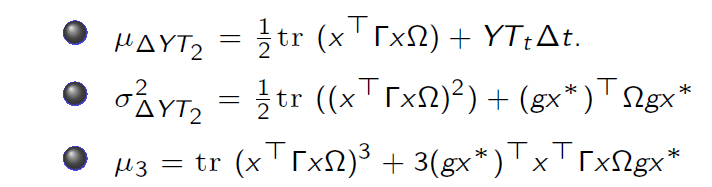

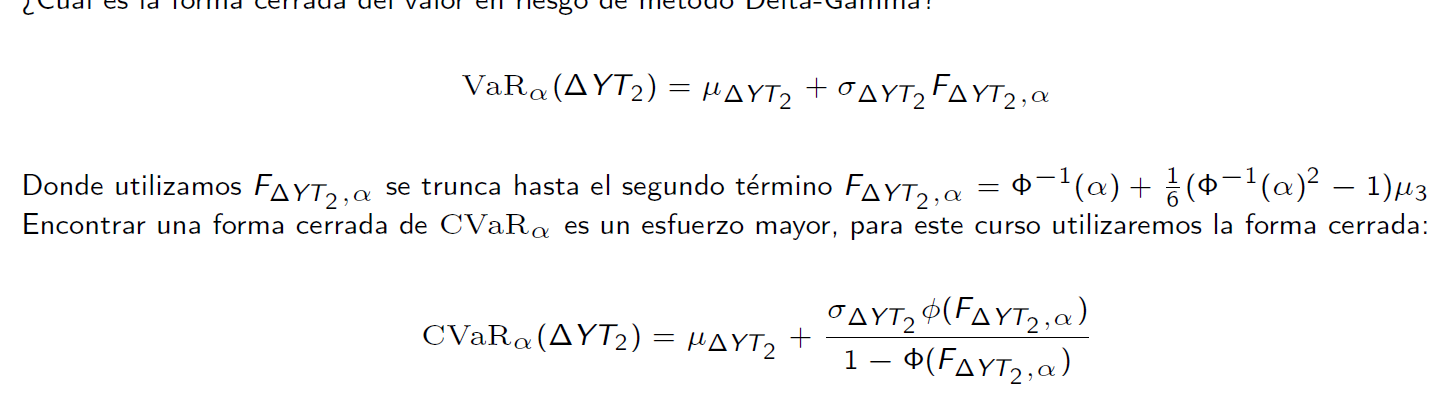

#### Riesgo a nivel contrato y nivel contrato-factor de riesgo

In [19]:
from scipy.stats import norm

start_index = int(sum(n_if[:4]))  # En Python, el indexado comienza desde 0
end_index = int(sum(n_if[:5]))

print(start_index)
print(end_index)

# Extrae las columnas correspondientes de DeltaX_port
DeltaX_ftdc = DeltaX_port[:, start_index:end_index]

# Obtiene el número de columnas de plazos_fwd_ind

m_ftdc = len(plazos_fwd)
m = len(plazos_fwd)

# Create zero matrices for VaR, CVaR

VaRmargc_ftdcDN = np.zeros((1, m))# Para delta normal
VaRmargc_ftdc = np.zeros((1, m))
VaRmargcstd_ftdc = np.zeros((1, m))
VaRmargcCF_ftdc = np.zeros((1, m))
CVaRmargc_ftdc = np.zeros((1, m))
CVaRmargcCF_ftdc = np.zeros((1, m))
CVaRmargc_ftdcDN = np.zeros((1, m))# Para delta normal

# Create zero matrices for VaR, CVaR for each risk factor

VaRmargc_fr_ftdcDN = np.zeros((3, m)) # Para delta normal
VaRmargc_fr_ftdc = np.zeros((3, m))
VaRmargcstd_fr_ftdc = np.zeros((3, m))
VaRmargcCF_fr_ftdc = np.zeros((3, m))
CVaRmargc_fr_ftdc = np.zeros((3, m))
CVaRmargcCF_fr_ftdc = np.zeros((3, m))
CVaRmargc_fr_ftdcDN= np.zeros((3, m)) # Para delta normal

# Create a diagonal matrix WFR
WFR = np.diag([1, 1, 1])


for i in range(m):
    delta_ftdc = g_ftdc[i::m] #Codigo exclusivo para delta normal
    tdelta_ftdc = g_ftdc[i::m] * xp_ftdc[i::m] #este tambien
    gamma_ftdc = mgamma_futTC(plazos_fwd[i], X1_fwtdc[0, i], X2_fwtdc[0, i], X3_ftdc[0], kst_fwd[i], contratos_fwd[i], nominal_fwd)
    tgamma_ftdc =np.outer(xp_ftdc[i::m],xp_ftdc[i::m]) * gamma_ftdc
    Varmargcaux_ftdc = np.cov(DeltaX_ftdc[:, i::m].T) * (n / (n - 1))# esta sirve delta normal
    # print(tgamma_ftdc)
    # print(Varmargcaux_ftdc)
    # print(tdelta_ftdc)
    # print(m)
    tgammavar_ftdc = tgamma_ftdc@Varmargcaux_ftdc
    # print(tgammavar_ftdc)
    tgammavar2_ftdc = (tgamma_ftdc @ Varmargcaux_ftdc) @ (tgamma_ftdc @ Varmargcaux_ftdc)
    # Primer momento de la Delta gamma
    mudg_ftdc = 0 if (np.trace(tgammavar_ftdc) / 2 + mu_ftdc[i]) > 0 else (np.trace(tgammavar_ftdc) / 2 + mu_ftdc[i])
    desv_ftdc = np.sqrt(np.trace(tgammavar2_ftdc) / 2 + tdelta_ftdc @ Varmargcaux_ftdc @ tdelta_ftdc.T)
    print(mudg_ftdc)
    print(desv_ftdc)

     # Para Delta normal quitarle la parte que corresponde a la delta gamma
    mudg_ftdcDN = 0 if (mu_ftdc[i]) > 0 else (mu_ftdc[i])
    desv_ftdcDN = np.sqrt(tdelta_ftdc @ Varmargcaux_ftdc @ tdelta_ftdc.T)

    VaRmargc_ftdc[0, i] = mudg_ftdc + desv_ftdc * norm.ppf(1 - alpha)
    CVaRmargc_ftdc[0, i] = -mudg_ftdc - desv_ftdc * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))
    #VAres para Delta normal
    VaRmargc_ftdcDN[0, i] = mudg_ftdcDN + desv_ftdcDN * norm.ppf(1 - alpha)
    CVaRmargc_ftdcDN[0, i] = -mudg_ftdcDN - desv_ftdcDN * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))

    # Calculo del tercer momento y coeficiente de asimetría
    tgammavar3_ftdc = tgammavar2_ftdc @ (tgamma_ftdc @ Varmargcaux_ftdc)
    asimPmargc_ftdc = np.sum(np.diag(tgammavar3_ftdc)) + 3 * (tdelta_ftdc @ Varmargcaux_ftdc @ tgamma_ftdc @ Varmargcaux_ftdc @ tdelta_ftdc.T)
    asimPmargc_ftdc = asimPmargc_ftdc / (desv_ftdc ** 3)

    # Cálculo del VaR y CVaR estandarizado y Cornish-Fisher
    VaRmargcstd_ftdc[0,i] = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimPmargc_ftdc
    VaRmargcCF_ftdc[0,i] = mudg_ftdc + desv_ftdc * VaRmargcstd_ftdc[0,i]
    CVaRmargcCF_ftdc[0,i] = -mudg_ftdc - desv_ftdc * (norm.pdf(VaRmargcstd_ftdc[0,i]) / norm.cdf(VaRmargcstd_ftdc[0,i]))

    for j in range(3):
      WFRM = np.zeros((3, 3))  # PASO CLAVE
      WFRM[j, j] = 1  # PASO CLAVE
      delta_ftdc = g_ftdc[i::m].T * WFR[j]  # PASO CLAVE
      tdelta_ftdc = g_ftdc[i::m].T * xp_ftdc[i::m] * WFR[j]  # delta tilde, PASO CLAVE
      gamma_ftdc = mgamma_futTC(plazos_fwd[i], X1_fwtdc[0, i], X2_fwtdc[0, i], X3_ftdc[0], kst_fwd[i], contratos_fwd[i], nominal_fwd) * WFRM  # paso clave

      tgamma_ftdc = np.outer(xp_ftdc[i::m], xp_ftdc[i::m]) * gamma_ftdc  # gamma tilde
      Varmargcaux_ftdc = np.cov(DeltaX_ftdc[:, i::m].T) * (n / (n - 1))  # matriz varcov factores de riesgo de cada contrato
      tgammavar_ftdc = tgamma_ftdc @ Varmargcaux_ftdc
      tgammavar2_ftdc = (tgamma_ftdc @ Varmargcaux_ftdc) @ (tgamma_ftdc @ Varmargcaux_ftdc)

      mudg_ftdc = 0
      desv_ftdc = np.sqrt(np.sum(np.diag(tgammavar2_ftdc)) / 2 + (tdelta_ftdc @ Varmargcaux_ftdc) @ tdelta_ftdc.T)
      # desviacion por factor de riesgo para delta normal
      desv_ftdcDN = np.sqrt((tdelta_ftdc @ Varmargcaux_ftdc) @ tdelta_ftdc.T)

      VaRmargc_fr_ftdc[j, i] = mudg_ftdc + desv_ftdc * norm.ppf(1 - alpha)
      CVaRmargc_fr_ftdc[j, i] = -mudg_ftdc - desv_ftdc * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))
      # Vares por factor de riesgo para delta normal
      VaRmargc_fr_ftdcDN[j, i] = mudg_ftdc + desv_ftdcDN * norm.ppf(1 - alpha)
      CVaRmargc_fr_ftdcDN[j, i] = -mudg_ftdc - desv_ftdcDN * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))


      tgammavar3_ftdc = tgammavar2_ftdc @ (tgamma_ftdc @ Varmargcaux_ftdc)
      asimPmargc_ftdc = np.sum(np.diag(tgammavar3_ftdc)) + 3 * ((tdelta_ftdc @ Varmargcaux_ftdc) @ (tgamma_ftdc @ Varmargcaux_ftdc)) @ tdelta_ftdc.T
      asimPmargc_ftdc = asimPmargc_ftdc / (desv_ftdc ** 3)

      VaRmargcstd_fr_ftdc[j, i] = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimPmargc_ftdc
      VaRmargcCF_fr_ftdc[j, i] = mudg_ftdc + desv_ftdc * VaRmargcstd_fr_ftdc[j, i]
      CVaRmargcCF_fr_ftdc[j, i] = -mudg_ftdc - desv_ftdc * (norm.pdf(VaRmargcstd_fr_ftdc[j, i]) / norm.cdf(VaRmargcstd_fr_ftdc[j, i]))


print("Valor a nivel contrato:", V0_fwtdc)
print("VaR a nivel contrato:", VaRmargc_ftdc)
print("VaR a nivel contrato Delta Normal:", VaRmargc_ftdcDN)
print("VaR a nivel contrato CF:", VaRmargcCF_ftdc)
print("CVaR a nivel contrato:", CVaRmargc_ftdc)
print("CVaR a nivel contrato Delta Normal:", CVaRmargc_ftdcDN)
print("CVaR a nivel contrato CF:", CVaRmargcCF_ftdc)

print("\n")  # Añadir una línea en blanco para separar los grupos

print("VaR a nivel contrato:", VaRmargc_fr_ftdc)
print("VaR a nivel contrato Delta Normal:", VaRmargc_fr_ftdcDN)
print("VaR a nivel contrato CF:", VaRmargcCF_fr_ftdc)
print("CVaR a nivel contrato:", CVaRmargc_fr_ftdc)
print("CVaR a nivel contrato Delta Normal:", CVaRmargc_fr_ftdcDN)
print("CVaR a nivel contrato CF:", CVaRmargcCF_fr_ftdc)


491
497
0
53.2441548613214
-0.09355060311774725
20.337288205898428
Valor a nivel contrato: [-200.96  -13.14]
VaR a nivel contrato: [[-109.35  -41.86]]
VaR a nivel contrato Delta Normal: [[-109.35  -41.86]]
VaR a nivel contrato CF: [[-109.35  -41.86]]
CVaR a nivel contrato: [[-128.9   -49.14]]
CVaR a nivel contrato Delta Normal: [[-128.9   -49.14]]
CVaR a nivel contrato CF: [[-128.9   -49.14]]


VaR a nivel contrato: [[-109.2   -41.66]
 [  -6.73   -6.22]
 [ -10.74   -8.58]]
VaR a nivel contrato Delta Normal: [[-109.2   -41.66]
 [  -6.73   -6.22]
 [ -10.74   -8.58]]
VaR a nivel contrato CF: [[-109.2   -41.66]
 [  -6.72   -6.23]
 [ -10.74   -8.58]]
CVaR a nivel contrato: [[-128.72  -49.11]
 [  -7.93   -7.33]
 [ -12.66  -10.11]]
CVaR a nivel contrato Delta Normal: [[-128.72  -49.11]
 [  -7.93   -7.33]
 [ -12.66  -10.11]]
CVaR a nivel contrato CF: [[-128.72  -49.11]
 [  -7.93   -7.34]
 [ -12.66  -10.11]]


<ipython-input-19-dd47c7c8f7d5>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_index = int(sum(n_if[:4]))  # En Python, el indexado comienza desde 0
<ipython-input-19-dd47c7c8f7d5>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_index = int(sum(n_if[:5]))


#### Riesgo a nivel total y total factor de riesgo

In [20]:

#Riesgo total
# Calcula la matriz de covarianza ajustada
VarDeltaX_ftdc = np.cov(DeltaX_ftdc, rowvar=False) * (n / (n - 1))

# Cálculos con gamma y la matriz de covarianza
tgammavar_ftdc = gamma_ftdctT2 @ VarDeltaX_ftdc
tgammavar2_ftdc = tgammavar_ftdc @ tgammavar_ftdc

# Cálculo de mudg
mudg_ftdc = np.where((np.sum(np.diag(tgammavar_ftdc)) / 2 + np.sum(mu_ftdc)) > 0, 0, (np.sum(np.diag(tgammavar_ftdc)) / 2 + np.sum(mu_ftdc)))

# Cálculo de desv
desv_ftdc = np.sqrt(np.sum(np.diag(tgammavar2_ftdc)) / 2 + g_ftdctT @ VarDeltaX_ftdc @ g_ftdctT.T)

# Cálculo del VaR y CVaR con el método DGM
VaRT_ftdc_DGM = mudg_ftdc + desv_ftdc * norm.ppf(1 - alpha)
CVaRT_ftdc_DGM = -mudg_ftdc - desv_ftdc * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

### Cornish Fisher
# Cálculo del tercer momento
tgammavar3_ftdc = tgammavar2_ftdc @ tgammavar_ftdc
asimP_ftdc = np.sum(np.diag(tgammavar3_ftdc)) + 3 * (g_ftdctT @ VarDeltaX_ftdc @ gamma_ftdctT2 @ VarDeltaX_ftdc @ g_ftdctT.T)
asimP_ftdc = asimP_ftdc / (desv_ftdc ** 3)  # coeficiente de asimetría

# Cálculo del VaR y CVaR estandarizados (Cornish-Fisher)
VaRstd_ftdc = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimP_ftdc
VaRT_ftdc_DGM_CF = mudg_ftdc + desv_ftdc * VaRstd_ftdc  # VaR Cornish-Fisher
CVaRT_ftdc_DGM_CF = -mudg_ftdc - desv_ftdc * norm.pdf(VaRstd_ftdc) / norm.cdf(VaRstd_ftdc)  # CVa
# Imprimir los resultados
print("VaRT_ftdc_DGM:", VaRT_ftdc_DGM)
print("CVaRT_ftdc_DGM:", CVaRT_ftdc_DGM)
print("VaRT_ftdc_DGM_CF:", VaRT_ftdc_DGM_CF)
print("CVaRT_ftdc_DGM_CF:", CVaRT_ftdc_DGM_CF)

# Inicializar matrices para almacenar resultados adicionales
VaRT_fr_ftdc_DGM = np.zeros(3)
CVaRT_fr_ftdc_DGM = np.zeros(3)
VaRT_fr_ftdc_DGM_CF = np.zeros(3)
CVaRT_fr_ftdc_DGM_CF = np.zeros(3)

WFRT = np.zeros((m*3, m * 3))

for j in range(3):  # 0, 1, 2 en Python
    WFRT[j::3, j::3] = np.ones((m,m))  # PASO CLAVE

    gamma_ftdctT2_fr = gamma_ftdctT2 * WFRT  # evaluación de gamma multiplicado por x^2
    g_ftdctT_fr = g_ftdctT * WFRT[j, :]

    tgammavar_ftdc = gamma_ftdctT2_fr @ VarDeltaX_ftdc
    tgammavar2_ftdc = tgammavar_ftdc @ tgammavar_ftdc

    # mudg_ftdc = 0
    desv_ftdc = np.sqrt(np.sum(np.diag(tgammavar2_ftdc)) / 2 + g_ftdctT_fr @ VarDeltaX_ftdc @ g_ftdctT_fr.T)

    VaRT_fr_ftdc_DGM[j] = mudg_ftdc + desv_ftdc * norm.ppf(1 - alpha)  # VaR Normal
    CVaRT_fr_ftdc_DGM[j] = -mudg_ftdc - desv_ftdc * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

    # VaR Cornish Fisher
    tgammavar3_ftdc = tgammavar2_ftdc @ tgammavar_ftdc
    asimP_ftdc = np.sum(np.diag(tgammavar3_ftdc)) + 3 * (g_ftdctT_fr @ VarDeltaX_ftdc @ gamma_ftdctT2_fr @ VarDeltaX_ftdc @ g_ftdctT_fr.T)
    asimP_ftdc = asimP_ftdc / (desv_ftdc ** 3)  # coeficiente de asimetría

    VaRstd_ftdc = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimP_ftdc
    VaRT_fr_ftdc_DGM_CF[j] = mudg_ftdc + desv_ftdc * VaRstd_ftdc  # VaR Cornish-Fisher
    CVaRT_fr_ftdc_DGM_CF[j] = -mudg_ftdc - desv_ftdc * norm.pdf(VaRstd_ftdc) / norm.cdf(VaRstd_ftdc)

# Imprimir los resultados
print("VaRT_fr_ftdc_DGM:", VaRT_fr_ftdc_DGM)
print("CVaRT_fr_ftdc_DGM:", CVaRT_fr_ftdc_DGM)
print("VaRT_fr_ftdc_DGM_CF:", VaRT_fr_ftdc_DGM_CF)
print("CVaRT_fr_ftdc_DGM_CF:", CVaRT_fr_ftdc_DGM_CF)




VaRT_ftdc_DGM: -67.6040364025803
CVaRT_ftdc_DGM: -79.6899125224555
VaRT_ftdc_DGM_CF: -67.604762856825
CVaRT_ftdc_DGM_CF: -79.6905582354128
VaRT_fr_ftdc_DGM: [-109.48  -42.81  -15.06]
CVaRT_fr_ftdc_DGM: [-129.05  -50.46  -17.76]
VaRT_fr_ftdc_DGM_CF: [-109.48  -42.81  -15.07]
CVaRT_fr_ftdc_DGM_CF: [-129.05  -50.46  -17.76]


In [41]:
# g_ftdctT
WFRT[0, :]
# @ VarDeltaX_ftdc @ g_ftdctT_fr.T

array([1., 0., 0., 1., 0., 0.])

array([[0., 0.]])

## Riesgo de Forwards Acciones

###Riesgo a nivel contrato y nivel contrato-factor de riesgo

In [ ]:
%%R

DeltaX_find=DeltaX_port[,(sum(n_if[1:5],1)):(sum(n_if[1:6]))]
m=ncol(plazos_fwd_ind)
m_find=ncol(plazos_fwd_ind)
VaRmargc_find=matrix(0,1,m) #Var por contrato Delta Normal
VaRmargcstd_find=matrix(0,1,m) #Var por contrato estandarizado
VaRmargcCF_find=matrix(0,1,m) #Var por contrato Cornish-Fisher
CVaRmargc_find=matrix(0,1,m) #CVar por contrato estandarizado
CVaRmargcCF_find=matrix(0,1,m) #CVar por contrato estandarizado

##factores riesgo
#Spot
VaRmargc_fr_find=matrix(0,3,m) #Var por contrato Delta Normal
VaRmargcstd_fr_find=matrix(0,3,m) #Var por contrato estandarizado
VaRmargcCF_fr_find=matrix(0,3,m) #Var por contrato Cornish-Fisher
CVaRmargc_fr_find=matrix(0,3,m) #CVar por contrato estandarizado
CVaRmargcCF_fr_find=matrix(0,3,m) #CVar por contrato estandarizado
WFR=diagv(c(1,1,1))


for (i in 1:(m))
{
  delta_find=t(g_find[seq(i,m*3,by=m)])
  tdelta_find=t(g_find[seq(i,m*3,by=m)])*xp_find[seq(i,m*3,by=m)]   #delta tilde
  gamma_find=mgamma_futTC(plazos_fwd_ind[i],X1_fwind[1,i],X2_fwind[1,i],X3_find[1,],kst_fwd_ind[i],contratos_fwd_ind[i],nominal_fwd_ind)  #paso clave
  tgamma_find=xp_find[seq(i,m*3,by=m)]%*%t(xp_find[seq(i,m*3,by=m)])*gamma_find #gamma tilde
  Varmargcaux_find=cov(DeltaX_find[,seq(i,m*3,by=m)])*((n)/(n-1)) #matriz varcov factores de riesgo de cada contrato
  tgammavar_find=(tgamma_find%*%Varmargcaux_find)
  tgammavar2_find=(tgamma_find%*%Varmargcaux_find)%*%(tgamma_find%*%Varmargcaux_find)
  mudg_find=ifelse((sum(diag(tgammavar_find))/2+mu_find[i])>0,0,(sum(diag(tgammavar_find))/2+mu_find[i]))
  #mudg_find=0
  desv_find=sqrt(sum(diag(tgammavar2_find))/2+tdelta_find%*%Varmargcaux_find%*%t(tdelta_find))

  VaRmargc_find[i]=mudg_find+desv_find*qnorm(1-alpha) #VaR Normal por contrato
  CVaRmargc_find[i]=-mudg_find-desv_find*(dnorm(qnorm(1-alpha))/(1-alpha))

  tgammavar3_find=tgammavar2_find%*%(tgamma_find%*%Varmargcaux_find)
  asimPmargc_find=sum(diag(tgammavar3_find))+3*tdelta_find%*%Varmargcaux_find%*%tgamma_find%*%Varmargcaux_find%*%t(tdelta_find) #tercer momento
  asimPmargc_find=asimPmargc_find/(desv_find)^3  #coef de asimetría
  VaRmargcstd_find[i]=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_find  #VaR estandarizado
  VaRmargcCF_find[i]=mudg_find+desv_find*VaRmargcstd_find[i] 	    #VaR Cornish-Fisher
  CVaRmargcCF_find[i]=-mudg_find-desv_find*(dnorm(VaRmargcstd_find[i])/(pnorm(VaRmargcstd_find[i])))

#Por factor de riesgo y por contrato

  for (j in 1:3)
  {
    WFRM=matrix(0,3,3)  #PASO CLAVE
    WFRM[j,j]=1  #PASO CLAVE
    delta_find=t(g_find[seq(i,m*3,by=m)])*WFR[j,] #PASO CLAVE
    tdelta_find=t(g_find[seq(i,m*3,by=m)])*xp_find[seq(i,m*3,by=m)]*WFR[j,]   #delta tilde #PASO CLAVE
  	gamma_find=mgamma_futTC(plazos_fwd_ind[i],X1_fwind[1,i],X2_fwind[1,i],X3_find[1,],kst_fwd_ind[i],contratos_fwd_ind[i],nominal_fwd_ind)  #paso clave
    tgamma_find=xp_find[seq(i,m*3,by=m)]%*%t(xp_find[seq(i,m*3,by=m)])*gamma_find #gamma tilde
    Varmargcaux_find=cov(DeltaX_find[,seq(i,m*3,by=m)])*((n)/(n-1)) #matriz varcov factores de riesgo de cada contrato
    tgammavar_find=(tgamma_find%*%Varmargcaux_find)
    tgammavar2_find=(tgamma_find%*%Varmargcaux_find)%*%(tgamma_find%*%Varmargcaux_find)
    #mudg_find=sum(diag(tgammavar_find))/2+mu_find[i]
   mudg_find=0
    desv_find=sqrt(sum(diag(tgammavar2_find))/2+tdelta_find%*%Varmargcaux_find%*%t(tdelta_find))

    VaRmargc_fr_find[j,i]=mudg_find+desv_find*qnorm(1-alpha) #VaR Normal por contrato
    CVaRmargc_fr_find[j,i]=-mudg_find-desv_find*(dnorm(qnorm(1-alpha))/(1-alpha))

    tgammavar3_find=tgammavar2_find%*%(tgamma_find%*%Varmargcaux_find)
    asimPmargc_find=sum(diag(tgammavar3_find))+3*tdelta_find%*%Varmargcaux_find%*%tgamma_find%*%Varmargcaux_find%*%t(tdelta_find) #tercer momento
    asimPmargc_find=asimPmargc_find/(desv_find)^3  #coef de asimetría
    VaRmargcstd_fr_find[j,i]=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_find  #VaR estandarizado
    VaRmargcCF_fr_find[j,i]=mudg_find+desv_find*VaRmargcstd_fr_find[j,i] 	    #VaR Cornish-Fisher
    CVaRmargcCF_fr_find[j,i]=-mudg_find-desv_find*(dnorm(VaRmargcstd_fr_find[j,i])/(pnorm(VaRmargcstd_fr_find[j,i])))
  }



}


print("Valor a nivel contrato")
print(V0_fwind)
print("VaR a nivel contrato")
print(VaRmargc_find)
print("VaR a nivel contrato CF")
print(VaRmargcCF_find)
print("CVaR a nivel contrato")
print(CVaRmargc_find)
print("CVaR a nivel contrato CF")
print(CVaRmargcCF_find)


print("VaR a nivel contrato")
print(VaRmargc_fr_find)
print("VaR a nivel contrato CF")
print(VaRmargcCF_fr_find)
print("CVaR a nivel contrato")
print(CVaRmargc_fr_find)
print("CVaR a nivel contrato CF")
print(CVaRmargcCF_fr_find)


[1] "Valor a nivel contrato"
          [,1]      [,2]
[1,] -6729.696 -2305.811
[1] "VaR a nivel contrato"
          [,1]      [,2]
[1,] -778.2141 -777.7958
[1] "VaR a nivel contrato CF"
          [,1]      [,2]
[1,] -778.2141 -777.7959
[1] "CVaR a nivel contrato"
          [,1]      [,2]
[1,] -917.3389 -916.8459
[1] "CVaR a nivel contrato CF"
          [,1]      [,2]
[1,] -917.3389 -916.8459
[1] "VaR a nivel contrato"
              [,1]          [,2]
[1,] -7.791456e+02 -7.791456e+02
[2,] -8.837672e-03 -4.288446e-03
[3,] -6.636162e+01 -7.170356e+01
[1] "VaR a nivel contrato CF"
              [,1]          [,2]
[1,] -779.14562612 -7.791456e+02
[2,]   -0.01536529 -7.455948e-03
[3,]  -66.37141094 -7.170832e+01
[1] "CVaR a nivel contrato"
              [,1]          [,2]
[1,] -918.43693944 -9.184369e+02
[2,]   -0.01041762 -5.055111e-03
[3,]  -78.22538320 -8.452233e+01
[1] "CVaR a nivel contrato CF"
              [,1]          [,2]
[1,] -918.43696733 -9.184370e+02
[2,]   -0.01643001 -7.97259

### Riesgo a nivel total y total factor de riesgo

In [ ]:
%%R


#RIESGO TOTAL FORWARDS DE TIPO DE CAMBIO

VarDeltaX_find=cov(DeltaX_find)*(n/(n-1))

tgammavar_find=(gamma_findtT2%*%VarDeltaX_find)
tgammavar2_find=(tgammavar_find)%*%(tgammavar_find)
#media
mudg_find=ifelse((sum(diag(tgammavar_find))/2+sum(mu_find))>0,0,(sum(diag(tgammavar_find))/2+mu_find[i]))
#desviación estándar
desv_find=sqrt(sum(diag(tgammavar2_find))/2+g_findtT%*%VarDeltaX_find%*%t(g_findtT))



### Val Python

#### Riesgo a nivel contrato y nivel contrato-factor de riesgo

In [47]:

start_index = int(sum(n_if[:5]))  # En Python, el indexado comienza desde 0
end_index = int(sum(n_if[:6]))

print(start_index)
print(end_index)

# Extrae las columnas correspondientes de DeltaX_port
DeltaX_find = DeltaX_port[:, start_index:end_index]

# Obtiene el número de columnas de plazos_fwd_ind

m_find = len(plazos_fwd_ind)
m = len(plazos_fwd_ind)

# Create zero matrices for VaR, CVaR

VaRmargc_findDN = np.zeros((1, m))# Para delta normal
VaRmargc_find = np.zeros((1, m))
VaRmargcstd_find = np.zeros((1, m))
VaRmargcCF_find = np.zeros((1, m))
CVaRmargc_find = np.zeros((1, m))
CVaRmargcCF_find = np.zeros((1, m))
CVaRmargc_findDN = np.zeros((1, m))# Para delta normal

# Create zero matrices for VaR, CVaR for each risk factor

VaRmargc_fr_findDN = np.zeros((3, m)) # Para delta normal
VaRmargc_fr_find = np.zeros((3, m))
VaRmargcstd_fr_find = np.zeros((3, m))
VaRmargcCF_fr_find = np.zeros((3, m))
CVaRmargc_fr_find = np.zeros((3, m))
CVaRmargcCF_fr_find = np.zeros((3, m))
CVaRmargc_fr_findDN= np.zeros((3, m)) # Para delta normal

# Create a diagonal matrix WFR
WFR = np.diag([1, 1, 1])


for i in range(m):
    delta_find = g_find[i::m] #Codigo exclusivo para delta normal
    tdelta_find = g_find[i::m] * xp_find[i::m] #este tambien
    gamma_find = mgamma_futTC(plazos_fwd_ind[i], X1_fwind[0, i], X2_fwind[0, i], X3_find[0], kst_fwd_ind[i], contratos_fwd_ind[i], nominal_fwd)
    tgamma_find =np.outer(xp_find[i::m],xp_find[i::m]) * gamma_find
    Varmargcaux_find = np.cov(DeltaX_find[:, i::m].T) * (n / (n - 1))# esta sirve delta normal
    # print(tgamma_find)
    # print(Varmargcaux_find)
    # print(tdelta_find)
    # print(m)
    tgammavar_find = tgamma_find@Varmargcaux_find
    # print(tgammavar_find)
    tgammavar2_find = (tgamma_find @ Varmargcaux_find) @ (tgamma_find @ Varmargcaux_find)
    # Primer momento de la Delta gamma
    mudg_find = 0 if (np.trace(tgammavar_find) / 2 + mu_find[i]) > 0 else (np.trace(tgammavar_find) / 2 + mu_find[i])
    desv_find = np.sqrt(np.trace(tgammavar2_find) / 2 + tdelta_find @ Varmargcaux_find @ tdelta_find.T)
    print(mudg_find)
    print(desv_find)

     # Para Delta normal quitarle la parte que corresponde a la delta gamma
    mudg_findDN = 0 if (mu_find[i]) > 0 else (mu_find[i])
    desv_findDN = np.sqrt(tdelta_find @ Varmargcaux_find @ tdelta_find.T)

    VaRmargc_find[0, i] = mudg_find + desv_find * norm.ppf(1 - alpha)
    CVaRmargc_find[0, i] = -mudg_find - desv_find * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))
    #VAres para Delta normal
    VaRmargc_findDN[0, i] = mudg_findDN + desv_findDN * norm.ppf(1 - alpha)
    CVaRmargc_findDN[0, i] = -mudg_findDN - desv_findDN * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))

    # Calculo del tercer momento y coeficiente de asimetría
    tgammavar3_find = tgammavar2_find @ (tgamma_find @ Varmargcaux_find)
    asimPmargc_find = np.sum(np.diag(tgammavar3_find)) + 3 * (tdelta_find @ Varmargcaux_find @ tgamma_find @ Varmargcaux_find @ tdelta_find.T)
    asimPmargc_find = asimPmargc_find / (desv_find ** 3)

    # Cálculo del VaR y CVaR estandarizado y Cornish-Fisher
    VaRmargcstd_find[0,i] = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimPmargc_find
    VaRmargcCF_find[0,i] = mudg_find + desv_find * VaRmargcstd_find[0,i]
    CVaRmargcCF_find[0,i] = -mudg_find - desv_find * (norm.pdf(VaRmargcstd_find[0,i]) / norm.cdf(VaRmargcstd_find[0,i]))

    for j in range(3):
        WFRM = np.zeros((3, 3))
        WFRM[j, j] = 1
        delta_find = g_find[i::m].T * WFR[j]
        tdelta_find = g_find[i::m].T * xp_find[i::m] * WFR[j]
        gamma_find = mgamma_futTC(plazos_fwd_ind[i], X1_fwind[0, i], X2_fwind[0, i], X3_find[0], kst_fwd_ind[i], contratos_fwd_ind[i], nominal_fwd) * WFRM

        tgamma_find = np.outer(xp_find[i::m], xp_find[i::m]) * gamma_find
        Varmargcaux_find = np.cov(DeltaX_find[:, i::m].T) * (n / (n - 1))
        tgammavar_find = tgamma_find @ Varmargcaux_find

        tgammavar2_find = (tgamma_find @ Varmargcaux_find) @ (tgamma_find @ Varmargcaux_find)

        mudg_find = 0
        desv_find = np.sqrt(np.sum(np.diag(tgammavar2_find)) / 2 + (tdelta_find @ Varmargcaux_find) @ tdelta_find.T)
        # desviacion por factor de riesgo para delta normal
        desv_findDN = np.sqrt((tdelta_find @ Varmargcaux_find) @ tdelta_find.T)

        VaRmargc_fr_find[j, i] = mudg_find + desv_find * norm.ppf(1 - alpha)
        CVaRmargc_fr_find[j, i] = -mudg_find - desv_find * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))
        # Vares por factor de riesgo para delta normal
        VaRmargc_fr_findDN[j, i] = mudg_find + desv_findDN * norm.ppf(1 - alpha)
        CVaRmargc_fr_findDN[j, i] = -mudg_find - desv_findDN * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))

        tgammavar3_find = tgammavar2_find @ (tgamma_find @ Varmargcaux_find)
        asimPmargc_find = np.sum(np.diag(tgammavar3_find)) + 3 * ((tdelta_find @ Varmargcaux_find) @ (tgamma_find @ Varmargcaux_find)) @ tdelta_find.T
        asimPmargc_find = asimPmargc_find / (desv_find ** 3)

        VaRmargcstd_fr_find[j, i] = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimPmargc_find
        VaRmargcCF_fr_find[j, i] = mudg_find + desv_find * VaRmargcstd_fr_find[j, i]
        CVaRmargcCF_fr_find[j, i] = -mudg_find - desv_find * (norm.pdf(VaRmargcstd_fr_find[j, i]) / norm.cdf(VaRmargcstd_fr_find[j, i]))

print("Valor a nivel contrato:", V0_fwind)
print("VaR a nivel contrato:", VaRmargc_find)
print("VaR a nivel contrato Delta Normal:", VaRmargc_findDN)
print("VaR a nivel contrato CF:", VaRmargcCF_find)
print("CVaR a nivel contrato:", CVaRmargc_find)
print("CVaR a nivel contrato Delta Normal:", CVaRmargc_findDN)

print("\n")  # Añadir una línea en blanco para separar los grupos

print("VaR a nivel contrato:", VaRmargc_fr_find)
print("VaR a nivel contrato Delta Normal:", VaRmargc_fr_findDN)
print("VaR a nivel contrato CF:", VaRmargcCF_fr_find)
print("CVaR a nivel contrato:", CVaRmargc_fr_find)
print("CVaR a nivel contrato Delta Normal:", CVaRmargc_fr_findDN)
print("CVaR a nivel contrato CF:", CVaRmargcCF_fr_find)

497
503
0
384.0583637543315
0
383.87917248779985
Valor a nivel contrato: [-6729.7  -2305.81]
VaR a nivel contrato: [[-788.76 -788.39]]
VaR a nivel contrato Delta Normal: [[-788.76 -788.39]]
VaR a nivel contrato CF: [[-788.76 -788.39]]
CVaR a nivel contrato: [[-929.77 -929.34]]
CVaR a nivel contrato Delta Normal: [[-929.77 -929.34]]


VaR a nivel contrato: [[-788.6  -788.6 ]
 [   0.      0.  ]
 [ -64.46  -69.69]]
VaR a nivel contrato Delta Normal: [[-788.6  -788.6 ]
 [   0.      0.  ]
 [ -64.46  -69.69]]
VaR a nivel contrato CF: [[-788.6  -788.6 ]
 [    nan     nan]
 [ -64.47  -69.7 ]]
CVaR a nivel contrato: [[-929.58 -929.58]
 [   0.      0.  ]
 [ -75.98  -82.15]]
CVaR a nivel contrato Delta Normal: [[-929.58 -929.58]
 [   0.      0.  ]
 [ -75.98  -82.15]]
CVaR a nivel contrato CF: [[-929.58 -929.58]
 [    nan     nan]
 [ -75.99  -82.16]]


<ipython-input-47-15fc19f7f0c4>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_index = int(sum(n_if[:5]))  # En Python, el indexado comienza desde 0
<ipython-input-47-15fc19f7f0c4>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_index = int(sum(n_if[:6]))
<ipython-input-47-15fc19f7f0c4>:104: RuntimeWarning: invalid value encountered in scalar divide
  asimPmargc_find = asimPmargc_find / (desv_find ** 3)


#### Riesgo a nivel total y total factor de riesgo

In [32]:
#Riesgo total
# Calcula la matriz de covarianza ajustada
VarDeltaX_find = np.cov(DeltaX_find, rowvar=False) * (n / (n - 1))

# Cálculos con gamma y la matriz de covarianza
tgammavar_find = gamma_findtT2 @ VarDeltaX_find
tgammavar2_find = tgammavar_find @ tgammavar_find

# Cálculo de mudg
mudg_find = np.where((np.sum(np.diag(tgammavar_find)) / 2 + np.sum(mu_find)) > 0, 0, (np.sum(np.diag(tgammavar_find)) / 2 + np.sum(mu_find)))

# Cálculo de desv
desv_find = np.sqrt(np.sum(np.diag(tgammavar2_find)) / 2 + g_findtT @ VarDeltaX_find @ g_findtT.T)

# Cálculo del VaR y CVaR con el método DGM
VaRT_find_DGM = mudg_find + desv_find * norm.ppf(1 - alpha)
CVaRT_find_DGM = -mudg_find - desv_find * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

### Cornish Fisher
# Cálculo del tercer momento
tgammavar3_find = tgammavar2_find @ tgammavar_find
asimP_find = np.sum(np.diag(tgammavar3_find)) + 3 * (g_findtT @ VarDeltaX_find @ gamma_findtT2 @ VarDeltaX_find @ g_findtT.T)
asimP_find = asimP_find / (desv_find ** 3)  # coeficiente de asimetría

# Cálculo del VaR y CVaR estandarizados (Cornish-Fisher)
VaRstd_find = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimP_find
VaRT_find_DGM_CF = mudg_find + desv_find * VaRstd_find  # VaR Cornish-Fisher
CVaRT_find_DGM_CF = -mudg_find - desv_find * norm.pdf(VaRstd_find) / norm.cdf(VaRstd_find)  # CVaR Cornish-Fisher

# Imprimir los resultados
print("VaRT_find_DGM:", VaRT_find_DGM)
print("CVaRT_find_DGM:", CVaRT_find_DGM)
print("VaRT_find_DGM_CF:", VaRT_find_DGM_CF)
print("CVaRT_find_DGM_CF:", CVaRT_find_DGM_CF)

# Inicializar matrices para almacenar resultados adicionales
VaRT_fr_find_DGM = np.zeros(3)
CVaRT_fr_find_DGM = np.zeros(3)
VaRT_fr_find_DGM_CF = np.zeros(3)
CVaRT_fr_find_DGM_CF = np.zeros(3)

WFRT = np.zeros((3*m, m * 3))



for j in range(3):  # 0, 1, 2 en Python
    WFRT[j::3, j::3] = np.ones((m, m))  # PASO CLAVE

    gamma_findtT2_fr = gamma_findtT2 @ WFRT  # evaluación de gamma multiplicado por x^2
    g_findtT_fr = g_findtT @ WFRT[j, :]

    tgammavar_find = gamma_findtT2_fr * VarDeltaX_find
    tgammavar2_find = tgammavar_find * tgammavar_find

    mudg_find = 0
    desv_find = np.sqrt(np.sum(np.diag(tgammavar2_find)) / 2 + g_findtT_fr @ VarDeltaX_find @ g_findtT_fr.T)

    VaRT_fr_find_DGM[j] = mudg_find + desv_find * norm.ppf(1 - alpha)  # VaR Normal
    CVaRT_fr_find_DGM[j] = -mudg_find - desv_find * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

    # VaR Cornish Fisher
    tgammavar3_find = tgammavar2_find @ tgammavar_find
    asimP_find = np.sum(np.diag(tgammavar3_find)) + 3 * (g_findtT_fr @ VarDeltaX_find @ gamma_findtT2_fr @ VarDeltaX_find @ g_findtT_fr.T)
    asimP_find = asimP_find / (desv_find ** 3)  # coeficiente de asimetría

    VaRstd_find = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimP_find
    VaRT_fr_find_DGM_CF[j] = mudg_find + desv_find * VaRstd_find  # VaR Cornish-Fisher
    CVaRT_fr_find_DGM_CF[j] = -mudg_find - desv_find * norm.pdf(VaRstd_find) / norm.cdf(VaRstd_find)

NameError: name 'DeltaX_find' is not defined

## Riesgo de Swaps

### Riesgo a nivel contrato y contrato-factor de riesgo


In [ ]:

%%R

DeltaX_sw=DeltaX_port[,(sum(n_if[1:6],1)):(sum(n_if[1:7]))]
m=ncol(plazos_sw)
m_sw=ncol(plazos_sw)
VaRmargc_sw=matrix(0,1,m) #Var por contrato Delta Normal
VaRmargcstd_sw=matrix(0,1,m) #Var por contrato estandarizado
VaRmargcCF_sw=matrix(0,1,m) #Var por contrato Cornish-Fisher
CVaRmargc_sw=matrix(0,1,m) #CVar por contrato estandarizado
CVaRmargcCF_sw=matrix(0,1,m) #CVar por contrato estandarizado

##factores riesgo
#tasa cupón y tasa de valor presente
VaRmargc_fr_sw=matrix(0,2,m) #Var por contrato Delta Normal
VaRmargcstd_fr_sw=matrix(0,2,m) #Var por contrato estandarizado
VaRmargcCF_fr_sw=matrix(0,2,m) #Var por contrato Cornish-Fisher
CVaRmargc_fr_sw=matrix(0,2,m) #CVar por contrato estandarizado
CVaRmargcCF_fr_sw=matrix(0,2,m) #CVar por contrato estandarizado

WMC=matrix(0,m,sum(N)) #variable auxiliar para construir los dummys de flujos por contrato
Nsw=c(0,cumsum(N)) #variable auxiliar para construir los dummys de flujos por contrato


for (i in 1:(m))
{
  WMC[i,(Nsw[i]+1):Nsw[i+1]]=seq(1,1) #marginalización exclusiva por los flujos del swap i
  dummy_sw=c(WMC[i,],WMC[i,]) #marginalización exclusiva por los flujos del swap i (para las dos curvas)
  tdelta_sw=gt_sw*dummy_sw   #delta tilde
  tgamma_sw=dummy_sw%*%t(dummy_sw)*tgammat_sw #gamma tilde
  Varmargcaux_sw=cov(DeltaX_sw)*((n)/(n-1)) #matriz varcov factores de riesgo de cada contrato
  tgammavar_sw=(tgamma_sw%*%Varmargcaux_sw)
  tgammavar2_sw=(tgamma_sw%*%Varmargcaux_sw)%*%(tgamma_sw%*%Varmargcaux_sw)
  mudg_sw=ifelse((sum(diag(tgammavar_sw))/2+sum(mu_sw*WMC[i,]))>0,0,(sum(diag(tgammavar_sw))/2+sum(mu_sw*WMC[i,])))
  #mudg_sw=0
  desv_sw=sqrt(sum(diag(tgammavar2_sw))/2+tdelta_sw%*%Varmargcaux_sw%*%t(tdelta_sw))

  VaRmargc_sw[i]=mudg_sw+desv_sw*qnorm(1-alpha) #VaR Normal por contrato
  CVaRmargc_sw[i]=-mudg_sw-desv_sw*(dnorm(qnorm(1-alpha))/(1-alpha))

  tgammavar3_sw=tgammavar2_sw%*%(tgamma_sw%*%Varmargcaux_sw)
  asimPmargc_sw=sum(diag(tgammavar3_sw))+3*tdelta_sw%*%Varmargcaux_sw%*%tgamma_sw%*%Varmargcaux_sw%*%t(tdelta_sw) #tercer momento
  asimPmargc_sw=asimPmargc_sw/(desv_sw)^3  #coef de asimetría
  VaRmargcstd_sw[i]=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_sw  #VaR estandarizado
  VaRmargcCF_sw[i]=mudg_sw+desv_sw*VaRmargcstd_sw[i] 	    #VaR Cornish-Fisher
  CVaRmargcCF_sw[i]=-mudg_sw-desv_sw*(dnorm(VaRmargcstd_sw[i])/(pnorm(VaRmargcstd_sw[i])))

#Por factor de riesgo y por contrato

  for (j in 1:2)
  {
    WFRMdum=matrix(0,2,sum(N)*2)  #PASO CLAVE
    WFRMdum[1,1:(sum(N))]=1  #PASO CLAVE
    WFRMdum[2,(sum(N)+1):(sum(N)*2)]=1  #PASO CLAVE
    WFRM=WFRMdum
    tdelta_fr_sw=tdelta_sw*WFRM[j,]   #delta tilde #PASO CLAVE
    tgamma_fr_sw=tgammat_sw*WFRM[j,]%*%t(WFRM[j,]) #gamma tilde
    Varmargcaux_fr_sw=Varmargcaux_sw*WFRM[j,]%*%t(WFRM[j,]) #matriz varcov factores de riesgo de cada contrato
    tgammavar_sw=(tgamma_fr_sw%*%Varmargcaux_fr_sw)
    tgammavar2_sw=(tgamma_fr_sw%*%Varmargcaux_fr_sw)%*%(tgamma_fr_sw%*%Varmargcaux_fr_sw)
    #mudg_sw=sum(diag(tgammavar_sw))/2+mu_sw[i]
    mudg_sw=0
    desv_sw=sqrt(sum(diag(tgammavar2_sw))/2+tdelta_fr_sw%*%Varmargcaux_fr_sw%*%t(tdelta_sw))

    VaRmargc_fr_sw[j,i]=mudg_sw+desv_sw*qnorm(1-alpha) #VaR Normal por contrato
    CVaRmargc_fr_sw[j,i]=-mudg_sw-desv_sw*(dnorm(qnorm(1-alpha))/(1-alpha))

    tgammavar3_sw=tgammavar2_sw%*%(tgamma_fr_sw%*%Varmargcaux_fr_sw)
    asimPmargc_sw=sum(diag(tgammavar3_sw))+3*tdelta_fr_sw%*%Varmargcaux_fr_sw%*%tgamma_fr_sw%*%Varmargcaux_fr_sw%*%t(tdelta_fr_sw) #tercer momento
    asimPmargc_sw=asimPmargc_sw/(desv_sw)^3  #coef de asimetría
    VaRmargcstd_fr_sw[j,i]=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_sw  #VaR estandarizado
    VaRmargcCF_fr_sw[j,i]=mudg_sw+desv_sw*VaRmargcstd_fr_sw[j,i] 	    #VaR Cornish-Fisher
    CVaRmargcCF_fr_sw[j,i]=-mudg_sw-desv_sw*(dnorm(VaRmargcstd_fr_sw[j,i])/(pnorm(VaRmargcstd_fr_sw[j,i])))
  }



}


print("Valor a nivel contrato")
print(V0_sw)
print("VaR a nivel contrato")
print(VaRmargc_sw)
print("VaR a nivel contrato CF")
print(VaRmargcCF_sw)
print("CVaR a nivel contrato")
print(CVaRmargc_sw)
print("CVaR a nivel contrato CF")
print(CVaRmargcCF_sw)


print("VaR a nivel contrato")
print(VaRmargc_fr_sw)
print("VaR a nivel contrato CF")
print(VaRmargcCF_fr_sw)
print("CVaR a nivel contrato")
print(CVaRmargc_fr_sw)
print("CVaR a nivel contrato CF")
print(CVaRmargcCF_fr_sw)

[1] "Valor a nivel contrato"
       [,1]     [,2]
[1,] 6.0578 4.848224
[1] "VaR a nivel contrato"
          [,1]       [,2]
[1,] -2.625618 -0.9508836
[1] "VaR a nivel contrato CF"
          [,1]       [,2]
[1,] -2.625549 -0.9509279
[1] "CVaR a nivel contrato"
          [,1]      [,2]
[1,] -3.092222 -1.118481
[1] "CVaR a nivel contrato CF"
         [,1]      [,2]
[1,] -3.09216 -1.118521
[1] "VaR a nivel contrato"
            [,1]         [,2]
[1,] -2.62401075 -0.949967394
[2,] -0.01282438 -0.001977643
[1] "VaR a nivel contrato CF"
           [,1]         [,2]
[1,] -2.6240107 -0.949967394
[2,] -0.0128057 -0.001961108
[1] "CVaR a nivel contrato"
            [,1]         [,2]
[1,] -3.09311689 -1.119797317
[2,] -0.01511706 -0.002331195
[1] "CVaR a nivel contrato CF"
            [,1]         [,2]
[1,] -3.09311689 -1.119797317
[2,] -0.01510045 -0.002316506


### Riesgo a nivel total y total factor de riesgo

In [ ]:
%%R


#RIESGO TOTAL FORWARDS DE TIPO DE CAMBIO

VarDeltaX_sw=cov(DeltaX_sw)*(n/(n-1))

tgammavar_sw=(tgammat_sw%*%VarDeltaX_sw)
tgammavar2_sw=(tgammavar_sw)%*%(tgammavar_sw)
#media
mudg_sw=ifelse((sum(diag(tgammavar_sw))/2+sum(mu_sw))>0,0,(sum(diag(tgammavar_sw))/2+sum(mu_sw)))
#desviación estándar
desv_sw=sqrt(sum(diag(tgammavar2_sw))/2+gt_sw%*%VarDeltaX_sw%*%t(gt_sw))

VaRT_sw_DGM=(mudg_sw)+(desv_sw)*qnorm(1-alpha)  #VaR Normal
CVaRT_sw_DGM=-(mudg_sw)-(desv_sw)*dnorm(qnorm(alpha))/(1-alpha)


###VaR Cornish Fisher
tgammavar3_sw=tgammavar2_sw%*%(tgammavar_sw)
asimP_sw=sum(diag(tgammavar3_sw))+3*gt_sw%*%VarDeltaX_sw%*%tgammat_sw%*%VarDeltaX_sw%*%t(gt_sw) #gamma tercer momento
asimP_sw=asimP_sw/(desv_sw)^3  #coef de asimetría
VaRstd_sw=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimP_sw  #VaR estandarizado
VaRT_sw_DGM_CF=(mudg_sw)+(desv_sw)*VaRstd_sw #VaR cf
CVaRT_sw_DGM_CF=-(mudg_sw)-(desv_sw)*dnorm(VaRstd_sw)/(pnorm(VaRstd_sw))


print("Valor en riesgo a nivel Total DGM")
print(VaRT_sw_DGM)
print("Valor en riesgo Condicional a nivel Total DGM")
print(CVaRT_sw_DGM)
print("Valor en riesgo a nivel Total CF")
print(VaRT_sw_DGM_CF)
print("Valor en riesgo Condicional a nivel Total CF")
print(CVaRT_sw_DGM_CF)

VaRT_fr_sw_DGM=matrix(0,1,2)
CVaRT_fr_sw_DGM=matrix(0,1,2)
VaRT_fr_sw_DGM_CF=matrix(0,1,2)
CVaRT_fr_sw_DGM_CF=matrix(0,1,2)



#RIESGO TOTAL POR FACTOR DE RIESGO DE FORWARDS DE TIPO DE CAMBIO

for (j in (1:2))
{

    WFRMdum=matrix(0,2,sum(N)*2)  #PASO CLAVE
    WFRMdum[1,1:(sum(N))]=1  #PASO CLAVE
    WFRMdum[2,(sum(N)+1):(sum(N)*2)]=1  #PASO CLAVE
    WFRM=WFRMdum
gamma_swtT2_fr=tgammat_sw*WFRM[j,]%*%t(WFRM[j,]) #evaluación de gamma multiplicado por x^{2}
g_swtT_fr=gt_sw*WFRM[j,]
tgammavar_sw=(gamma_swtT2_fr%*%VarDeltaX_sw)
tgammavar2_sw=(tgammavar_sw)%*%(tgammavar_sw)
#mudg_sw=sum(diag(tgammavar_sw))/2+sum(mu_sw)
mudg_sw=0
desv_sw=sqrt(sum(diag(tgammavar2_sw))/2+g_swtT_fr%*%VarDeltaX_sw%*%t(g_swtT_fr))
VaRT_fr_sw_DGM[j]=(mudg_sw)+(desv_sw)*qnorm(1-alpha) #VaR Normal
CVaRT_fr_sw_DGM[j]=-(mudg_sw)-(desv_sw)*dnorm(qnorm(alpha))/(1-alpha)


###VaR Cornish Fisher
tgammavar3_sw=tgammavar2_sw%*%(tgammavar_sw)
asimP_sw=sum(diag(tgammavar3_sw))+3*g_swtT_fr%*%VarDeltaX_sw%*%gamma_swtT2_fr%*%VarDeltaX_sw%*%t(g_swtT_fr) #gamma tercer momento
asimP_sw=asimP_sw/(desv_sw)^3  #coef de asimetría

VaRstd_sw=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimP_sw  #VaR estandarizado
VaRT_fr_sw_DGM_CF[j]=(mudg_sw)+(desv_sw)*VaRstd_sw #VaR cf
CVaRT_fr_sw_DGM_CF[j]=-(mudg_sw)-(desv_sw)*dnorm(VaRstd_sw)/(pnorm(VaRstd_sw))

}

print("Valor en riesgo a nivel factor riesgo DGM")
print(VaRT_fr_sw_DGM)
print("Valor en riesgo condicional a nivel factor riesgo DGM")
print(CVaRT_fr_sw_DGM)
print("Valor en riesgo a nivel factor riesgo CF")
print(VaRT_fr_sw_DGM_CF)
print("Valor en riesgo condicional a nivel factor riesgo CF")
print(CVaRT_fr_sw_DGM_CF)
sum(V0_sw)


[1] "Valor en riesgo a nivel Total DGM"
          [,1]
[1,] -1.922804
[1] "Valor en riesgo Condicional a nivel Total DGM"
          [,1]
[1,] -2.261366
[1] "Valor en riesgo a nivel Total CF"
          [,1]
[1,] -1.922824
[1] "Valor en riesgo Condicional a nivel Total CF"
          [,1]
[1,] -2.261384
[1] "Valor en riesgo a nivel factor riesgo DGM"
          [,1]        [,2]
[1,] -1.920629 -0.01468783
[1] "Valor en riesgo condicional a nivel factor riesgo DGM"
          [,1]        [,2]
[1,] -2.263989 -0.01731364
[1] "Valor en riesgo a nivel factor riesgo CF"
          [,1]        [,2]
[1,] -1.920629 -0.01466916
[1] "Valor en riesgo condicional a nivel factor riesgo CF"
          [,1]        [,2]
[1,] -2.263989 -0.01729704
[1] 10.90602


### Val Python

#### Riesgo a nivel contrato y contrato - factor de riesgo

In [60]:
start_index = int(sum(n_if[:6]))  # En Python, el indexado comienza desde 0
end_index = int(sum(n_if[:7]))

print(start_index)
print(end_index)

# Extrae las columnas correspondientes de DeltaX_port
DeltaX_sw = DeltaX_port[:, start_index:end_index]

# Obtiene el número de columnas de plazos_SW

m_sw = len(plazos_sw)
m = len(plazos_sw)

# Create zero matrices for VaR, CVaR

VaRmargc_swDN = np.zeros((1, m))# Para delta normal
VaRmargc_sw = np.zeros((1, m))
VaRmargcstd_sw = np.zeros((1, m))
VaRmargcCF_sw = np.zeros((1, m))
CVaRmargc_sw = np.zeros((1, m))
CVaRmargcCF_sw = np.zeros((1, m))
CVaRmargc_swDN = np.zeros((1, m))# Para delta normal

# Create zero matrices for VaR, CVaR for each risk factor

VaRmargc_fr_swDN = np.zeros((2, m)) # Para delta normal
VaRmargc_fr_sw = np.zeros((2, m))
VaRmargcstd_fr_sw = np.zeros((2, m))
VaRmargcCF_fr_sw = np.zeros((2, m))
CVaRmargc_fr_sw = np.zeros((2, m))
CVaRmargcCF_fr_sw = np.zeros((2, m))
CVaRmargc_fr_swDN= np.zeros((2, m)) # Para delta normal

# apóyame a crear el código similar al de R para calcular el VaR y CVaR a nivel contrato y nivel contrato-factor de riesgo para SWAPS
# Recuerda que el código de R se encuentra en la celda anterior

WMC = np.zeros((m, np.sum(N)))  # variable auxiliar para construir los dummys de flujos por contrato
Nsw = np.concatenate(([0], np.cumsum(N)))  # variable auxiliar para construir los dummys de flujos por contrato

for i in range(m):
    WMC[i, Nsw[i]:Nsw[i + 1]] = 1  # marginalización exclusiva por los flujos del swap i
    dummy_sw = np.concatenate((WMC[i, :], WMC[i, :]))  # marginalización exclusiva por los flujos del swap i (para las dos curvas)
    tdelta_sw = gt_sw * dummy_sw  # delta tilde
    tgamma_sw = np.outer(dummy_sw, dummy_sw.T) @ tgammat_sw  # gamma tilde
    Varmargcaux_sw = np.cov(DeltaX_sw.T) * ((n) / (n - 1))  # matriz varcov factores de riesgo de cada contrato
    tgammavar_sw = (tgamma_sw @ Varmargcaux_sw)
    tgammavar2_sw = (tgamma_sw @ Varmargcaux_sw) @ (tgamma_sw @ Varmargcaux_sw)
    mudg_sw = 0 if (np.trace(tgammavar_sw) / 2 + np.sum(mu_sw * WMC[i, :])) > 0 else (np.trace(tgammavar_sw) / 2 + np.sum(mu_sw * WMC[i, :]))
    # mudg_sw=0
    desv_sw = np.sqrt(np.sum(np.diag(tgammavar2_sw)) / 2 + tdelta_sw @ Varmargcaux_sw @ tdelta_sw.T)

    VaRmargc_sw[0, i] = mudg_sw + desv_sw * norm.ppf(1 - alpha)  # VaR Normal por contrato
    CVaRmargc_sw[0, i] = -mudg_sw - desv_sw * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))

    tgammavar3_sw = tgammavar2_sw @ (tgamma_sw @ Varmargcaux_sw)
    asimPmargc_sw = np.sum(np.diag(tgammavar3_sw)) + 3 * (tdelta_sw @ Varmargcaux_sw @ tgamma_sw @ Varmargcaux_sw @ tdelta_sw.T)  # tercer momento
    asimPmargc_sw = asimPmargc_sw / (desv_sw) ** 3
    VaRmargcstd_sw[0, i] = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimPmargc_sw  # VaR estandarizado
    VaRmargcCF_sw[0, i] = mudg_sw + desv_sw * VaRmargcstd_sw[0, i]  # VaR Cornish-Fisher
    CVaRmargcCF_sw[0, i] = -mudg_sw - desv_sw * (norm.pdf(VaRmargcstd_sw[0, i]) / norm.cdf(VaRmargcstd_sw[0, i]))

    # Por factor de riesgo y por contrato

    for j in range(2):
        WFRMdum = np.zeros((2, np.sum(N) * 2))  # PASO CLAVE
        WFRMdum[0, 0:np.sum(N)] = 1  # PASO CLAVE
        WFRMdum[1, np.sum(N):np.sum(N) * 2] = 1  # PASO CLAVE
        WFRM = WFRMdum
        tdelta_fr_sw = tdelta_sw * WFRM[j, :]  # delta tilde #PASO CLAVE
        tgamma_fr_sw = tgammat_sw * np.outer(WFRM[j, :],WFRM[j, :])  # gamma tilde
        Varmargcaux_fr_sw = Varmargcaux_sw * np.outer(WFRM[j, :],WFRM[j, :])  # matriz varcov factores de riesgo de cada contrato
        tgammavar_sw = (tgamma_fr_sw @ Varmargcaux_fr_sw)
        tgammavar2_sw = (tgamma_fr_sw @ Varmargcaux_fr_sw) @ (tgamma_fr_sw @ Varmargcaux_fr_sw)
        # mudg_sw=sum(diag(tgammavar_sw))/2+mu_sw[i]
        mudg_sw = 0
        desv_sw = np.sqrt(np.sum(np.diag(tgammavar2_sw)) / 2 + tdelta_fr_sw @ Varmargcaux_fr_sw @ tdelta_sw)

        VaRmargc_fr_sw[j, i] = mudg_sw + desv_sw * norm.ppf(1 - alpha)  # VaR Normal por contrato
        CVaRmargc_fr_sw[j, i] = -mudg_sw - desv_sw * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))

        tgammavar3_sw = tgammavar2_sw @ (tgamma_fr_sw @ Varmargcaux_fr_sw)
        asimPmargc_sw = np.sum(np.diag(tgammavar3_sw)) + 3 * (tdelta_fr_sw @ Varmargcaux_fr_sw @ tgamma_fr_sw @ Varmargcaux_fr_sw @ tdelta_fr_sw)  # tercer momento
        asimPmargc_sw = asimPmargc_sw / (desv_sw) ** 3  # coef de asimetría
        VaRmargcstd_fr_sw[j, i] = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimPmargc_sw  # VaR estandarizado
        VaRmargcCF_fr_sw[j, i] = mudg_sw + desv_sw * VaRmargcstd_fr_sw[j, i]  # VaR Cornish-Fisher
        CVaRmargcCF_fr_sw[j, i] = -mudg_sw - desv_sw * (norm.pdf(VaRmargcstd_fr_sw[j, i]) / norm.cdf(VaRmargcstd_fr_sw[j, i]))

print("VaR a nivel contrato:", VaRmargc_sw)
print("VaR a nivel contrato CF:", VaRmargcCF_sw)
print("CVaR a nivel contrato:", CVaRmargc_sw)
print("CVaR a nivel contrato CF:", CVaRmargcCF_sw)

print("\n")  # Añadir una línea en blanco para separar los grupos

print("VaR a nivel contrato:", VaRmargc_fr_sw)
print("VaR a nivel contrato CF:", VaRmargcCF_fr_sw)
print("CVaR a nivel contrato:", CVaRmargc_fr_sw)
print("CVaR a nivel contrato CF:", CVaRmargcCF_fr_sw)


503
573
VaR a nivel contrato: [[-2.49 -0.92]]
VaR a nivel contrato CF: [[-2.46 -0.93]]
CVaR a nivel contrato: [[-2.93 -1.08]]
CVaR a nivel contrato CF: [[-2.91 -1.08]]


VaR a nivel contrato: [[-2.49e+00 -9.19e-01]
 [-1.29e-02 -1.99e-03]]
VaR a nivel contrato CF: [[-2.49e+00 -9.19e-01]
 [-1.29e-02 -1.97e-03]]
CVaR a nivel contrato: [[-2.93e+00 -1.08e+00]
 [-1.52e-02 -2.34e-03]]
CVaR a nivel contrato CF: [[-2.93e+00 -1.08e+00]
 [-1.52e-02 -2.33e-03]]


<ipython-input-60-33739c368328>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_index = int(sum(n_if[:6]))  # En Python, el indexado comienza desde 0
<ipython-input-60-33739c368328>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_index = int(sum(n_if[:7]))


In [59]:
np.outer(WFRM[j, :],WFRM[j, :]).shape
# .T @ WFRM[j, :]

(70, 70)

## Riesgo de Opciones de tasa de interés

### Val R

#### Riesgo a nivel contrato y nivel contrato-factor de riesgo

In [ ]:
%%R


#Cálculo de matriz de pérdidas y ganancias FUTUROS TDC

#Cálculo de VaR por contrato
#creación de matrices de VaR, gamma, VaRCF por contrato
DeltaX_oir=DeltaX_port[,(sum(n_if[1:7],1)):(sum(n_if[1:8]))]
m_oir=ncol(plazos_oir)
m=ncol(plazos_oir)

VaRmargc_oir=matrix(0,1,m) #Var por contrato Delta Normal
VaRmargcDN_oir=matrix(0,1,m) #Var por contrato Delta Normal
VaRmargcstd_oir=matrix(0,1,m) #Var por contrato estandarizado
VaRmargcCF_oir=matrix(0,1,m) #Var por contrato Cornish-Fisher
CVaRmargc_oir=matrix(0,1,m) #CVar por contrato estandarizado
CVaRmargcDN_oir=matrix(0,1,m) #Var por contrato Delta Normal
CVaRmargcCF_oir=matrix(0,1,m) #CVar por contrato estandarizado

##factores riesgo
#Spot
VaRmargcDN_fr_oir=matrix(0,3,m) #Var por contrato Delta Normal
VaRmargc_fr_oir=matrix(0,3,m) #Var por contrato Delta Normal
VaRmargcDN_fr_oir=matrix(0,3,m) #Var por contrato Delta Normal
VaRmargcstd_fr_oir=matrix(0,3,m) #Var por contrato estandarizado
VaRmargcCF_fr_oir=matrix(0,3,m) #Var por contrato Cornish-Fisher
CVaRmargcDN_fr_oir=matrix(0,3,m) #CVar por contrato estandarizado
CVaRmargc_fr_oir=matrix(0,3,m) #CVar por contrato estandarizado
CVaRmargcDN_fr_oir=matrix(0,3,m) #Var por contrato Delta Normal
CVaRmargcCF_fr_oir=matrix(0,3,m) #CVar por contrato estandarizado
WFR=diagv(c(1,1,1))
WFR=diagv(c(1,1,1))


for (i in 1:(m))
{
  delta_oir=t(delta_oir_T[seq(i,m*3,by=m)])
  tdelta_oir=t(delta_oir_T[seq(i,m*3,by=m)])*xp_oir[seq(i,m*3,by=m)]   #delta tilde
  gamma_oir=mgammaopc(x01[i],x02[i],K_oir[i],x03[i],plazos_oir[i],cp_oir[i],cs_oir,pr_oir,dct_oir,contratos_oir[i],nominal_oir)  #paso clave
  tgamma_oir=xp_oir[seq(i,m*3,by=m)]%*%t(xp_oir[seq(i,m*3,by=m)])*gamma_oir #gamma tilde
  Varmargcaux_oir=cov(DeltaX_oir[,seq(i,m*3,by=m)])*((n)/(n-1)) #matriz varcov factores de riesgo de cada contrato
  tgammavar_oir=(tgamma_oir%*%Varmargcaux_oir)
  tgammavar2_oir=(tgamma_oir%*%Varmargcaux_oir)%*%(tgamma_oir%*%Varmargcaux_oir)
  mudg_oir=ifelse(sum(diag(tgammavar_oir))/2+mu_oir[i]>0,0,sum(diag(tgammavar_oir))/2+mu_oir[i])
  desv_oir=sqrt(sum(diag(tgammavar2_oir))/2+tdelta_oir%*%Varmargcaux_oir%*%t(tdelta_oir))

  mudn_oir=ifelse(mu_oir[i]>0,0,mu_oir[i])
  desvdn_oir=sqrt(tdelta_oir%*%Varmargcaux_oir%*%t(tdelta_oir))

  VaRmargcDN_oir[i]=mudn_oir+desvdn_oir*qnorm(1-alpha) #VaR Normal por contrato Delta Normal
  CVaRmargcDN_oir[i]=mudn_oir-desvdn_oir*(dnorm(qnorm(1-alpha))/(1-alpha))  #CVaR Normal por contrato Delta Normal

  VaRmargc_oir[i]=mudg_oir+desv_oir*qnorm(1-alpha) #VaR Normal por contrato
  CVaRmargc_oir[i]=mudg_oir-desv_oir*(dnorm(qnorm(1-alpha))/(1-alpha))

  tgammavar3_oir=tgammavar2_oir%*%(tgamma_oir%*%Varmargcaux_oir)
  asimPmargc_oir=sum(diag(tgammavar3_oir))+3*tdelta_oir%*%Varmargcaux_oir%*%tgamma_oir%*%Varmargcaux_oir%*%t(tdelta_oir) #tercer momento
  asimPmargc_oir=asimPmargc_oir/(desv_oir)^3  #coef de asimetría
  VaRmargcstd_oir[i]=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_oir  #VaR estandarizado
  VaRmargcCF_oir[i]=mudg_oir+desv_oir*VaRmargcstd_oir[i] 	    #VaR Cornish-Fisher
  CVaRmargcCF_oir[i]=mudg_oir-desv_oir*(dnorm(VaRmargcstd_oir[i])/(pnorm(VaRmargcstd_oir[i])))

#Por factor de riesgo y por contrato
#spot, tasa extranjera, tasa nacional
  for (j in 1:3)
  {
    WFRM=matrix(0,3,3)  #PASO CLAVE
    WFRM[j,j]=1  #PASO CLAVE
    delta_oir=t(delta_oir_T[seq(i,m*3,by=m)])*WFR[j,]
    tdelta_oir=t(delta_oir_T[seq(i,m*3,by=m)])*xp_oir[seq(i,m*3,by=m)]*WFR[j,]   #delta tilde
    gamma_oir=mgammaopc(x01[i],x02[i],K_oir[i],x03[i],plazos_oir[i],cp_oir[i],cs_oir,pr_oir,dct_oir,contratos_oir[i],nominal_oir)*WFRM #paso clave
   #print(WFRM)
    tgamma_oir=xp_oir[seq(i,m*3,by=m)]%*%t(xp_oir[seq(i,m*3,by=m)])*gamma_oir #gamma tilde
    Varmargcaux_oir=cov(DeltaX_oir[,seq(i,m*3,by=m)])*((n)/(n-1)) #matriz varcov factores de riesgo de cada contrato
    tgammavar_oir=(tgamma_oir%*%Varmargcaux_oir)
    tgammavar2_oir=(tgamma_oir%*%Varmargcaux_oir)%*%(tgamma_oir%*%Varmargcaux_oir)
    #mudg_oir=sum(diag(tgammavar_oir))/2+mu_oir[i]
    mudg_oir=0
    desv_oir=sqrt(sum(diag(tgammavar2_oir))/2+tdelta_oir%*%Varmargcaux_oir%*%t(tdelta_oir))

    mudn_oir=0
    desvdn_oir=sqrt(tdelta_oir%*%Varmargcaux_oir%*%t(tdelta_oir))

    VaRmargcDN_fr_oir[j,i]=mudn_oir+desvdn_oir*qnorm(1-alpha) #VaR Normal por contrato Delta Normal
    CVaRmargcDN_fr_oir[j,i]=mudn_oir-desvdn_oir*(dnorm(qnorm(1-alpha))/(1-alpha))  #CVaR Normal por contrato Delta Normal

    VaRmargc_fr_oir[j,i]=mudg_oir+desv_oir*qnorm(1-alpha) #VaR Normal por contrato
    CVaRmargc_fr_oir[j,i]=mudg_oir-desv_oir*(dnorm(qnorm(1-alpha))/(1-alpha))

    tgammavar3_oir=tgammavar2_oir%*%(tgamma_oir%*%Varmargcaux_oir)
    asimPmargc_oir=sum(diag(tgammavar3_oir))+3*tdelta_oir%*%Varmargcaux_oir%*%tgamma_oir%*%Varmargcaux_oir%*%t(tdelta_oir) #tercer momento
    asimPmargc_oir=asimPmargc_oir/(desv_oir)^3  #coef de asimetría
    VaRmargcstd_fr_oir[j,i]=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimPmargc_oir  #VaR estandarizado
    VaRmargcCF_fr_oir[j,i]=mudg_oir+desv_oir*VaRmargcstd_fr_oir[j,i] 	    #VaR Cornish-Fisher
    CVaRmargcCF_fr_oir[j,i]=mudg_oir-desv_oir*(dnorm(VaRmargcstd_fr_oir[j,i])/(pnorm(VaRmargcstd_fr_oir[j,i])))
  }



}


print("Valor a nivel contrato")
print(V0_oir)
print("VaR a nivel contrato Delta normal")
print(VaRmargcDN_oir)
print("VaR a nivel contrato Delta Gamma Normal")
print(VaRmargc_oir)
print("VaR a nivel contrato CF")
print(VaRmargcCF_oir)
print("CVaR a nivel contrato Delta normal")
print(CVaRmargcDN_oir)
print("CVaR a nivel contrato Delta Gamma Normal")
print(CVaRmargc_oir)
print("CVaR a nivel contrato CF")
print(CVaRmargcCF_oir)

print("VaR a nivel contrato delta normal")
print(VaRmargcDN_fr_oir)
print("VaR a nivel contrato Delta Gamma Normal")
print(VaRmargc_fr_oir)
print("VaR a nivel contrato CF")
print(VaRmargcCF_fr_oir)
print("CVaR a nivel contrato delta normal")
print(CVaRmargcDN_fr_oir)
print("CVaR a nivel contrato Delta Gamma Normal")
print(CVaRmargc_fr_oir)
print("CVaR a nivel contrato CF")
print(CVaRmargcCF_fr_oir)


[1] "Valor a nivel contrato"
        [,1]       [,2]     [,3]       [,4]     [,5]
[1,] 0.20205 -0.9892789 1.736866 -0.1721567 1.574173
[1] "VaR a nivel contrato Delta normal"
         [,1]       [,2]     [,3]        [,4]       [,5]
[1,] -2.61972 -0.3629678 -1.32075 -0.05748505 -0.4748177
[1] "VaR a nivel contrato Delta Gamma Normal"
          [,1]       [,2]      [,3]        [,4]       [,5]
[1,] -2.616692 -0.3629728 -1.320599 -0.05748576 -0.4748296
[1] "VaR a nivel contrato CF"
          [,1]       [,2]     [,3]        [,4]       [,5]
[1,] -2.606193 -0.3649823 -1.32015 -0.05775921 -0.4717398
[1] "CVaR a nivel contrato Delta normal"
          [,1]       [,2]      [,3]       [,4]       [,5]
[1,] -2.644769 -0.4278571 -1.387039 -0.0677619 -0.5597029
[1] "CVaR a nivel contrato Delta Gamma Normal"
          [,1]      [,2]      [,3]        [,4]      [,5]
[1,] -2.641802 -0.427863 -1.386888 -0.06776275 -0.559717
[1] "CVaR a nivel contrato CF"
          [,1]       [,2]      [,3]        [,4]     

#### Riesgo a nivel total y total factor de riesgo

In [ ]:
%%R


#RIESGO TOTAL FORWARDS DE TIPO DE CAMBIO

VarDeltaX_oir=cov(DeltaX_oir)*(n/(n-1))

tgammavar_oir=(gammaT_oirT2%*%VarDeltaX_oir)
tgammavar2_oir=(tgammavar_oir)%*%(tgammavar_oir)
mudg_oir=ifelse(sum(diag(tgammavar_oir))/2+sum(mu_oir)>0,0,sum(diag(tgammavar_oir))/2+sum(mu_oir))
desv_oir=sqrt(sum(diag(tgammavar2_oir))/2+deltaT_oir_T%*%VarDeltaX_oir%*%t(deltaT_oir_T))

VaRT_oir_DGM=(mudg_oir)+(desv_oir)*qnorm(1-alpha)  #VaR Normal
CVaRT_oir_DGM=(mudg_oir)-(desv_oir)*dnorm(qnorm(alpha))/(1-alpha)


###VaR Cornish Fisher
tgammavar3_oir=tgammavar2_oir%*%(tgammavar_oir)
asimP_oir=sum(diag(tgammavar3_oir))+3*deltaT_oir_T%*%VarDeltaX_oir%*%gammaT_oirT2%*%VarDeltaX_oir%*%t(deltaT_oir_T) #gamma tercer momento
asimP_oir=asimP_oir/(desv_oir)^3  #coef de asimetría
VaRstd_oir=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimP_oir  #VaR estandarizado
VaRT_oir_DGM_CF=(mudg_oir)+(desv_oir)*VaRstd_oir #VaR cf
CVaRT_oir_DGM_CF=(mudg_oir)-(desv_oir)*dnorm(VaRstd_oir)/(pnorm(VaRstd_oir))

print(VaRT_oir_DGM)
print(CVaRT_oir_DGM)
print(VaRT_oir_DGM_CF)
print(CVaRT_oir_DGM_CF)

VaRT_fr_oir_DGM=matrix(0,1,3)
CVaRT_fr_oir_DGM=matrix(0,1,3)
VaRT_fr_oir_DGM_CF=matrix(0,1,3)
CVaRT_fr_oir_DGM_CF=matrix(0,1,3)

WFRT=matrix(0,3,(m*3))
# WFRT[1,1:m]=matrix(1,1,m)
# WFRT[2,(m+1):(2*m)]=matrix(1,1,m)
# WFRT[3,(2*m+1):(3*m)]=matrix(1,1,m)
print(WFRT)

#RIESGO TOTAL POR FACTOR DE RIESGO DE FORWARDS DE TIPO DE CAMBIO

for (j in (1:3))
{
WFRT[j,((j-1)*m+1):(j*m)]=matrix(1,1,m)    #Matriz de diseño para
WFRM=matrix(0,(m*3),(m*3))  #PASO CLAVE
WFRM[((j-1)*m+1):(m*j),((j-1)*m+1):(m*j)]=matrix(1,m,m)  #PASO CLAVE
gamma_oirtT2_fr=gammaT_oirT2*WFRM #evaluación de gamma multiplicado por x^{2}
g_oirtT_fr=deltaT_oir_T*WFRT[j,]
# print(WFRM)
# print(g_oirtT_fr)
# print(gamma_oirtT2_fr)
# print(WFRT)
tgammavar_oir=(gamma_oirtT2_fr%*%VarDeltaX_oir)
tgammavar2_oir=(tgammavar_oir)%*%(tgammavar_oir)
#mudg_oir=sum(diag(tgammavar_oir))/2+sum(mu_oir)
mudg_oir=0
desv_oir=sqrt(sum(diag(tgammavar2_oir))/2+g_oirtT_fr%*%VarDeltaX_oir%*%t(g_oirtT_fr))
VaRT_fr_oir_DGM[j]=(mudg_oir)+(desv_oir)*qnorm(1-alpha) #VaR Normal
CVaRT_fr_oir_DGM[j]=(mudg_oir)-(desv_oir)*dnorm(qnorm(alpha))/(1-alpha)


###VaR Cornish Fisher
tgammavar3_oir=tgammavar2_oir%*%(tgammavar_oir)
asimP_oir=sum(diag(tgammavar3_oir))+3*g_oirtT_fr%*%VarDeltaX_oir%*%gamma_oirtT2_fr%*%VarDeltaX_oir%*%t(g_oirtT_fr) #gamma tercer momento
 #print(asimP_oir)
asimP_oir=asimP_oir/(desv_oir)^3  #coef de asimetría

VaRstd_oir=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimP_oir  #VaR estandarizado
#print(VaRstd_oir)
VaRT_fr_oir_DGM_CF[j]=(mudg_oir)+(desv_oir)*VaRstd_oir #VaR cf
CVaRT_fr_oir_DGM_CF[j]=(mudg_oir)-(desv_oir)*dnorm(VaRstd_oir)/(pnorm(VaRstd_oir))


}



print(VaRT_fr_oir_DGM)
print(CVaRT_fr_oir_DGM)
print(VaRT_fr_oir_DGM_CF)
print(CVaRT_fr_oir_DGM_CF)

print(sum(V0_oir))


# cbind(VaRTotal_fwtdc,sum(V0_fwtdc), VaRCont_fwtdc, V0_fwtdc)
# cbind(CVaRTotal_fwtdc,sum(V0_fwtdc), CVaRCont_fwtdc, V0_fwtdc)
# cbind(VaRTotal_fwtdc,VaRTotalfr1_fwtdc,VaRTotalfr2_fwtdc,VaRTotalfr3_fwtdc)
# cbind(CVaRTotal_fwtdc,CVaRTotalfr1_fwtdc,CVaRTotalfr2_fwtdc,CVaRTotalfr3_fwtdc)


          [,1]
[1,] -1.733598
          [,1]
[1,] -1.832931
          [,1]
[1,] -1.723309
          [,1]
[1,] -1.823797
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15]
[1,]     0
[2,]     0
[3,]     0
             [,1]       [,2]      [,3]
[1,] -0.002114235 -0.2142035 -0.539974
             [,1]       [,2]       [,3]
[1,] -0.002492206 -0.2524976 -0.6365075
             [,1]      [,2]       [,3]
[1,] -0.002113351 -0.214202 -0.5279517
             [,1]       [,2]       [,3]
[1,] -0.002491421 -0.2524963 -0.6258373
[1] 2.351653


### Val Python

#### Riesgo a nivel contrato y nivel contrato-factor de riesgo

In [ ]:
from scipy.stats import norm

start_index = int(np.sum(n_if[:6]))  # En Python, el indexado comienza desde 0
end_index = int(np.sum(n_if[:7]))

# Extrae las columnas correspondientes de DeltaX_port
DeltaX_oir = DeltaX_port[:, start_index:end_index]

# Obtiene el número de columnas de plazos_fwd_oir_ind

m_oir = len(plazos_fwd_oir)
m = len(plazos_fwd_oir)

# Create zero matrices for VaR, CVaR
VaRmargc_oir = np.zeros((1, m)) #Var por contrato Delta Normal
VaRmargcstd_oir = np.zeros((1, m)) #Var por contrato Delta Normal
VaRmargcDN_oir = np.zeros((1, m)) #Var por contrato estandarizado
VaRmargcCF_oir = np.zeros((1, m)) #Var por contrato Cornish-Fisher
CVaRmargc_oir = np.zeros((1, m)) #CVar por contrato estandarizado
CVaRmargcDN_oir = np.zeros((1, m)) #CVar por contrato Delta Normal
CVaRmargcCF_oir = np.zeros((1, m)) #CVar por contrato estandarizado

# Create zero matrices for VaR, CVaR for each risk factor
VaRmargcDN_fr_oir = np.zeros((3, m)) #Var por contrato Delta Normal
VaRmargc_fr_oir = np.zeros((3, m)) #Var por contrato Delta Normal
VaRmargcDN_fr_oir = np.zeros((3, m)) #Var por contrato Delta Normal
VaRmargcstd_fr_oir = np.zeros((3, m)) #Var por contrato estandarizado
VaRmargcCF_fr_oir = np.zeros((3, m)) #Var por contrato Cornish-Fisher
CVaRmargcDN_fr_oir = np.zeros((3, m)) #CVar por contrato estandarizado
CVaRmargc_fr_oir = np.zeros((3, m)) #CVar por contrato estandarizado
CVaRmargcDN_fr_oir = np.zeros((3, m)) #CVar por contrato Delta Normal
CVaRmargcCF_fr_oir = np.zeros((3, m)) #CVar por contrato estandarizado

# Create a diagonal matrix WFR
WFR = diagv(c(1,1,1))

for i in range(m):
    delta_oir = delta_oir_T[i::m]
    tdelta_oir = delta_oir_T[i::m] * xp_oir[i::m]
    gamma_oir = mgamma_futTC(plazos_fwd_oir[i], X1_fwind[0, i], X2_fwind[0, i], X3_oir[0], kst_fwd_oir[i], contratos_fwd_oir[i], nominal_fwd_oir)
    tgamma_oir = xp_oir[i::m] @ xp_oir[i::m].T * gamma_oir
    Varmargcaux_oir = np.cov(DeltaX_oir[:, i::m].transpose(), ddof=1) * (n / (n - 1))
    print(m)
    tgammavar_oir = tgamma_oir @ Varmargcaux_oir
    tgammavar2_oir = (tgamma_oir @ Varmargcaux_oir) @ (tgamma_oir @ Varmargcaux_oir)
    mudg_oir = 0 if (np.trace(tgammavar_oir) / 2 + mu_oir[i]) > 0 else (np.trace(tgammavar_oir) / 2 + mu_oir[i])
    desv_oir = np.sqrt(np.trace(tgammavar2_oir) / 2 + tdelta_oir @ Varmargcaux_oir @ tdelta_oir.T)

    mudn_oir = np.where(mu_oir[i]>0, 0,mu_oir[i])
    desvdn_oir = np.sqrt(tdelta_oir @ Varmargcaux_oir @ tdelta_oir.T)

    VaRmargc_oir[0, i] = mudg_oir + desv_oir * norm.ppf(1 - alpha)
    CVaRmargc_oir[0, i] = -mudg_oir - desv_oir * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))

    VaRmargc_oir[0, i] = mudn_oir + desvdn_oir * norm.ppf(1 - alpha)
    CVaRmargc_oir[0, i] = -mudn_oir - desvdn_oir * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))

    # Calculo del tercer momento y coeficiente de asimetría
    tgammavar3_oir = tgammavar2_oir @ (tgamma_oir @ Varmargcaux_oir)
    asimPmargc_oir = np.sum(np.diag(tgammavar3_oir)) + 3 * (tdelta_oir @ Varmargcaux_oir @ tgamma_oir @ Varmargcaux_oir @ tdelta_oir.T)
    asimPmargc_oir = asimPmargc_oir / (desv_oir ** 3)

    # Cálculo del VaR y CVaR estandarizado y Cornish-Fisher
    VaRmargcstd_oir[0,i] = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimPmargc_oir
    VaRmargcCF_oir[0,i] = mudg_oir + desv_oir * VaRmargcstd_oir[0,i]
    CVaRmargcCF_oir[0,i] = -mudg_oir - desv_oir * (norm.pdf(VaRmargcstd_oir[0,i]) / norm.cdf(VaRmargcstd_oir[0,i]))

  for j in range(3):
      WFRM = np.zeros((3, 3))  # PASO CLAVE
      WFRM[j, j] = 1  # PASO CLAVE
      delta_oir = g_oir[i::m].T @ WFR[j]  # PASO CLAVE
      tdelta_oir = g_oir[i::m].T @ xp_oir[i::m] * WFR[j]  # delta tilde, PASO CLAVE
      gamma_oir = mgamma_futTC(plazos_fwd_oir[i], X1_oir[0, i], X2_oir[0, i], X3_oir[0], kst_fwd_oir[i], contratos_fwd_oir[i], nominal_fwd_oir) * WFRM  # paso clave

      tgamma_oir = xp_oir[i::m] @ xp_oir[i::m].T * gamma_oir  # gamma tilde
      Varmargcaux_oir = np.cov(DeltaX_oir[:, i::m].T) * (n / (n - 1))  # matriz varcov factores de riesgo de cada contrato
      tgammavar_oir = tgamma_oir @ Varmargcaux_oir
      tgammavar2_oir = (tgamma_oir @ Varmargcaux_oir) @ (tgamma_oir @ Varmargcaux_oir)

      mudg_oir = 0
      desv_oir = np.sqrt(np.sum(np.diag(tgammavar2_oir)) / 2 + (tdelta_oir @ Varmargcaux_oir) @ tdelta_oir.T)

      VaRmargc_fr_oir[j, i] = mudg_oir + desv_oir * norm.ppf(1 - alpha)
      CVaRmargc_fr_oir[j, i] = -mudg_oir - desv_oir * (norm.pdf(norm.ppf(1 - alpha)) / (1 - alpha))

      tgammavar3_oir = tgammavar2_oir @ (tgamma_oir @ Varmargcaux_oir)
      asimPmargc_oir = np.sum(np.diag(tgammavar3_oir)) + 3 * ((tdelta_oir @ Varmargcaux_oir) @ (tgamma_oir @ Varmargcaux_oir)) @ tdelta_oir.T
      asimPmargc_oir = asimPmargc_oir / (desv_oir ** 3)

      VaRmargcstd_fr_oir[j, i] = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimPmargc_oir
      VaRmargcCF_fr_oir[j, i] = mudg_oir + desv_oir * VaRmargcstd_fr_oir[j, i]
      CVaRmargcCF_fr_oir[j, i] = -mudg_oir - desv_oir * (norm.pdf(VaRmargcstd_fr_oir[j, i]) / norm.cdf(VaRmargcstd_fr_oir[j, i]))

print("Valor a nivel contrato:", V0_oir)
print("VaR a nivel contrato:", VaRmargc_oir)
print("VaR a nivel contrato CF:", VaRmargcCF_oir)
print("CVaR a nivel contrato:", CVaRmargc_oir)
print("CVaR a nivel contrato CF:", CVaRmargcCF_oir)

print("\n")  # Añadir una línea en blanco para separar los grupos

print("VaR a nivel contrato:", VaRmargc_fr_oir)
print("VaR a nivel contrato CF:", VaRmargcCF_fr_oir)
print("CVaR a nivel contrato:", CVaRmargc_fr_oir)
print("CVaR a nivel contrato CF:", CVaRmargcCF_fr_oir)


#### Riesgo a nivel total y total factor de riesgo

In [ ]:
#Riesgo total
# Calcula la matriz de covarianza ajustada
VarDeltaX_oir = np.cov(DeltaX_oir, rowvar=False) * (n / (n - 1))

# Cálculos con gamma y la matriz de covarianza
tgammavar_oir = gamma_oirtT2 @ VarDeltaX_oir
tgammavar2_oir = tgammavar_oir @ tgammavar_oir

# Cálculo de mudg
mudg_oir = np.where((np.sum(np.diag(tgammavar_oir)) / 2 + np.sum(mu_oir)) > 0, 0, (np.sum(np.diag(tgammavar_oir)) / 2 + np.sum(mu_oir)))

# Cálculo de desv
desv_oir = np.sqrt(np.sum(np.diag(tgammavar2_oir)) / 2 + g_oirtT @ VarDeltaX_oir @ g_oirtT.T)

# Cálculo del VaR y CVaR con el método DGM
VaRT_oir_DGM = mudg_oir + desv_oir * norm.ppf(1 - alpha)
CVaRT_oir_DGM = -mudg_oir - desv_oir * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

### Cornish Fisher
# Cálculo del tercer momento
tgammavar3_oir = tgammavar2_oir @ tgammavar_oir
asimP_oir = np.sum(np.diag(tgammavar3_oir)) + 3 * (g_oirtT @ VarDeltaX_oir @ gamma_oirtT2 @ VarDeltaX_oir @ g_oirtT.T)
asimP_oir = asimP_oir / (desv_oir ** 3)  # coeficiente de asimetría

# Cálculo del VaR y CVaR estandarizados (Cornish-Fisher)
VaRstd_oir = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimP_oir
VaRT_oir_DGM_CF = mudg_oir + desv_oir * VaRstd_oir  # VaR Cornish-Fisher
CVaRT_oir_DGM_CF = -mudg_oir - desv_oir * norm.pdf(VaRstd_oir) / norm.cdf(VaRstd_oir)  # CVaR Cornish-Fisher

# Imprimir los resultados
print("VaRT_oir_DGM:", VaRT_oir_DGM)
print("CVaRT_oir_DGM:", CVaRT_oir_DGM)
print("VaRT_oir_DGM_CF:", VaRT_oir_DGM_CF)
print("CVaRT_oir_DGM_CF:", CVaRT_oir_DGM_CF)

# Inicializar matrices para almacenar resultados adicionales
VaRT_fr_oir_DGM = np.zeros((1, 3))
CVaRT_fr_oir_DGM = np.zeros((1, 3))
VaRT_fr_oir_DGM_CF = np.zeros((1, 3))
CVaRT_fr_oir_DGM_CF = np.zeros((1, 3))

WFRT = np.zeros((3, m * 3))



for j in range(3):  # 0, 1, 2 en Python
    WFRT[j::3, j::3] = np.ones((m, m))  # PASO CLAVE

    gamma_oirtT2_fr = gamma_oirtT2 @ WFRT  # evaluación de gamma multiplicado por x^2
    g_oirtT_fr = g_oirtT @ WFRT[j, :]

    tgammavar_oir = gamma_oirtT2_fr @ VarDeltaX_oir
    tgammavar2_oir = tgammavar_oir @ tgammavar_oir

    mudg_oir = 0
    desv_oir = np.sqrt(np.sum(np.diag(tgammavar2_oir)) / 2 + g_oirtT_fr @ VarDeltaX_oir @ g_oirtT_fr.T)

    VaRT_fr_oir_DGM[j] = mudg_oir + desv_oir * norm.ppf(1 - alpha)  # VaR Normal
    CVaRT_fr_oir_DGM[j] = -mudg_oir - desv_oir * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

    # VaR Cornish Fisher
    tgammavar3_oir = tgammavar2_oir @ tgammavar_oir
    asimP_oir = np.sum(np.diag(tgammavar3_oir)) + 3 * (g_oirtT_fr @ VarDeltaX_oir @ gamma_oirtT2_fr @ VarDeltaX_oir @ g_oirtT_fr.T)
    asimP_oir = asimP_oir / (desv_oir ** 3)  # coeficiente de asimetría

    VaRstd_oir = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha) ** 2 - 1) / 6) * asimP_oir
    VaRT_fr_oir_DGM_CF[j] = mudg_oir + desv_oir * VaRstd_oir  # VaR Cornish-Fisher
    CVaRT_fr_oir_DGM_CF[j] = -mudg_oir - desv_oir * norm.pdf(VaRstd_oir) / norm.cdf(VaRstd_oir)

In [ ]:
%%R
sum(n_if)

[1] 588


#Riesgo Integral

In [ ]:
%%R
#Cálculo de matriz de varianza covarianza de todos los factores de riesgo del PORTAFOLIO
VarDeltaX_port=as.matrix(cov(DeltaX_port)*(n-1)/(n-2))

mu_port=as.matrix(cbind(mu_acc_div,mu_bcc,mu_bm,mu_bd,mu_ftdc,mu_find,mu_sw,mu_oir)) #derivada con respecto al tiempo
#INTEGRACIÓN DE PRIMERAS DERIVADAS (GRADIENTE)
gt_port=as.matrix(cbind(g_acc_divt,g_bcct,g_bmt,g_bdt,g_ftdctT,g_findtT,gt_sw,deltaT_oir_T)) #derivada con respecto las X's
#validar que ncol(X_port)=ncol(gt_port)


#INTEGRACIÓN DE MATRIZ HESSIANA

gammat_port=matrix(0,sum(n_if),sum(n_if))
gammat_port[1:n_if[1],1:n_if[1]]=gamma_acc_divt
gammat_port[(sum(n_if[1:1])+1):(sum(n_if[1:2])),(sum(n_if[1:1])+1):(sum(n_if[1:2]))]=gamma_bcct2
gammat_port[(sum(n_if[1:2])+1):(sum(n_if[1:3])),(sum(n_if[1:2])+1):(sum(n_if[1:3]))]=gamma_bmt2
gammat_port[(sum(n_if[1:3])+1):(sum(n_if[1:4])),(sum(n_if[1:3])+1):(sum(n_if[1:4]))]=gamma_bdt2
gammat_port[(sum(n_if[1:4])+1):(sum(n_if[1:5])),(sum(n_if[1:4])+1):(sum(n_if[1:5]))]=gamma_ftdctT2
gammat_port[(sum(n_if[1:5])+1):(sum(n_if[1:6])),(sum(n_if[1:5])+1):(sum(n_if[1:6]))]=gamma_findtT2
gammat_port[(sum(n_if[1:6])+1):(sum(n_if[1:7])),(sum(n_if[1:6])+1):(sum(n_if[1:7]))]=tgamma_sw
gammat_port[(sum(n_if[1:7])+1):(sum(n_if[1:8])),(sum(n_if[1:7])+1):(sum(n_if[1:8]))]=gammaT_oirT2



#CÁLCULO DE VAR Y CVAR A NIVEL PORTAFOLIO
tgammavar_port=(gammat_port%*%VarDeltaX_port)
tgammavar2_port=(tgammavar_port)%*%(tgammavar_port)
mu_portT=ifelse((sum(diag(tgammavar_port))/2+sum(mu_port))>0,0,(sum(diag(tgammavar_port))/2+sum(mu_port)))
desv_portT=(sqrt(sum(diag(tgammavar2_port))/2+gt_port%*%VarDeltaX_port%*%t(gt_port)))
VaRT_port_DGM=mu_portT+desv_portT*qnorm(1-alpha) #VaR Normal
CVaRT_port_DGM=mu_portT-desv_portT*dnorm(qnorm(alpha))/(1-alpha)

tgammavar2_port[(sum(n_if[1:5])+1):(sum(n_if[1:6])),(sum(n_if[1:5])+1):(sum(n_if[1:6]))]

###VaR Cornish Fisher
tgammavar3_port=tgammavar2_port%*%(tgammavar_port)
asimP_port=sum(diag(tgammavar3_port))+3*gt_port%*%VarDeltaX_port%*%gammat_port%*%VarDeltaX_port%*%t(gt_port) #gamma tercer momento
asimP_port=asimP_port/(sqrt(sum(diag(tgammavar2_port))/2+gt_port%*%VarDeltaX_port%*%t(gt_port)))^3  #coef de asimetría
VaRstd_port=qnorm(1-alpha)+((qnorm(1-alpha)^2-1)/6)*asimP_port  #VaR estandarizado
VaRT_port_DGM_CF=mu_portT+desv_portT*VaRstd_port #VaR cf
CVaRT_port_DGM_CF=mu_portT-desv_portT*dnorm(VaRstd_port)/(pnorm(VaRstd_port))



print(VaRT_port_DGM)
print(CVaRT_port_DGM)

print(VaRT_port_DGM_CF)
print(CVaRT_port_DGM_CF)


# VaRT_port_DGM/V0T_port
# CVaRT_port_DGM/V0T_port
# VaRT_port_DGM_CF/V0T_port
# CVaRT_port_DGM_CF/V0T_port



          [,1]
[1,] -19042.64
          [,1]
[1,] -22446.97
          [,1]
[1,] -19117.23
          [,1]
[1,] -22513.29


## Riesgo Integral a nivel factor de riesgo

### Tipo de Cambio

#### **Python**

In [ ]:
VarDeltaX_port=np.cov(DeltaX_port.T) * (n / (n - 1))
print(VarDeltaX_port.shape)

#INTEGRACIÓN DE PRIMERAS DERIVADAS (GRADIENTE)

g_acc_divt_m = np.array([[i] for i in g_acc_divt]).T
print(g_acc_divt_m.shape)
g_bcct_m = np.array([[i] for i in g_bcct]).T
print(g_bcct_m.shape)
g_bmt_m = np.array([[i] for i in g_bmt]).T
print(g_bmt_m.shape)
g_bdt_m = g_bdt
print(g_bdt_m.shape)
g_ftdctT_m = np.array([[i] for i in g_ftdctT]).T
print(g_ftdctT_m.shape)
g_findtT_m = np.array([[i] for i in g_findtT]).T
print(g_findtT_m.shape)
gt_sw_m = np.array([[i] for i in gt_sw]).T
print(gt_sw_m.shape)
deltaT_oir_T_m = deltaT_oir_T.reshape(-1,1).T
print(deltaT_oir_T_m.shape)


## observar lo que se multiplica por cada instrumento
gt_port_tdc = np.hstack((g_acc_divt_m*x_acc_div_fr_tdc,g_bcct_m*0,g_bmt_m*0,g_bdt_m*0,g_ftdctT_m*x_ftdc_fr_tdc,g_findtT_m*0,gt_sw_m*0,deltaT_oir_T_m*0))

gt_port = gt_port_tdc

#integrar matrices de delta gamma
gammat_port=np.zeros((int(sum(n_if)),int(sum(n_if))))
gammat_port[0:int(n_if[0]),0:int(n_if[0])]=gamma_acc_divt
gammat_port[int(sum(n_if[0:1])):int(sum(n_if[0:2])),int(sum(n_if[0:1])):int(sum(n_if[0:2]))]=gamma_bcct2
gammat_port[int(sum(n_if[0:2])):int(sum(n_if[0:3])),int(sum(n_if[0:2])):int(sum(n_if[0:3]))]=gamma_bmt2
gammat_port[int(sum(n_if[0:3])):int(sum(n_if[0:4])),int(sum(n_if[0:3])):int(sum(n_if[0:4]))]=gamma_bdt2
gammat_port[int(sum(n_if[0:4])):int(sum(n_if[0:5])),int(sum(n_if[0:4])):int(sum(n_if[0:5]))]=gamma_ftdctT2
gammat_port[int(sum(n_if[0:5])):int(sum(n_if[0:6])),int(sum(n_if[0:5])):int(sum(n_if[0:6]))]=gamma_findT2
gammat_port[int(sum(n_if[0:6])):int(sum(n_if[0:7])),int(sum(n_if[0:6])):int(sum(n_if[0:7]))]=tgammat_sw
gammat_port[int(sum(n_if[0:7])):int(sum(n_if[0:8])),int(sum(n_if[0:7])):int(sum(n_if[0:8]))]=gammaT_oirT2


import numpy as np
from scipy.stats import norm

print(gammat_port.shape)
# Suponemos que 'gammat_port', 'VarDeltaX_port', y 'mu_port' ya están definidos como arrays de NumPy
# 'alpha' es el nivel de confianza, por ejemplo, 0.05 para el 95% de confianza

# Calculamos tgammavar_port y tgammavar2_port
tgammavar_port = gammat_port @ VarDeltaX_port
tgammavar2_port = tgammavar_port @ tgammavar_port

# Sumamos la diagonal de tgammavar_port y la sumamos con mu_port, y aplicamos la condición

# Calculamos la desviación estándar de la cartera
desv_portT = np.sqrt(np.diag(tgammavar2_port).sum() / 2 + gt_port @ VarDeltaX_port @ gt_port.T)

# Calculamos el VaR y el CVaR para la cartera
VaRT_port_DGM_tdc =  desv_portT * norm.ppf(1 - alpha)  # VaR Normal
CVaRT_port_DGM_tdc =  - desv_portT * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

# Continuamos con las definiciones y cálculos anteriores

# Calculamos tgammavar3_port
tgammavar3_port = tgammavar2_port @ tgammavar_port

# Calculamos el tercer momento (asimetría) y el coeficiente de asimetría
asimP_port = np.diag(tgammavar3_port).sum() + 3 * gt_port @ VarDeltaX_port @ gammat_port @ VarDeltaX_port @ gt_port.T
denom = np.sqrt(np.diag(tgammavar2_port).sum() / 2 + gt_port @ VarDeltaX_port @ gt_port.T)**3
asimP_port = asimP_port / denom

# Calculamos el VaR estandarizado con ajuste Cornish-Fisher
VaRstd_port = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha)**2 - 1) / 6) * asimP_port

# Calculamos el VaR y el CVaR ajustados para Cornish-Fisher
VaRT_port_DGM_CF_tdc =  desv_portT * VaRstd_port
CVaRT_port_DGM_CF_tdc = desv_portT * norm.pdf(VaRstd_port) / norm.cdf(VaRstd_port)*-1

# Los resultados
print(VaRT_port_DGM_tdc)
print( CVaRT_port_DGM_tdc)
print(VaRT_port_DGM_CF_tdc)
print( CVaRT_port_DGM_CF_tdc)



(588, 588)
(1, 6)
(1, 12)
(1, 5)
(1, 468)
(1, 6)
(1, 6)
(1, 70)
(1, 15)
(588, 588)
[[-300.54768496]]
[[-354.27793957]]
[[-312.65195273]]
[[-365.06503661]]


### Tasa de interés

#### Python

In [ ]:
VarDeltaX_port=np.cov(DeltaX_port.T) * (n / (n - 1))
print(VarDeltaX_port.shape)

#INTEGRACIÓN DE PRIMERAS DERIVADAS (GRADIENTE)

g_acc_divt_m = np.array([[i] for i in g_acc_divt]).T
print(g_acc_divt_m.shape)
g_bcct_m = np.array([[i] for i in g_bcct]).T
print(g_bcct_m.shape)
g_bmt_m = np.array([[i] for i in g_bmt]).T
print(g_bmt_m.shape)
g_bdt_m = g_bdt
print(g_bdt_m.shape)
g_ftdctT_m = np.array([[i] for i in g_ftdctT]).T
print(g_ftdctT_m.shape)
g_findtT_m = np.array([[i] for i in g_findtT]).T
print(g_findtT_m.shape)
gt_sw_m = np.array([[i] for i in gt_sw]).T
print(gt_sw_m.shape)
deltaT_oir_T_m = deltaT_oir_T.reshape(-1,1).T
print(deltaT_oir_T_m.shape)



gt_port_ir = np.hstack((g_acc_divt_m*0,g_bcct_m,g_bmt_m,g_bdt_m,g_ftdctT_m*x_ftdc_fr_ir,g_findtT_m*x_find_fr_ir,gt_sw_m,deltaT_oir_T_m*x_foir_ir))

gt_port = gt_port_ir

gammat_port=np.zeros((int(sum(n_if)),int(sum(n_if))))
gammat_port[0:int(n_if[0]),0:int(n_if[0])]=gamma_acc_divt
gammat_port[int(sum(n_if[0:1])):int(sum(n_if[0:2])),int(sum(n_if[0:1])):int(sum(n_if[0:2]))]=gamma_bcct2
gammat_port[int(sum(n_if[0:2])):int(sum(n_if[0:3])),int(sum(n_if[0:2])):int(sum(n_if[0:3]))]=gamma_bmt2
gammat_port[int(sum(n_if[0:3])):int(sum(n_if[0:4])),int(sum(n_if[0:3])):int(sum(n_if[0:4]))]=gamma_bdt2
gammat_port[int(sum(n_if[0:4])):int(sum(n_if[0:5])),int(sum(n_if[0:4])):int(sum(n_if[0:5]))]=gamma_ftdctT2
gammat_port[int(sum(n_if[0:5])):int(sum(n_if[0:6])),int(sum(n_if[0:5])):int(sum(n_if[0:6]))]=gamma_findT2
gammat_port[int(sum(n_if[0:6])):int(sum(n_if[0:7])),int(sum(n_if[0:6])):int(sum(n_if[0:7]))]=tgammat_sw
gammat_port[int(sum(n_if[0:7])):int(sum(n_if[0:8])),int(sum(n_if[0:7])):int(sum(n_if[0:8]))]=gammaT_oirT2


import numpy as np
from scipy.stats import norm

print(gammat_port.shape)
# Suponemos que 'gammat_port', 'VarDeltaX_port', y 'mu_port' ya están definidos como arrays de NumPy
# 'alpha' es el nivel de confianza, por ejemplo, 0.05 para el 95% de confianza

# Calculamos tgammavar_port y tgammavar2_port
tgammavar_port = gammat_port @ VarDeltaX_port
tgammavar2_port = tgammavar_port @ tgammavar_port

# Sumamos la diagonal de tgammavar_port y la sumamos con mu_port, y aplicamos la condición

# Calculamos la desviación estándar de la cartera
desv_portT = np.sqrt(np.diag(tgammavar2_port).sum() / 2 + gt_port @ VarDeltaX_port @ gt_port.T)

# Calculamos el VaR y el CVaR para la cartera
VaRT_port_DGM_ir =  desv_portT * norm.ppf(1 - alpha)  # VaR Normal
CVaRT_port_DGM_ir =  - desv_portT * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

# Continuamos con las definiciones y cálculos anteriores

# Calculamos tgammavar3_port
tgammavar3_port = tgammavar2_port @ tgammavar_port

# Calculamos el tercer momento (asimetría) y el coeficiente de asimetría
asimP_port = np.diag(tgammavar3_port).sum() + 3 * gt_port @ VarDeltaX_port @ gammat_port @ VarDeltaX_port @ gt_port.T
denom = np.sqrt(np.diag(tgammavar2_port).sum() / 2 + gt_port @ VarDeltaX_port @ gt_port.T)**3
asimP_port = asimP_port / denom

# Calculamos el VaR estandarizado con ajuste Cornish-Fisher
VaRstd_port = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha)**2 - 1) / 6) * asimP_port

# Calculamos el VaR y el CVaR ajustados para Cornish-Fisher
VaRT_port_DGM_CF_ir =  desv_portT * VaRstd_port
CVaRT_port_DGM_CF_ir = desv_portT * norm.pdf(VaRstd_port) / norm.cdf(VaRstd_port)*-1

# Los resultados
print(VaRT_port_DGM_ir)
print( CVaRT_port_DGM_ir)
print(VaRT_port_DGM_CF_ir)
print( CVaRT_port_DGM_CF_ir)



(588, 588)
(1, 6)
(1, 12)
(1, 5)
(1, 468)
(1, 6)
(1, 6)
(1, 70)
(1, 15)
(588, 588)
[[-17482.65714957]]
[[-20608.11000416]]
[[-17558.62340247]]
[[-20675.65236607]]


### Acciones

#### Python

In [ ]:
VarDeltaX_port=np.cov(DeltaX_port.T) * (n / (n - 1))
print(VarDeltaX_port.shape)

#INTEGRACIÓN DE PRIMERAS DERIVADAS (GRADIENTE)

g_acc_divt_m = np.array([[i] for i in g_acc_divt]).T
print(g_acc_divt_m.shape)
g_bcct_m = np.array([[i] for i in g_bcct]).T
print(g_bcct_m.shape)
g_bmt_m = np.array([[i] for i in g_bmt]).T
print(g_bmt_m.shape)
g_bdt_m = g_bdt
print(g_bdt_m.shape)
g_ftdctT_m = np.array([[i] for i in g_ftdctT]).T
print(g_ftdctT_m.shape)
g_findtT_m = np.array([[i] for i in g_findtT]).T
print(g_findtT_m.shape)
gt_sw_m = np.array([[i] for i in gt_sw]).T
print(gt_sw_m.shape)
deltaT_oir_T_m = deltaT_oir_T.reshape(-1,1).T
print(deltaT_oir_T_m.shape)



gt_port_acc = np.hstack((g_acc_divt_m*x_acc_div_fr_acc,g_bcct_m*0,g_bmt_m*0,g_bdt_m*0,g_ftdctT_m*0,g_findtT_m*x_find_fr_acc,gt_sw_m*0,deltaT_oir_T_m*0))

gt_port = gt_port_acc

gammat_port=np.zeros((int(sum(n_if)),int(sum(n_if))))
gammat_port[0:int(n_if[0]),0:int(n_if[0])]=gamma_acc_divt
gammat_port[int(sum(n_if[0:1])):int(sum(n_if[0:2])),int(sum(n_if[0:1])):int(sum(n_if[0:2]))]=gamma_bcct2
gammat_port[int(sum(n_if[0:2])):int(sum(n_if[0:3])),int(sum(n_if[0:2])):int(sum(n_if[0:3]))]=gamma_bmt2
gammat_port[int(sum(n_if[0:3])):int(sum(n_if[0:4])),int(sum(n_if[0:3])):int(sum(n_if[0:4]))]=gamma_bdt2
gammat_port[int(sum(n_if[0:4])):int(sum(n_if[0:5])),int(sum(n_if[0:4])):int(sum(n_if[0:5]))]=gamma_ftdctT2
gammat_port[int(sum(n_if[0:5])):int(sum(n_if[0:6])),int(sum(n_if[0:5])):int(sum(n_if[0:6]))]=gamma_findT2
gammat_port[int(sum(n_if[0:6])):int(sum(n_if[0:7])),int(sum(n_if[0:6])):int(sum(n_if[0:7]))]=tgammat_sw
gammat_port[int(sum(n_if[0:7])):int(sum(n_if[0:8])),int(sum(n_if[0:7])):int(sum(n_if[0:8]))]=gammaT_oirT2


import numpy as np
from scipy.stats import norm

print(gammat_port.shape)
# Suponemos que 'gammat_port', 'VarDeltaX_port', y 'mu_port' ya están definidos como arrays de NumPy
# 'alpha' es el nivel de confianza, por ejemplo, 0.05 para el 95% de confianza

# Calculamos tgammavar_port y tgammavar2_port
tgammavar_port = gammat_port @ VarDeltaX_port
tgammavar2_port = tgammavar_port @ tgammavar_port

# Sumamos la diagonal de tgammavar_port y la sumamos con mu_port, y aplicamos la condición

# Calculamos la desviación estándar de la cartera
desv_portT = np.sqrt(np.diag(tgammavar2_port).sum() / 2 + gt_port @ VarDeltaX_port @ gt_port.T)

# Calculamos el VaR y el CVaR para la cartera
VaRT_port_DGM_acc =  desv_portT * norm.ppf(1 - alpha)  # VaR Normal
CVaRT_port_DGM_acc =  - desv_portT * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

# Continuamos con las definiciones y cálculos anteriores

# Calculamos tgammavar3_port
tgammavar3_port = tgammavar2_port @ tgammavar_port

# Calculamos el tercer momento (asimetría) y el coeficiente de asimetría
asimP_port = np.diag(tgammavar3_port).sum() + 3 * gt_port @ VarDeltaX_port @ gammat_port @ VarDeltaX_port @ gt_port.T
denom = np.sqrt(np.diag(tgammavar2_port).sum() / 2 + gt_port @ VarDeltaX_port @ gt_port.T)**3
asimP_port = asimP_port / denom

# Calculamos el VaR estandarizado con ajuste Cornish-Fisher
VaRstd_port = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha)**2 - 1) / 6) * asimP_port

# Calculamos el VaR y el CVaR ajustados para Cornish-Fisher
VaRT_port_DGM_CF_acc =  desv_portT * VaRstd_port
CVaRT_port_DGM_CF_acc = desv_portT * norm.pdf(VaRstd_port) / norm.cdf(VaRstd_port)*-1

# Los resultados
print(VaRT_port_DGM_acc)
print( CVaRT_port_DGM_acc)
print(VaRT_port_DGM_CF_acc)
print( CVaRT_port_DGM_CF_acc)



(588, 588)
(1, 6)
(1, 12)
(1, 5)
(1, 468)
(1, 6)
(1, 6)
(1, 70)
(1, 15)
(588, 588)
[[-6402.08425831]]
[[-7546.61351089]]
[[-6402.72286719]]
[[-7547.18114533]]


###Volatilidad

#### Python

In [ ]:
VarDeltaX_port=np.cov(DeltaX_port.T) * (n / (n - 1))
print(VarDeltaX_port.shape)

#INTEGRACIÓN DE PRIMERAS DERIVADAS (GRADIENTE)

g_acc_divt_m = np.array([[i] for i in g_acc_divt]).T
print(g_acc_divt_m.shape)
g_bcct_m = np.array([[i] for i in g_bcct]).T
print(g_bcct_m.shape)
g_bmt_m = np.array([[i] for i in g_bmt]).T
print(g_bmt_m.shape)
g_bdt_m = g_bdt
print(g_bdt_m.shape)
g_ftdctT_m = np.array([[i] for i in g_ftdctT]).T
print(g_ftdctT_m.shape)
g_findtT_m = np.array([[i] for i in g_findtT]).T
print(g_findtT_m.shape)
gt_sw_m = np.array([[i] for i in gt_sw]).T
print(gt_sw_m.shape)
deltaT_oir_T_m = deltaT_oir_T.reshape(-1,1).T
print(deltaT_oir_T_m.shape)



gt_port_vol = np.hstack((g_acc_divt_m*0,g_bcct_m*0,g_bmt_m*0,g_bdt_m*0,g_ftdctT_m*0,g_findtT_m*0,gt_sw_m*0,deltaT_oir_T_m*x_foir_vol))

gt_port = gt_port_vol

gammat_port=np.zeros((int(sum(n_if)),int(sum(n_if))))
gammat_port[0:int(n_if[0]),0:int(n_if[0])]=gamma_acc_divt
gammat_port[int(sum(n_if[0:1])):int(sum(n_if[0:2])),int(sum(n_if[0:1])):int(sum(n_if[0:2]))]=gamma_bcct2
gammat_port[int(sum(n_if[0:2])):int(sum(n_if[0:3])),int(sum(n_if[0:2])):int(sum(n_if[0:3]))]=gamma_bmt2
gammat_port[int(sum(n_if[0:3])):int(sum(n_if[0:4])),int(sum(n_if[0:3])):int(sum(n_if[0:4]))]=gamma_bdt2
gammat_port[int(sum(n_if[0:4])):int(sum(n_if[0:5])),int(sum(n_if[0:4])):int(sum(n_if[0:5]))]=gamma_ftdctT2
gammat_port[int(sum(n_if[0:5])):int(sum(n_if[0:6])),int(sum(n_if[0:5])):int(sum(n_if[0:6]))]=gamma_findT2
gammat_port[int(sum(n_if[0:6])):int(sum(n_if[0:7])),int(sum(n_if[0:6])):int(sum(n_if[0:7]))]=tgammat_sw
gammat_port[int(sum(n_if[0:7])):int(sum(n_if[0:8])),int(sum(n_if[0:7])):int(sum(n_if[0:8]))]=gammaT_oirT2


import numpy as np
from scipy.stats import norm

print(gammat_port.shape)
# Suponemos que 'gammat_port', 'VarDeltaX_port', y 'mu_port' ya están definidos como arrays de NumPy
# 'alpha' es el nivel de confianza, por ejemplo, 0.05 para el 95% de confianza

# Calculamos tgammavar_port y tgammavar2_port
tgammavar_port = gammat_port @ VarDeltaX_port
tgammavar2_port = tgammavar_port @ tgammavar_port

# Sumamos la diagonal de tgammavar_port y la sumamos con mu_port, y aplicamos la condición

# Calculamos la desviación estándar de la cartera
desv_portT = np.sqrt(np.diag(tgammavar2_port).sum() / 2 + gt_port @ VarDeltaX_port @ gt_port.T)

# Calculamos el VaR y el CVaR para la cartera
VaRT_port_DGM_vol =  desv_portT * norm.ppf(1 - alpha)  # VaR Normal
CVaRT_port_DGM_vol =  - desv_portT * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

# Continuamos con las definiciones y cálculos anteriores

# Calculamos tgammavar3_port
tgammavar3_port = tgammavar2_port @ tgammavar_port

# Calculamos el tercer momento (asimetría) y el coeficiente de asimetría
asimP_port = np.diag(tgammavar3_port).sum() + 3 * gt_port @ VarDeltaX_port @ gammat_port @ VarDeltaX_port @ gt_port.T
denom = np.sqrt(np.diag(tgammavar2_port).sum() / 2 + gt_port @ VarDeltaX_port @ gt_port.T)**3
asimP_port = asimP_port / denom

# Calculamos el VaR estandarizado con ajuste Cornish-Fisher
VaRstd_port = norm.ppf(1 - alpha) + ((norm.ppf(1 - alpha)**2 - 1) / 6) * asimP_port

# Calculamos el VaR y el CVaR ajustados para Cornish-Fisher
VaRT_port_DGM_CF_vol =  desv_portT * VaRstd_port
CVaRT_port_DGM_CF_vol = desv_portT * norm.pdf(VaRstd_port) / norm.cdf(VaRstd_port)*-1

# Los resultados
print(VaRT_port_DGM_vol)
print( CVaRT_port_DGM_vol)
print(VaRT_port_DGM_CF_vol)
print( CVaRT_port_DGM_CF_vol)



(588, 588)
(1, 6)
(1, 12)
(1, 5)
(1, 468)
(1, 6)
(1, 6)
(1, 70)
(1, 15)
(588, 588)
[[-118.59198463]]
[[-139.79320443]]
[[-195.60635326]]
[[-210.50146737]]
